# 01 -  Importação das bibliotecas e base de dados

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [103]:
ifood_df = pd.read_csv('./datasets/ifood_df.csv')

In [104]:
ifood_df.shape

(2205, 39)

In [105]:
ifood_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [106]:
ifood_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

# 02 - Tratamento para melhor entendimentos dos dados

In [107]:
ifood_df.columns = ['Renda_anual', 'N_criancas', 'N_adolescentes', 'Recency', 'N_dias_ultima_compra', 'Gastos_Frutas',
       'Gastos_carne', 'Gastos_peixe', 'Gastos_doce',
       'Gastos_ouro', 'Compras_desconto', 'Compras_site_empresa',
       'Compras_catalago', 'Compras_lojas', 'N_visitas_site_empresa',
       'Aceita_campanha3', 'Aceita_campanha4', 'Aceita_campanha5', 'AcceptedCmp1',
       'Aceita_campanha2', 'Reclamacoes', 'Curto_contato', 'Z_Revenue', 'Oferta_ultima_campanha',
       'Idade', 'Cliente_Dias', 'marital_divorciado', 'marital_casado',
       'marital_solteiro', 'casados juntos', 'viúva conjugal',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall']

<AxesSubplot:>

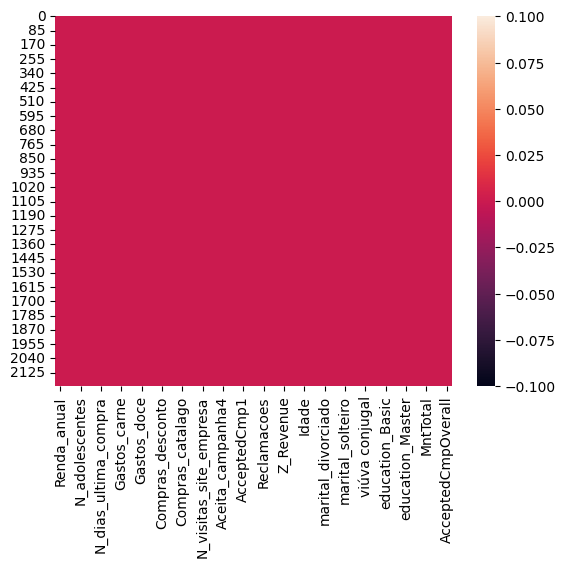

In [108]:
sns.heatmap(ifood_df.isnull())

In [109]:
ifood_df.isnull().sum()

Renda_anual               0
N_criancas                0
N_adolescentes            0
Recency                   0
N_dias_ultima_compra      0
Gastos_Frutas             0
Gastos_carne              0
Gastos_peixe              0
Gastos_doce               0
Gastos_ouro               0
Compras_desconto          0
Compras_site_empresa      0
Compras_catalago          0
Compras_lojas             0
N_visitas_site_empresa    0
Aceita_campanha3          0
Aceita_campanha4          0
Aceita_campanha5          0
AcceptedCmp1              0
Aceita_campanha2          0
Reclamacoes               0
Curto_contato             0
Z_Revenue                 0
Oferta_ultima_campanha    0
Idade                     0
Cliente_Dias              0
marital_divorciado        0
marital_casado            0
marital_solteiro          0
casados juntos            0
viúva conjugal            0
education_2n Cycle        0
education_Basic           0
education_Graduation      0
education_Master          0
education_PhD       

In [110]:
ifood_df.duplicated().sum()

184

In [111]:
ifood_df.drop_duplicates(keep=False, inplace=True)
ifood_df.shape

(1843, 39)

In [112]:
ifood_df.describe()

,Renda_anual,N_criancas,N_adolescentes,Recency,N_dias_ultima_compra,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,...,casados juntos,viúva conjugal,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,...,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,51755.752577,0.443842,0.512751,48.734129,307.167119,26.308193,166.813348,37.400977,27.416712,43.837222,...,0.244710,0.034726,0.091156,0.023874,0.500271,0.166576,0.218123,565.106348,521.269126,0.305480
std,20727.936663,0.534853,0.548639,28.951696,337.913890,39.733319,222.103689,54.895591,42.066386,51.690589,...,0.430032,0.183135,0.287909,0.152698,0.500136,0.372698,0.413083,577.679708,555.773676,0.680508
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35683.000000,0.000000,0.000000,24.000000,23.500000,2.000000,16.000000,2.500000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51650.000000,0.000000,0.000000,49.000000,179.000000,8.000000,68.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,344.000000,290.000000,0.000000
75%,68145.000000,1.000000,1.000000,74.000000,508.000000,33.000000,225.000000,50.000000,34.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.500000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,197.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000


# 03 - Visualização dos dados

array([[<AxesSubplot:title={'center':'Renda_anual'}>,
        <AxesSubplot:title={'center':'N_criancas'}>,
        <AxesSubplot:title={'center':'N_adolescentes'}>,
        <AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'N_dias_ultima_compra'}>,
        <AxesSubplot:title={'center':'Gastos_Frutas'}>],
       [<AxesSubplot:title={'center':'Gastos_carne'}>,
        <AxesSubplot:title={'center':'Gastos_peixe'}>,
        <AxesSubplot:title={'center':'Gastos_doce'}>,
        <AxesSubplot:title={'center':'Gastos_ouro'}>,
        <AxesSubplot:title={'center':'Compras_desconto'}>,
        <AxesSubplot:title={'center':'Compras_site_empresa'}>],
       [<AxesSubplot:title={'center':'Compras_catalago'}>,
        <AxesSubplot:title={'center':'Compras_lojas'}>,
        <AxesSubplot:title={'center':'N_visitas_site_empresa'}>,
        <AxesSubplot:title={'center':'Aceita_campanha3'}>,
        <AxesSubplot:title={'center':'Aceita_campanha4'}>,
        <AxesSubplot:title=

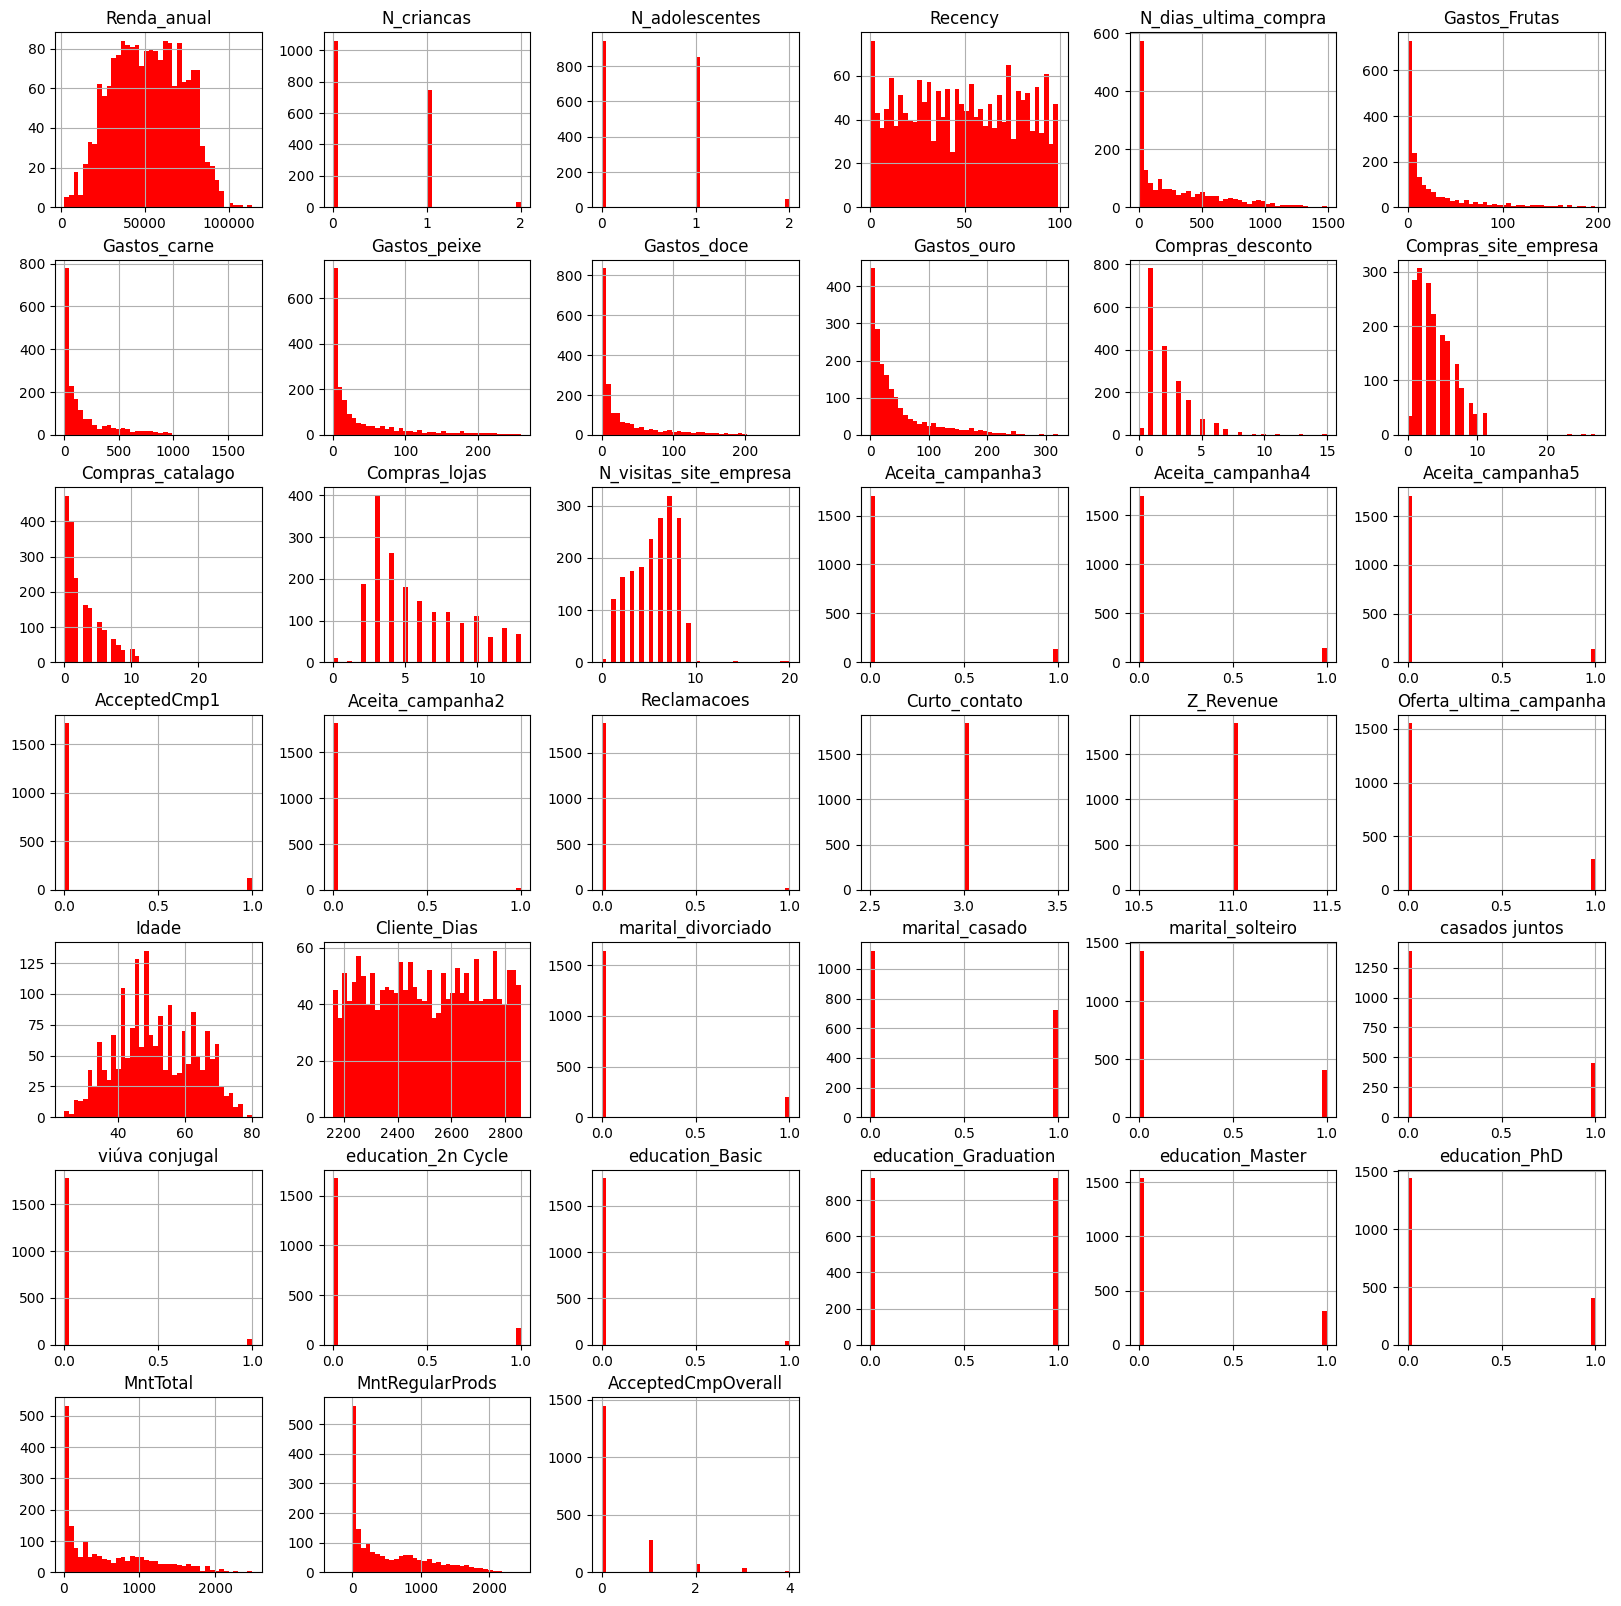

In [113]:
# plt.figure(figsize=(10,50))
# for i in range(len(ifood_df.columns)):
#   plt.subplot(39, 1, i + 1)
#   # sns.distplot(ifood_df[ifood_df.columns[i]], kde = True)
#   plt.title(ifood_df.columns[i])
# plt.tight_layout();
ifood_df.hist(bins = 40, figsize=(20,20), color ='r')

In [114]:
ifood_df.columns

Index(['Renda_anual', 'N_criancas', 'N_adolescentes', 'Recency',
       'N_dias_ultima_compra', 'Gastos_Frutas', 'Gastos_carne', 'Gastos_peixe',
       'Gastos_doce', 'Gastos_ouro', 'Compras_desconto',
       'Compras_site_empresa', 'Compras_catalago', 'Compras_lojas',
       'N_visitas_site_empresa', 'Aceita_campanha3', 'Aceita_campanha4',
       'Aceita_campanha5', 'AcceptedCmp1', 'Aceita_campanha2', 'Reclamacoes',
       'Curto_contato', 'Z_Revenue', 'Oferta_ultima_campanha', 'Idade',
       'Cliente_Dias', 'marital_divorciado', 'marital_casado',
       'marital_solteiro', 'casados juntos', 'viúva conjugal',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [115]:
if_renda = pd.DataFrame(ifood_df[['Renda_anual', 'Gastos_Frutas', 'Gastos_carne', 'Gastos_peixe',
       'Gastos_doce', 'Gastos_ouro', 'Compras_desconto',
       'Compras_site_empresa', 'Compras_catalago', 'Compras_lojas',
       'N_visitas_site_empresa']])

In [116]:
correlations = if_renda.corr()

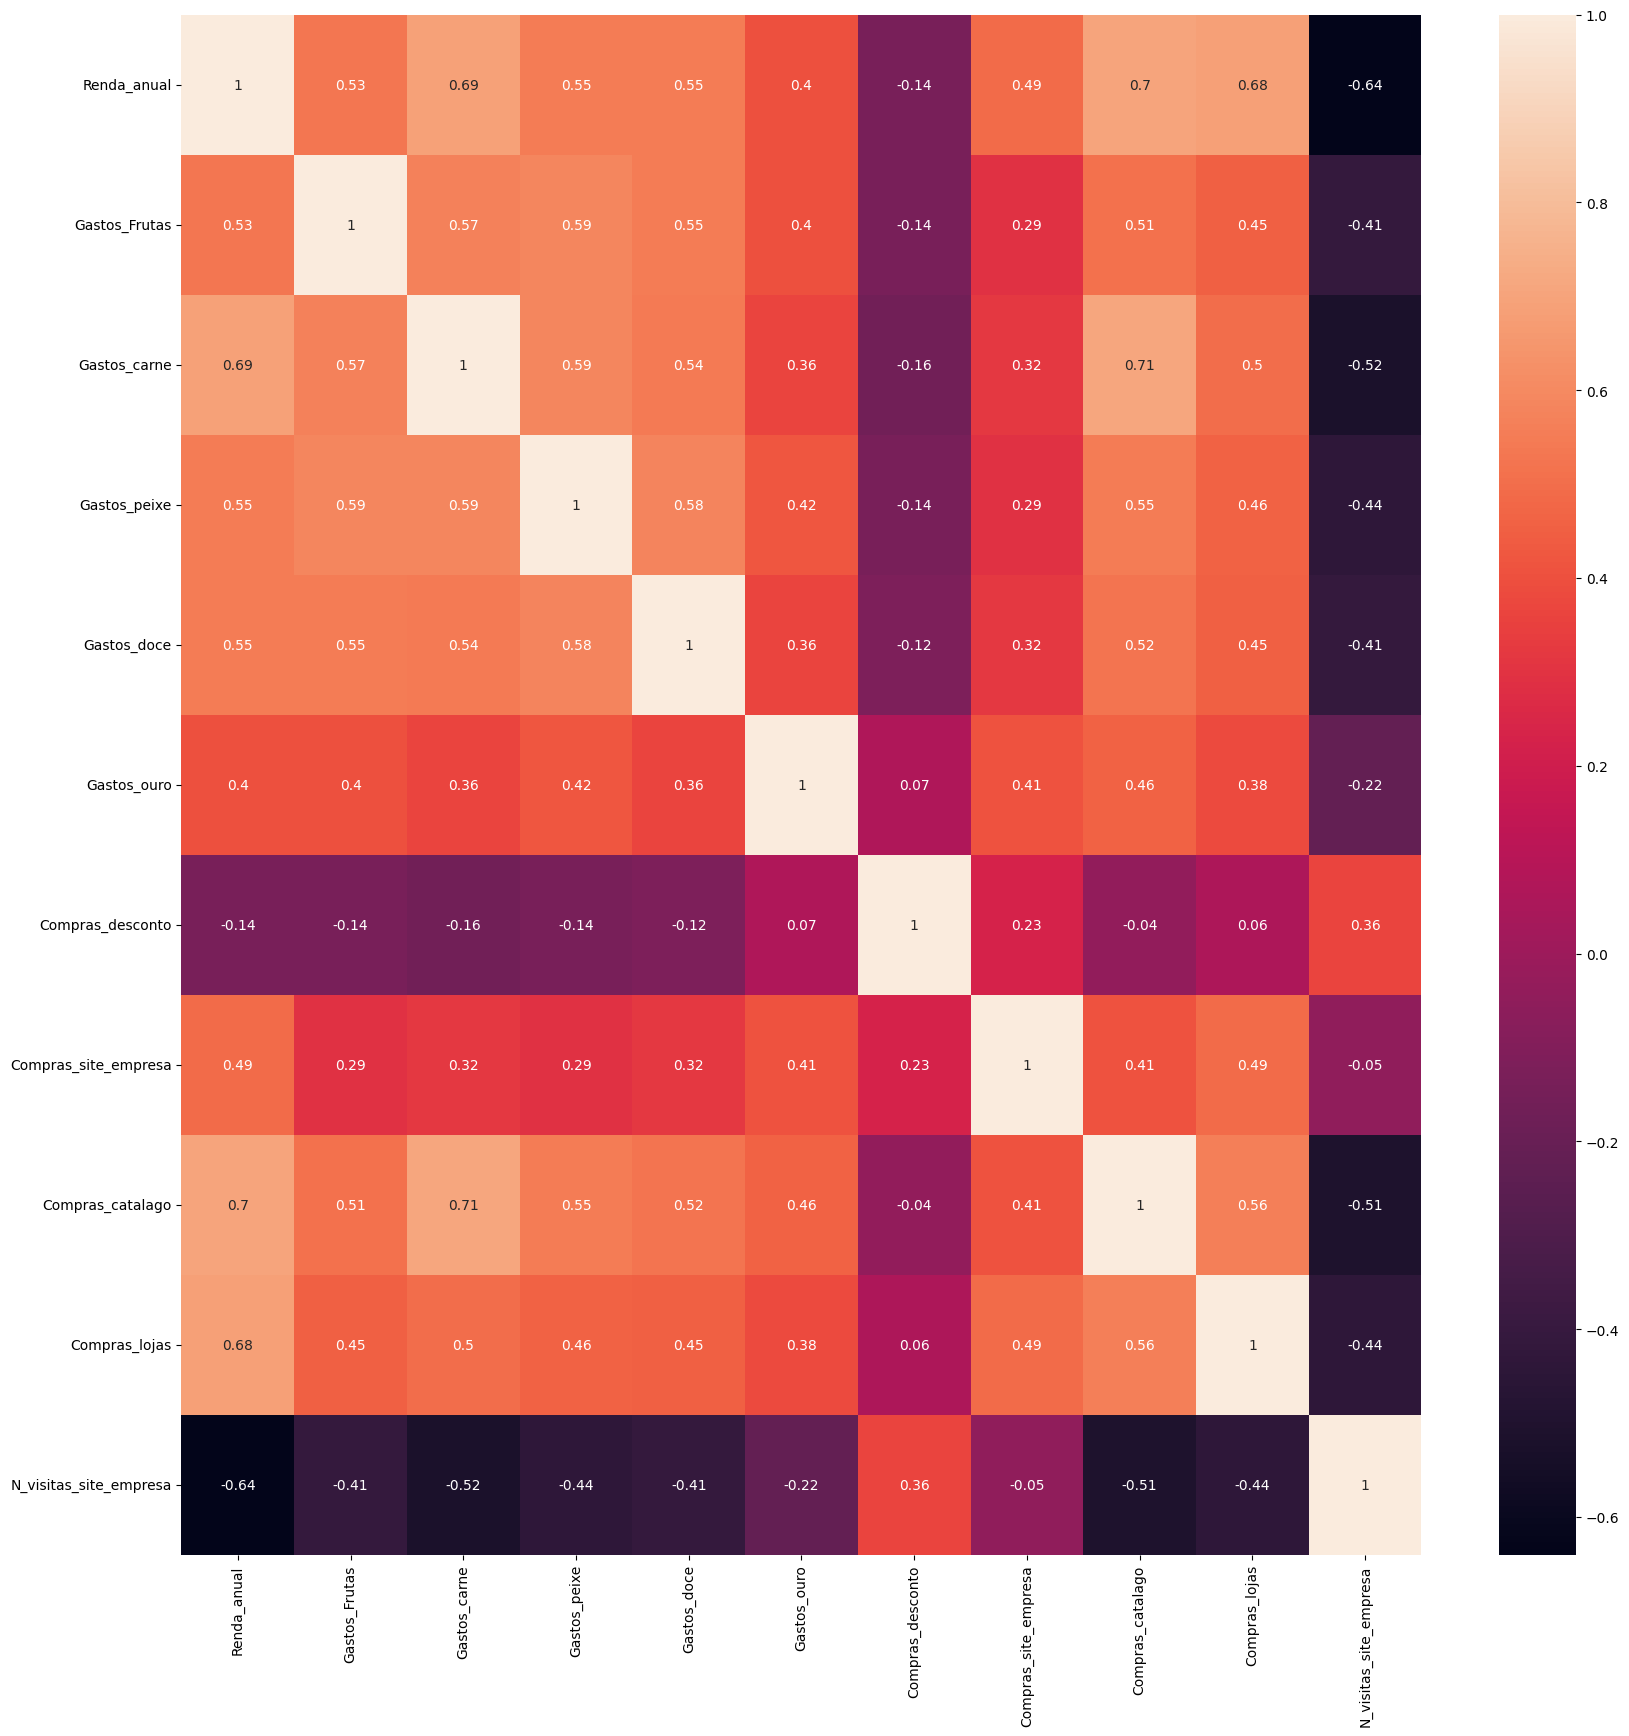

In [117]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations.round(2), annot=True);

In [118]:
if_status_social = pd.DataFrame(ifood_df[['marital_divorciado', 'marital_casado',
       'marital_solteiro', 'casados juntos', 'viúva conjugal', 'Gastos_Frutas', 'Gastos_carne', 'Gastos_peixe',
       'Gastos_doce', 'Gastos_ouro', 'Compras_desconto',
       'Compras_site_empresa', 'Compras_catalago', 'Compras_lojas',
       'N_visitas_site_empresa']])

In [119]:
correlations = if_status_social.corr()

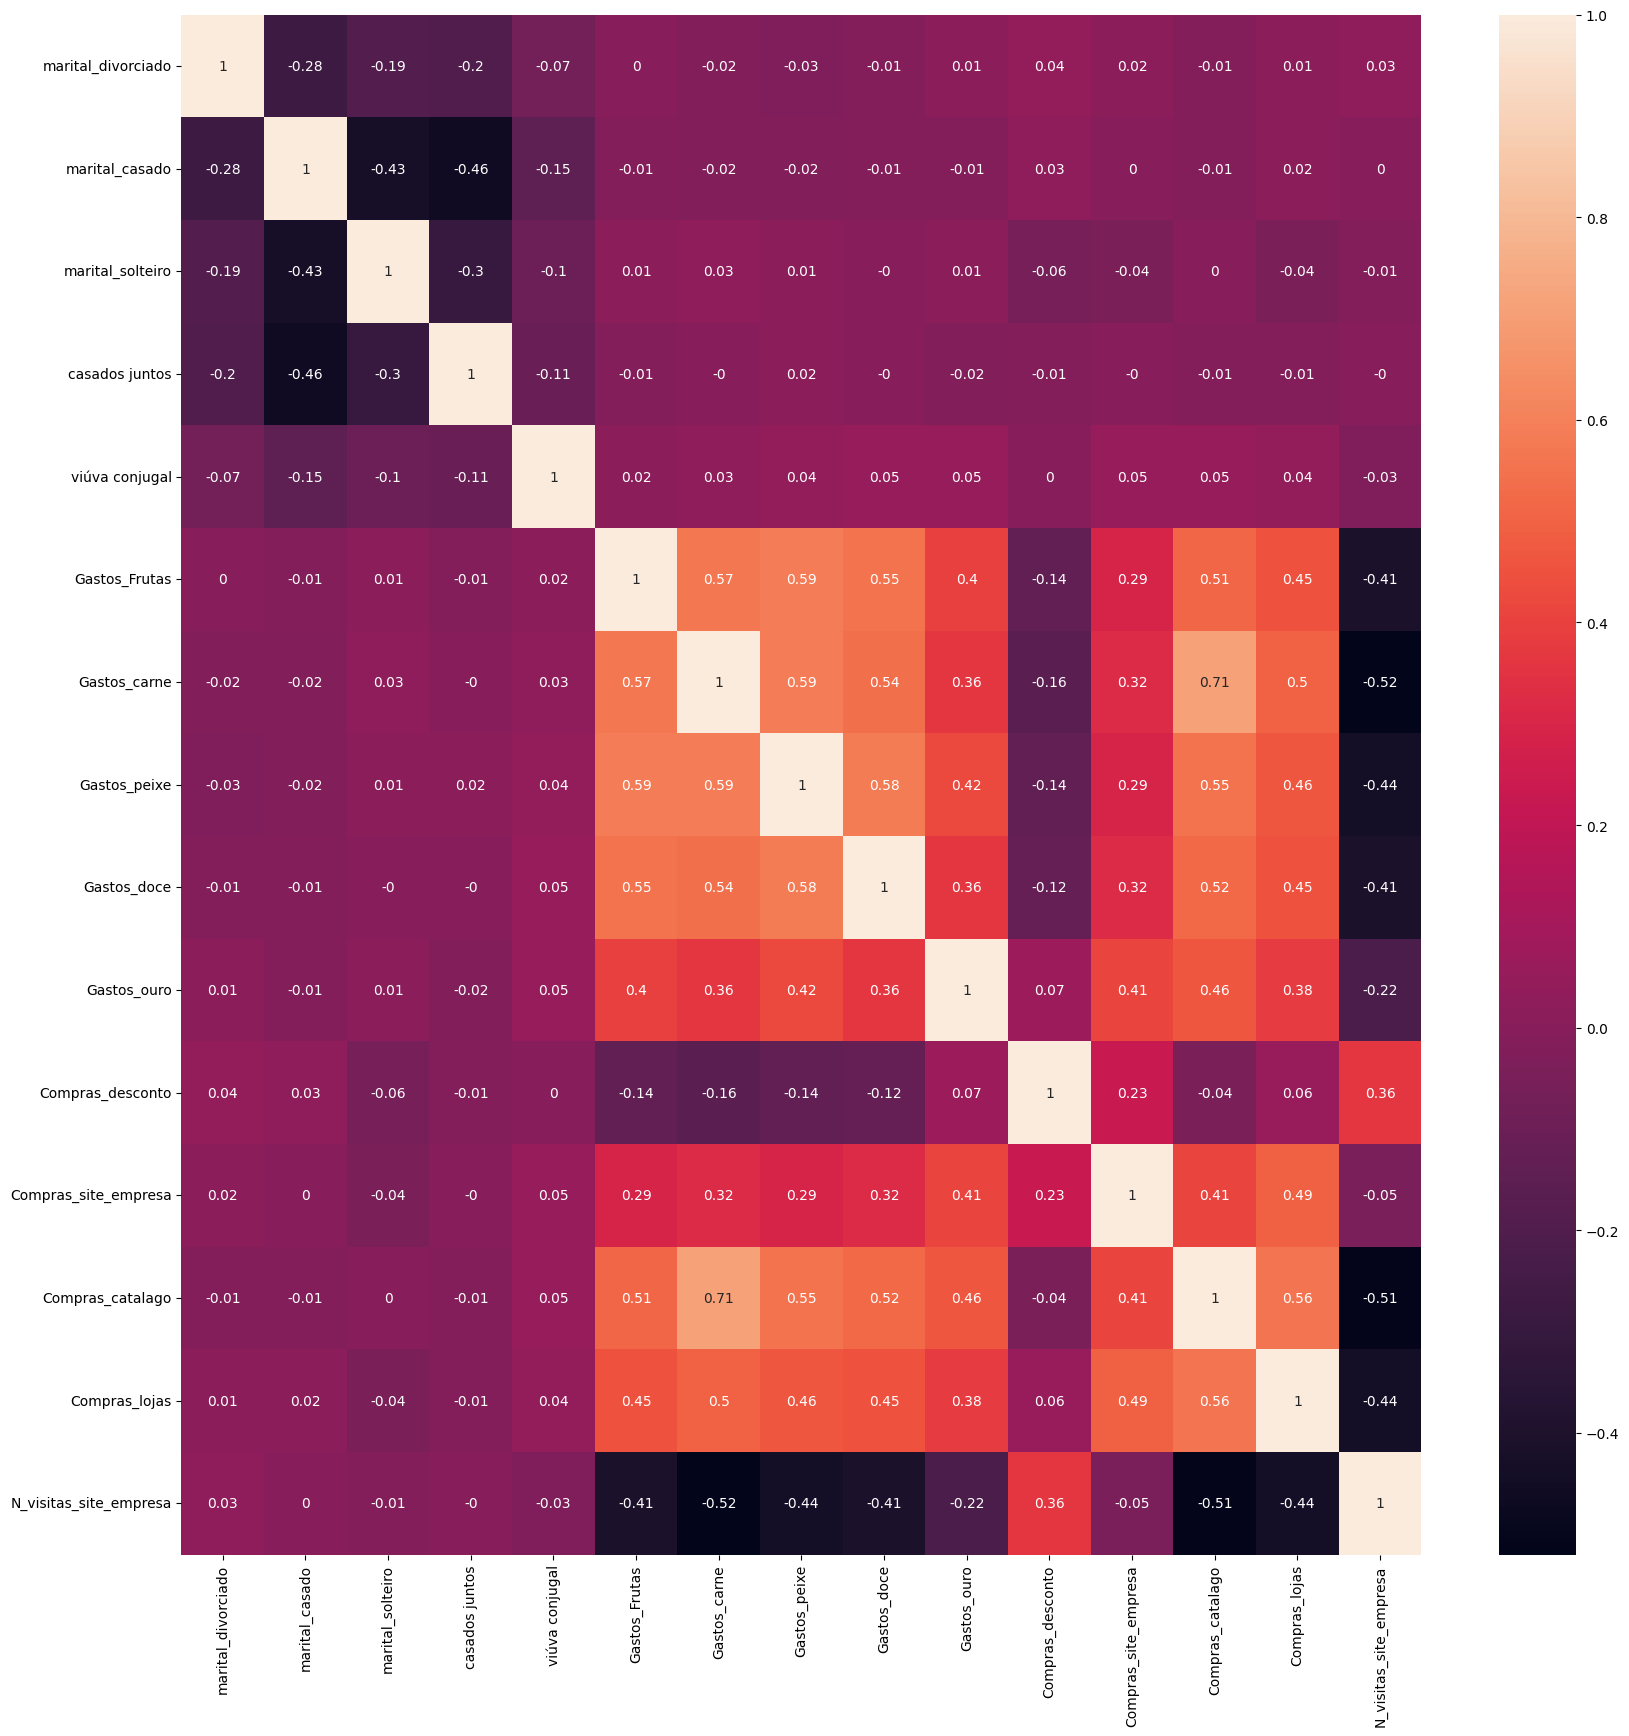

In [120]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations.round(2), annot=True);

In [121]:
if_filhos = pd.DataFrame(ifood_df[['N_criancas', 'N_adolescentes', 'Gastos_doce', 'Gastos_ouro', 'Compras_desconto',
       'Compras_site_empresa', 'Compras_catalago', 'Compras_lojas',
       'N_visitas_site_empresa']])

In [122]:
correlations = if_filhos.corr()

<AxesSubplot:>

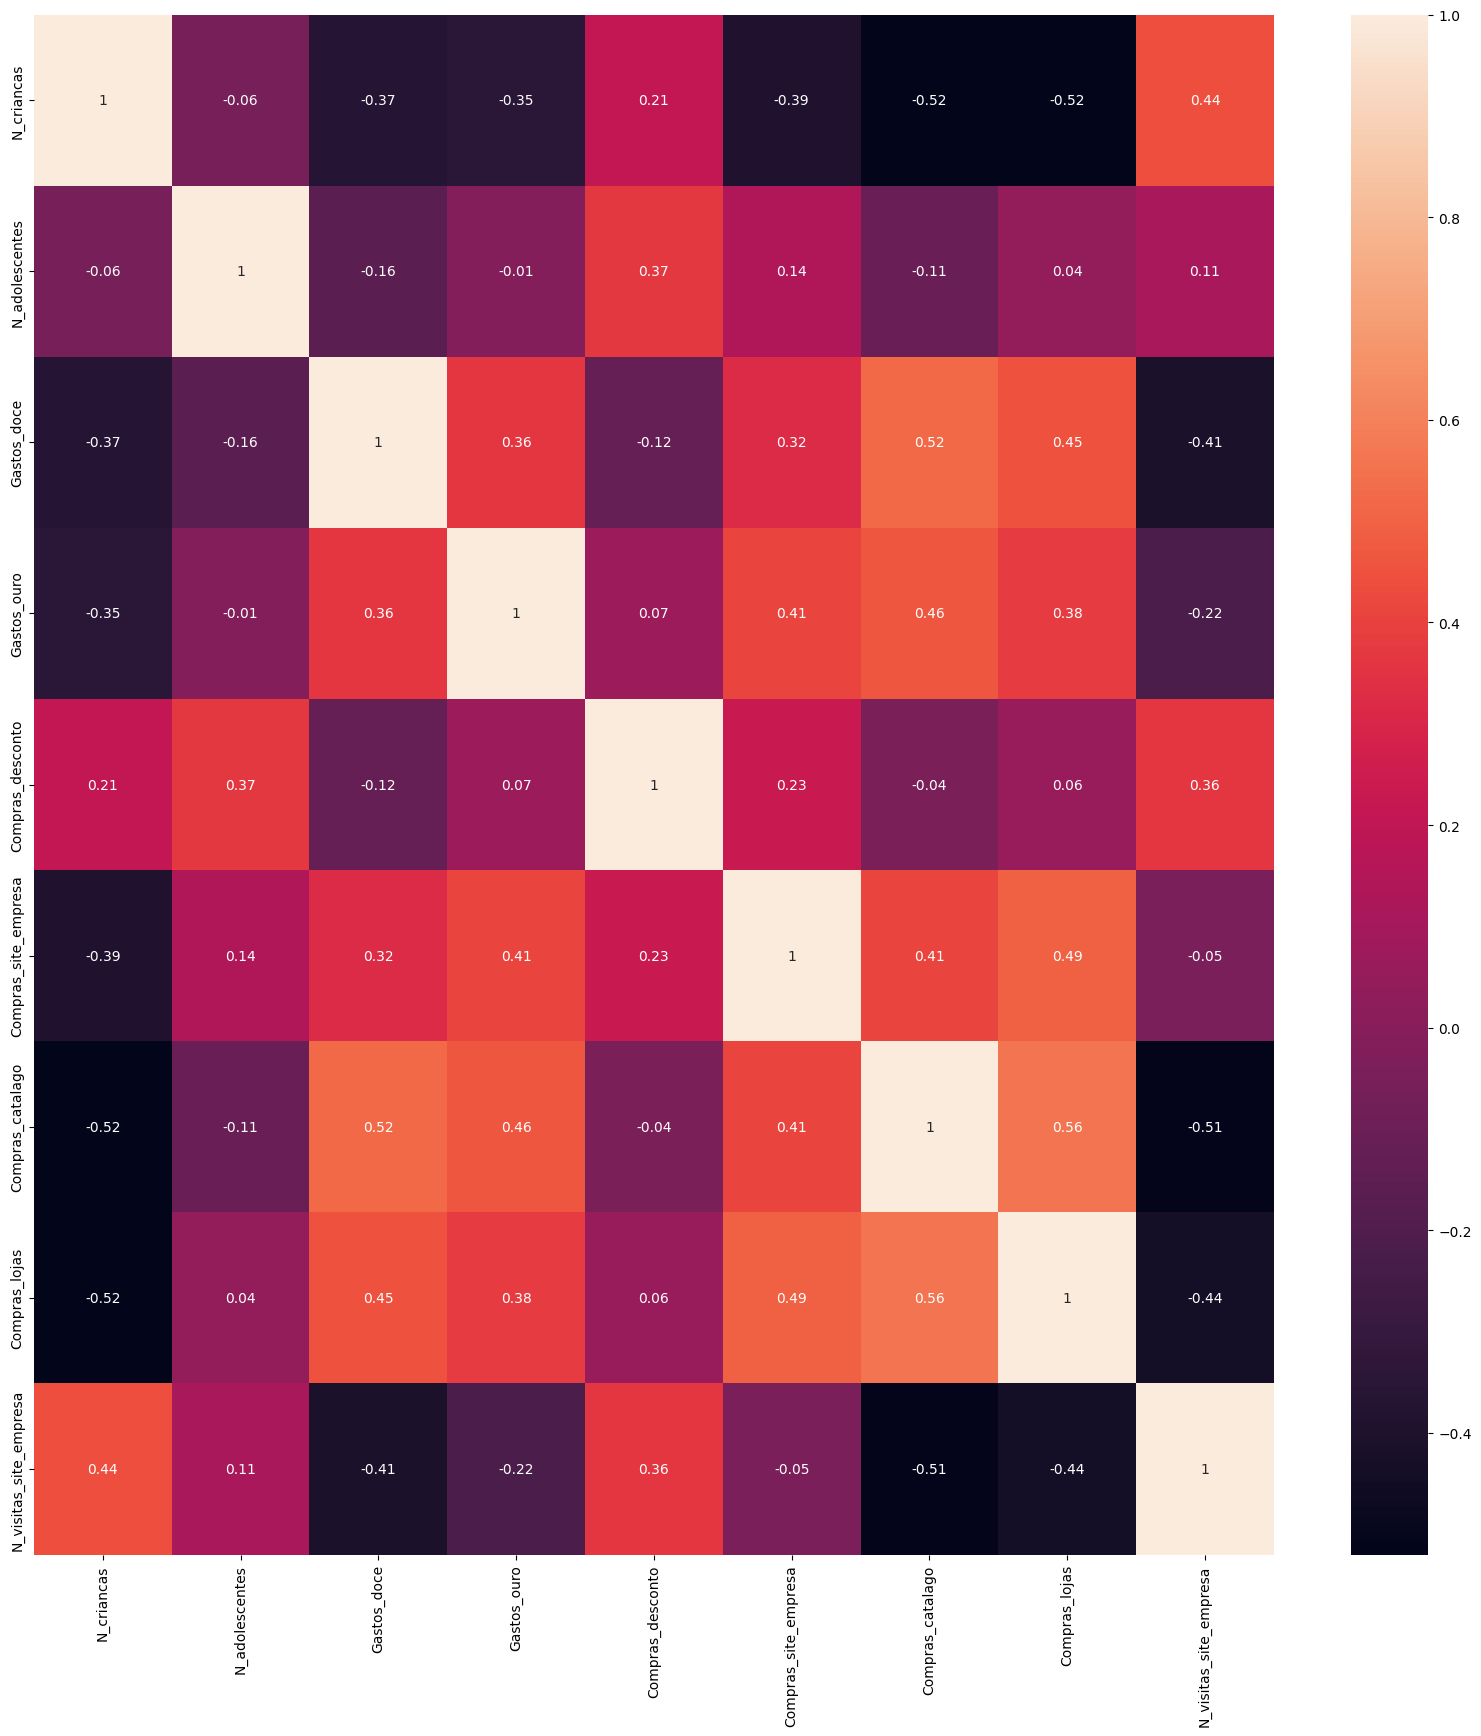

In [123]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations.round(2), annot=True)

In [124]:
if_education = pd.DataFrame(ifood_df[['education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD',  'Gastos_Frutas', 'Gastos_carne', 'Gastos_peixe',
       'Gastos_doce', 'Gastos_ouro', 'Compras_desconto',
       'Compras_site_empresa', 'Compras_catalago', 'Compras_lojas',
       'N_visitas_site_empresa']])

In [125]:
correlations = if_education.corr()

<AxesSubplot:>

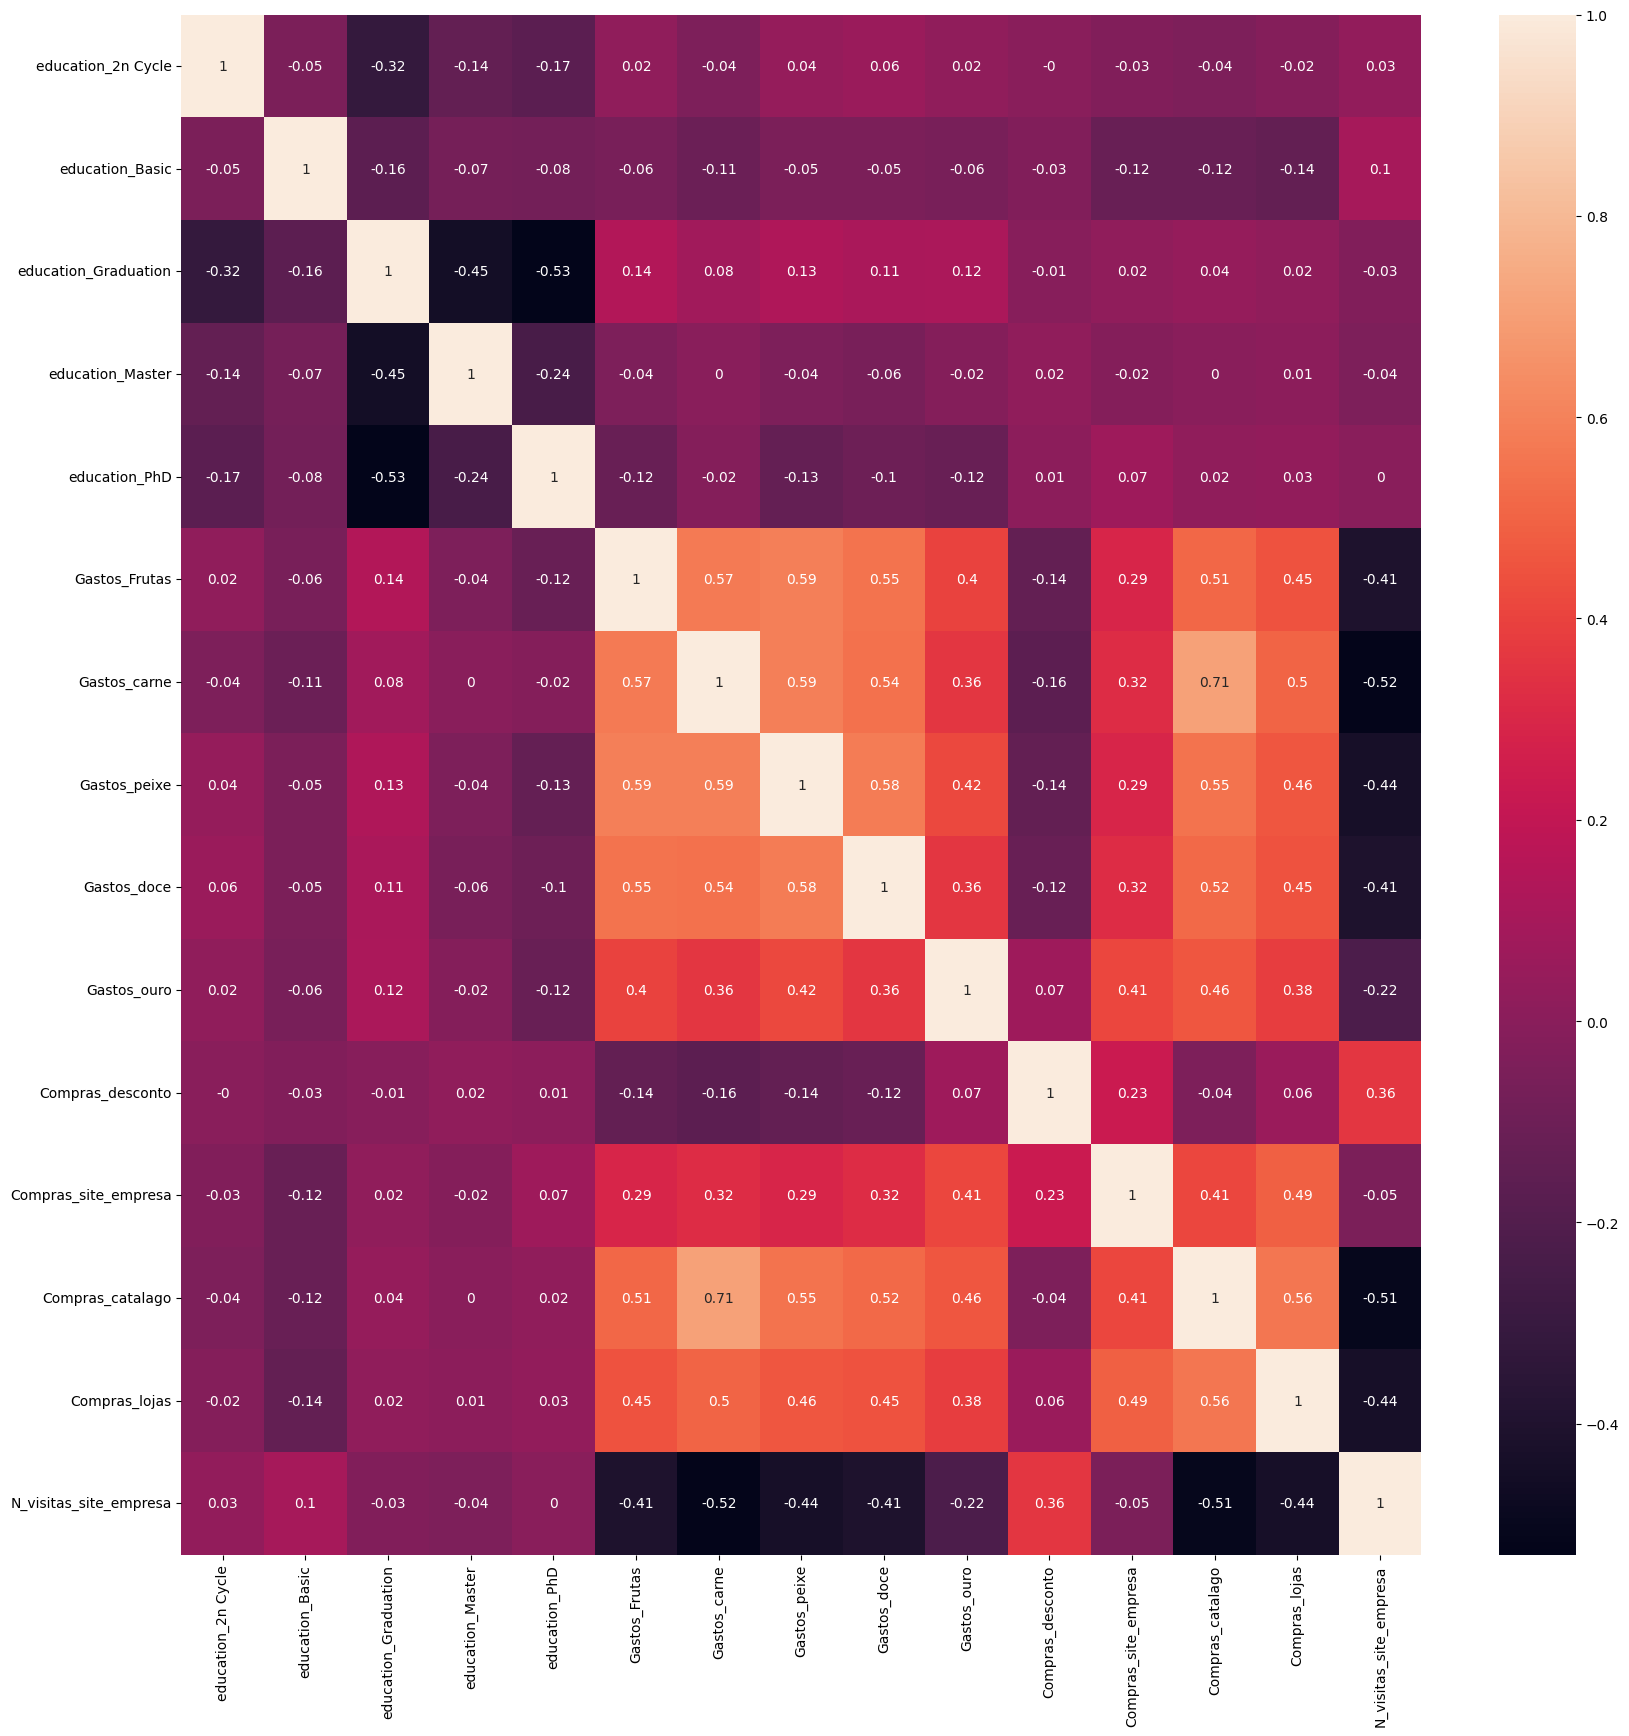

In [126]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations.round(2), annot=True)

In [127]:
from matplotlib.pyplot import annotate

In [128]:
f_cmp = pd.DataFrame(ifood_df[['Aceita_campanha3', 'Aceita_campanha4',
       'Aceita_campanha5', 'AcceptedCmp1', 'Aceita_campanha2', 'Oferta_ultima_campanha']].sum(), columns=['Total']).reset_index()

In [129]:
f_cmp

,index,Total
0,Aceita_campanha3,139
1,Aceita_campanha4,146
2,Aceita_campanha5,132
3,AcceptedCmp1,124
4,Aceita_campanha2,22
5,Oferta_ultima_campanha,289


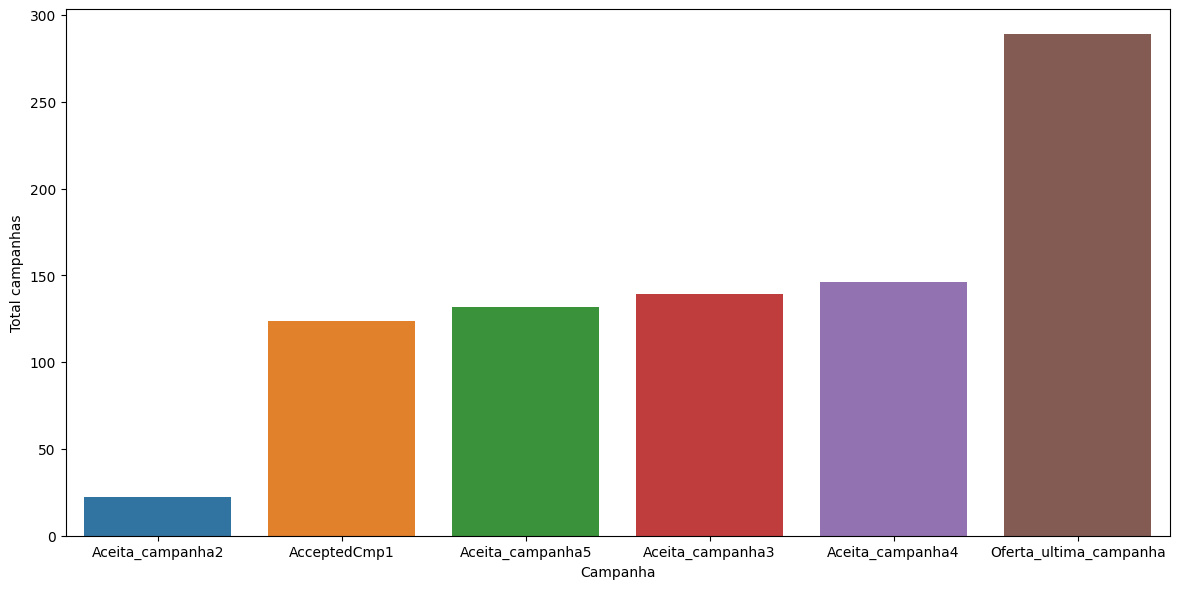

In [130]:
plt.figure(figsize=(12,6))
sns.barplot(x = "index", y = "Total", data = f_cmp.sort_values('Total'))
plt.xlabel('Campanha')
plt.ylabel('Total campanhas')
plt.tight_layout()

In [131]:
f_edc = pd.DataFrame(ifood_df[['education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD']].sum(), columns=['Total']).reset_index()

In [132]:
f_edc

,index,Total
0,education_2n Cycle,168
1,education_Basic,44
2,education_Graduation,922
3,education_Master,307
4,education_PhD,402


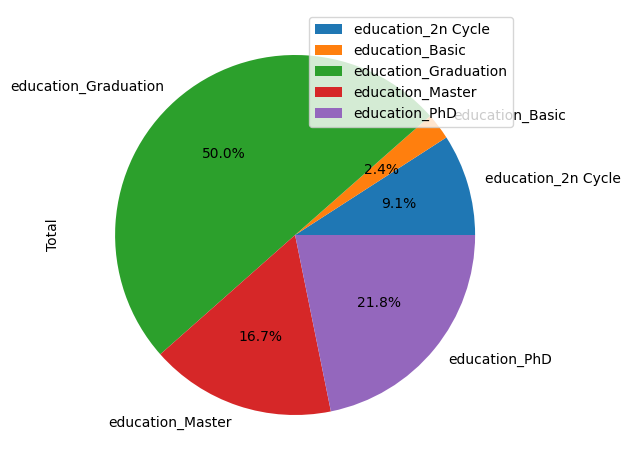

In [133]:
f_edc['Total'].plot.pie(autopct ='%1.1f%%', labels=f_edc['index'], legend= True)
plt.legend(loc='upper right')
plt.tight_layout()

# 04 -  Agrupamento com K-Means

01 - Primeiro agrupameto baseado na renda_anual

In [134]:
if_renda.head(), if_renda.shape

(   Renda_anual  Gastos_Frutas  Gastos_carne  Gastos_peixe  Gastos_doce  \
 0      58138.0             88           546           172           88   
 1      46344.0              1             6             2            1   
 2      71613.0             49           127           111           21   
 3      26646.0              4            20            10            3   
 4      58293.0             43           118            46           27   
 
    Gastos_ouro  Compras_desconto  Compras_site_empresa  Compras_catalago  \
 0           88                 3                     8                10   
 1            6                 2                     1                 1   
 2           42                 1                     8                 2   
 3            5                 2                     2                 0   
 4           15                 5                     5                 3   
 
    Compras_lojas  N_visitas_site_empresa  
 0              4                       

In [135]:
def agrupamento(f_coluna):
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(f_coluna)
    labels = kmeans.labels_

    return kmeans, labels

In [136]:
kmeans, labels = agrupamento(if_renda)

In [137]:
scaler = StandardScaler()
ifood_df_scaled = scaler.fit_transform(if_renda)

In [138]:
labels, len(labels)

(array([2, 3, 1, ..., 2, 1, 2], dtype=int32), 1843)

In [139]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([348, 450, 523, 522]))

In [140]:
kmeans.cluster_centers_

array([[2.23895546e+04, 5.43678161e+00, 2.25660920e+01, 7.69540230e+00,
        5.95114943e+00, 1.72902299e+01, 2.14655172e+00, 2.02011494e+00,
        4.82758621e-01, 2.83908046e+00, 7.15229885e+00],
       [7.87540356e+04, 6.10355556e+01, 4.41415556e+02, 9.01666667e+01,
        6.72000000e+01, 7.17155556e+01, 1.41777778e+00, 5.40000000e+00,
        5.65777778e+00, 8.40222222e+00, 2.97555556e+00],
       [5.92194092e+04, 2.86328872e+01, 1.50783939e+02, 3.68738050e+01,
        2.70860421e+01, 5.57552581e+01, 3.06500956e+00, 5.51434034e+00,
        3.14722753e+00, 7.36902486e+00, 5.10898662e+00],
       [4.05808812e+04, 7.95593870e+00, 4.23122605e+01, 1.22452107e+01,
        7.76245211e+00, 2.55613027e+01, 2.54597701e+00, 3.06896552e+00,
        9.78927203e-01, 3.93103448e+00, 6.42337165e+00]])

In [141]:
renda_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [if_renda.columns])
renda_centers

,Renda_anual,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,Compras_site_empresa,Compras_catalago,Compras_lojas,N_visitas_site_empresa
0,22389.554598,5.436782,22.566092,7.695402,5.951149,17.290230,2.146552,2.020115,0.482759,2.839080,7.152299
1,78754.035556,61.035556,441.415556,90.166667,67.200000,71.715556,1.417778,5.400000,5.657778,8.402222,2.975556
2,59219.409178,28.632887,150.783939,36.873805,27.086042,55.755258,3.065010,5.514340,3.147228,7.369025,5.108987
3,40580.881226,7.955939,42.312261,12.245211,7.762452,25.561303,2.545977,3.068966,0.978927,3.931034,6.423372


In [142]:
renda_centers = scaler.inverse_transform(renda_centers)
renda_centers = pd.DataFrame(data = renda_centers, columns = [if_renda.columns])
renda_centers

,Renda_anual,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,Compras_site_empresa,Compras_catalago,Compras_lojas,N_visitas_site_empresa
0,4.640151e+08,242.270959,5177.465694,459.730009,277.692137,937.336893,6.418903,9.738189,3.993385,14.930304,22.803076
1,1.632017e+09,2450.795393,98180.235144,4985.810375,2853.510861,3749.850716,5.034885,19.114609,18.469371,32.836329,12.608732
2,1.227215e+09,1163.679154,33647.395555,2061.061048,1166.519465,2925.077385,8.163150,19.431810,11.446655,29.510788,17.815882
3,8.409815e+08,342.338274,9561.972596,709.426661,353.866421,1364.757515,7.177453,12.647893,5.381308,18.444965,21.023954


In [143]:
labels_df = pd.DataFrame({'cluster': labels})
labels_df

,cluster
0,2
1,3
2,1
3,0
4,2
...,...
1838,0
1839,2
1840,2
1841,1


In [144]:
ifood_df_cluster = if_renda.join(labels_df)
ifood_df_cluster.head()

,Renda_anual,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,Compras_desconto,Compras_site_empresa,Compras_catalago,Compras_lojas,N_visitas_site_empresa,cluster
0,58138.0,88,546,172,88,88,3,8,10,4,7,2.0
1,46344.0,1,6,2,1,6,2,1,1,2,5,3.0
2,71613.0,49,127,111,21,42,1,8,2,10,4,1.0
3,26646.0,4,20,10,3,5,2,2,0,4,6,0.0
4,58293.0,43,118,46,27,15,5,5,3,6,5,2.0


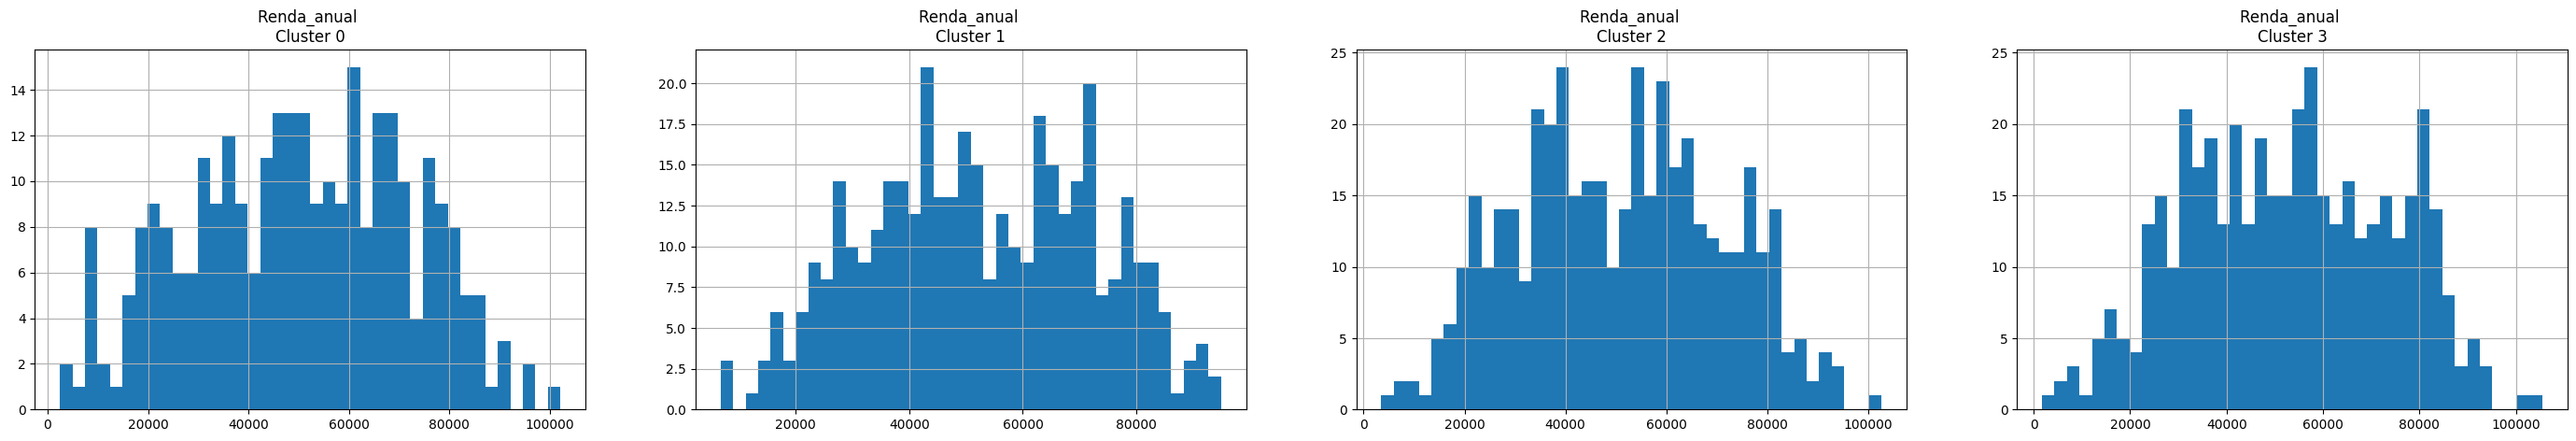

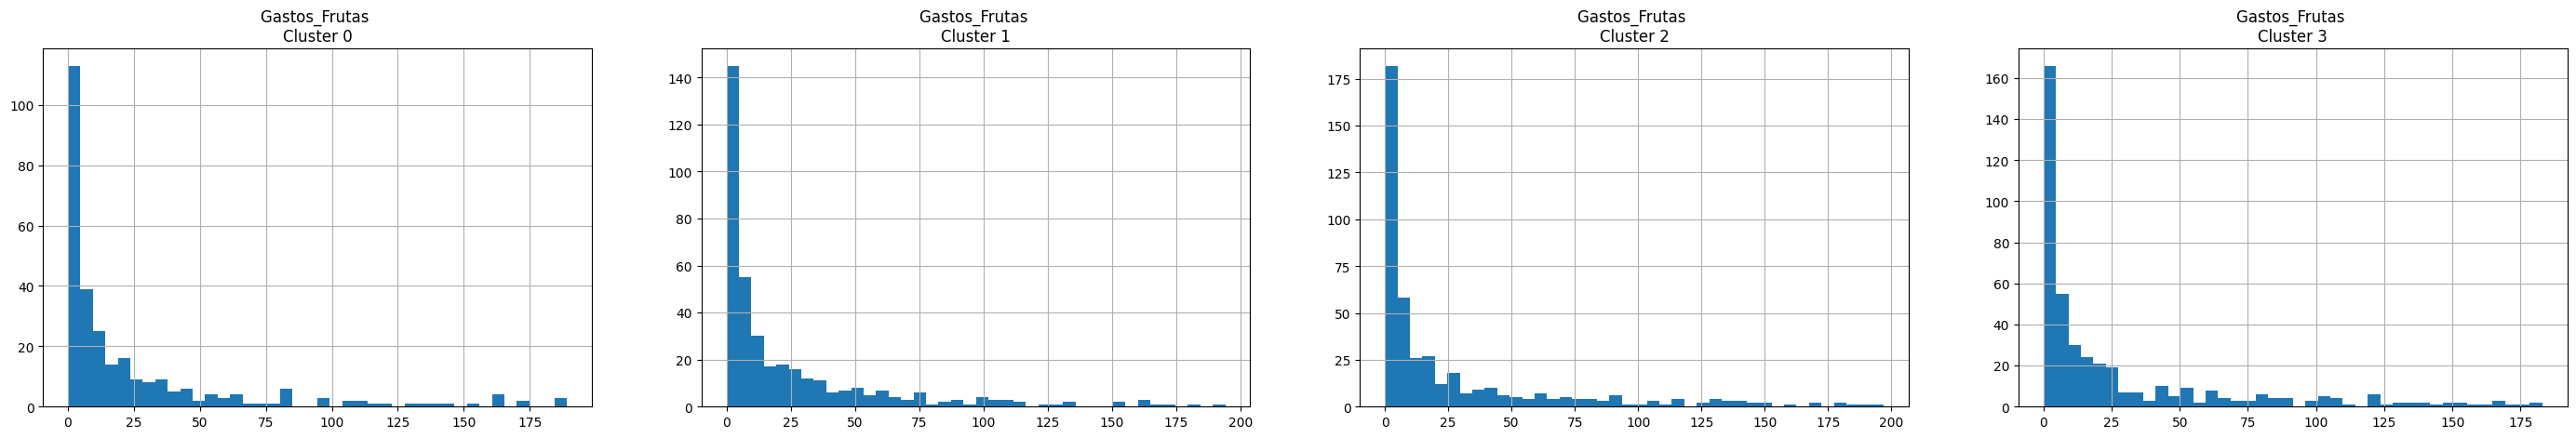

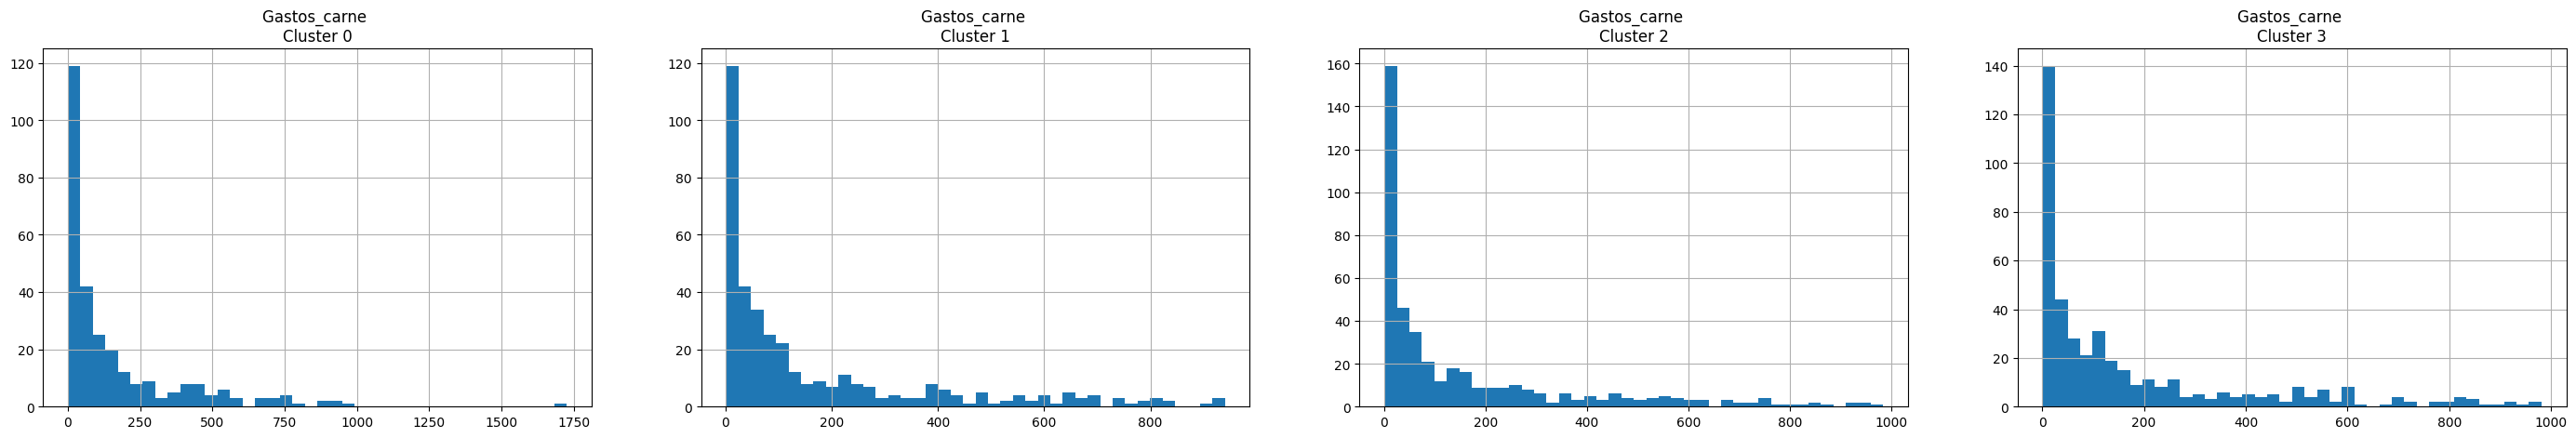

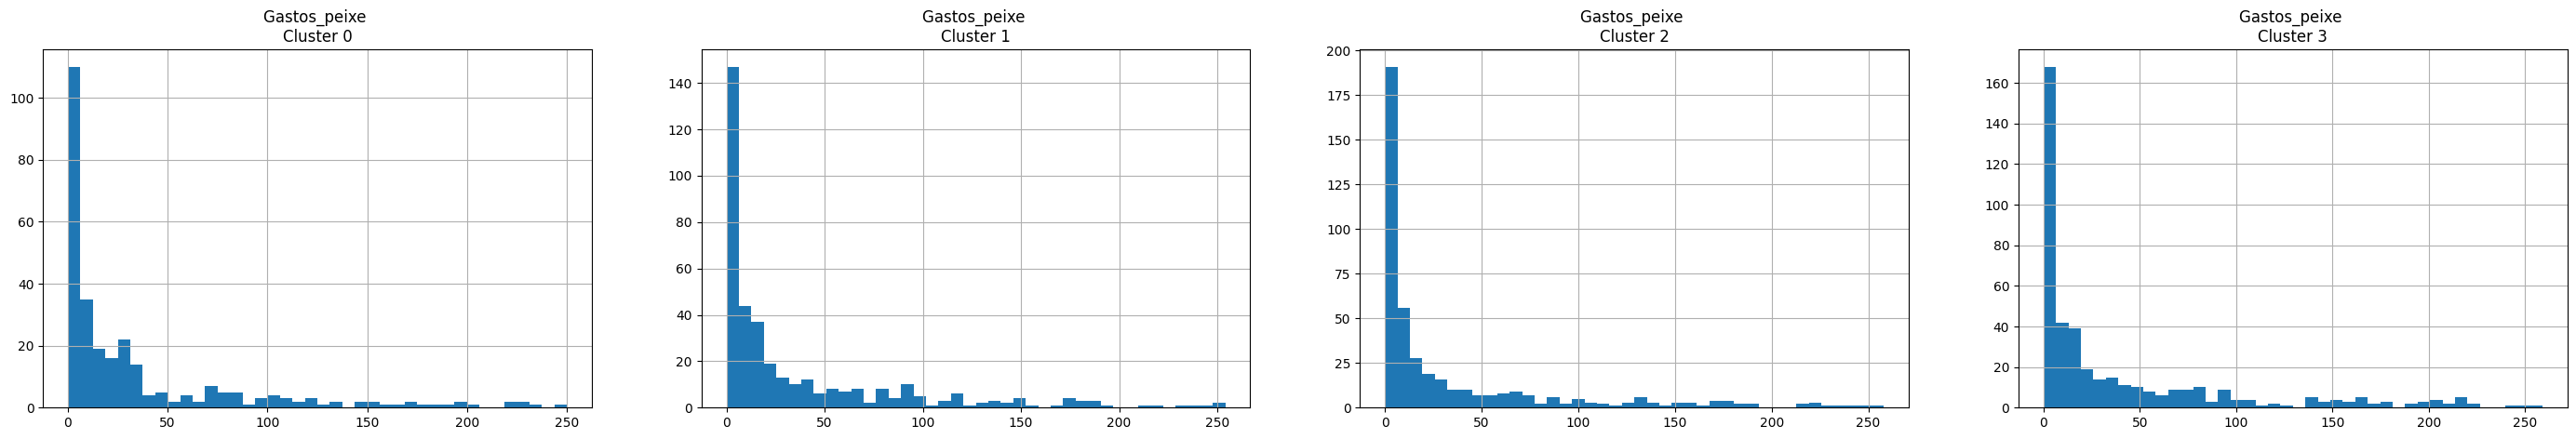

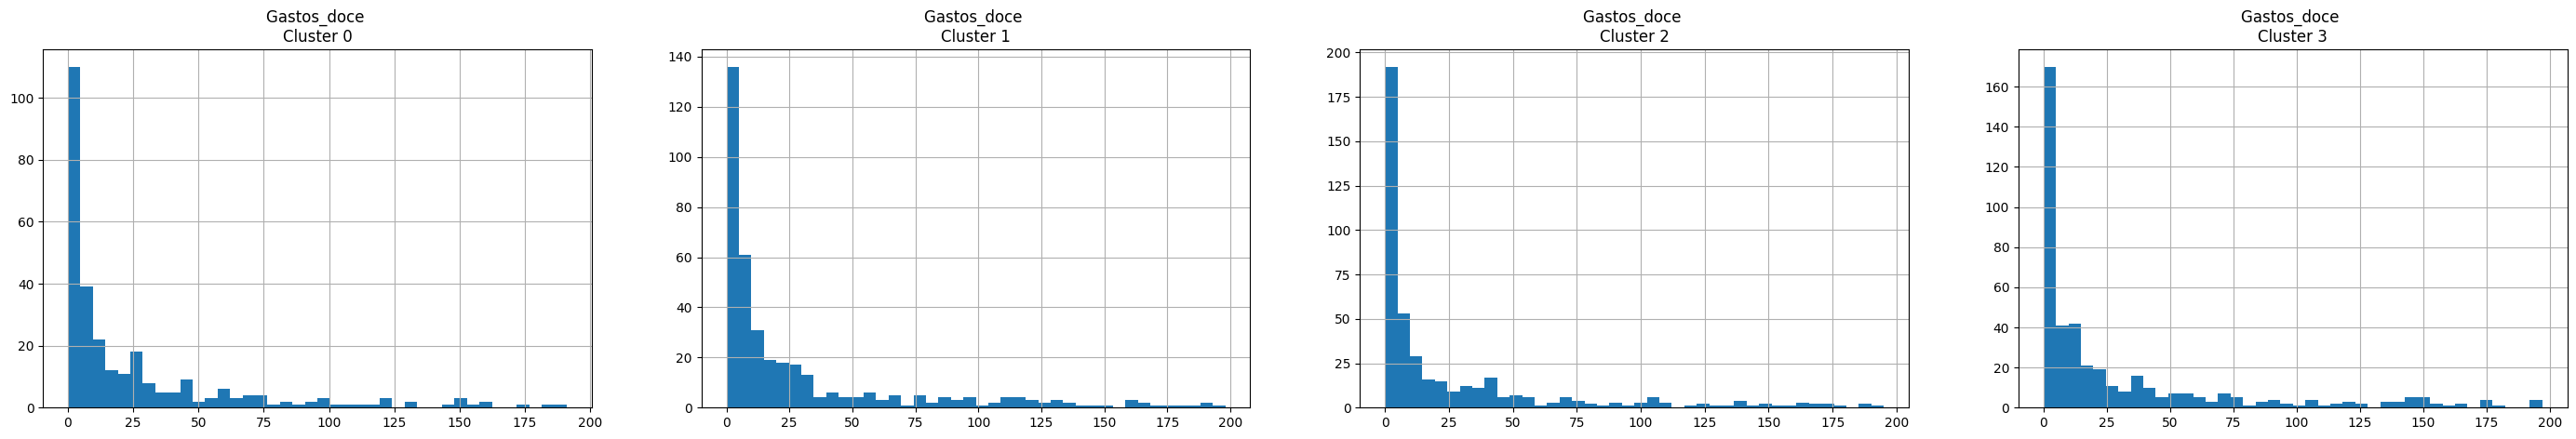

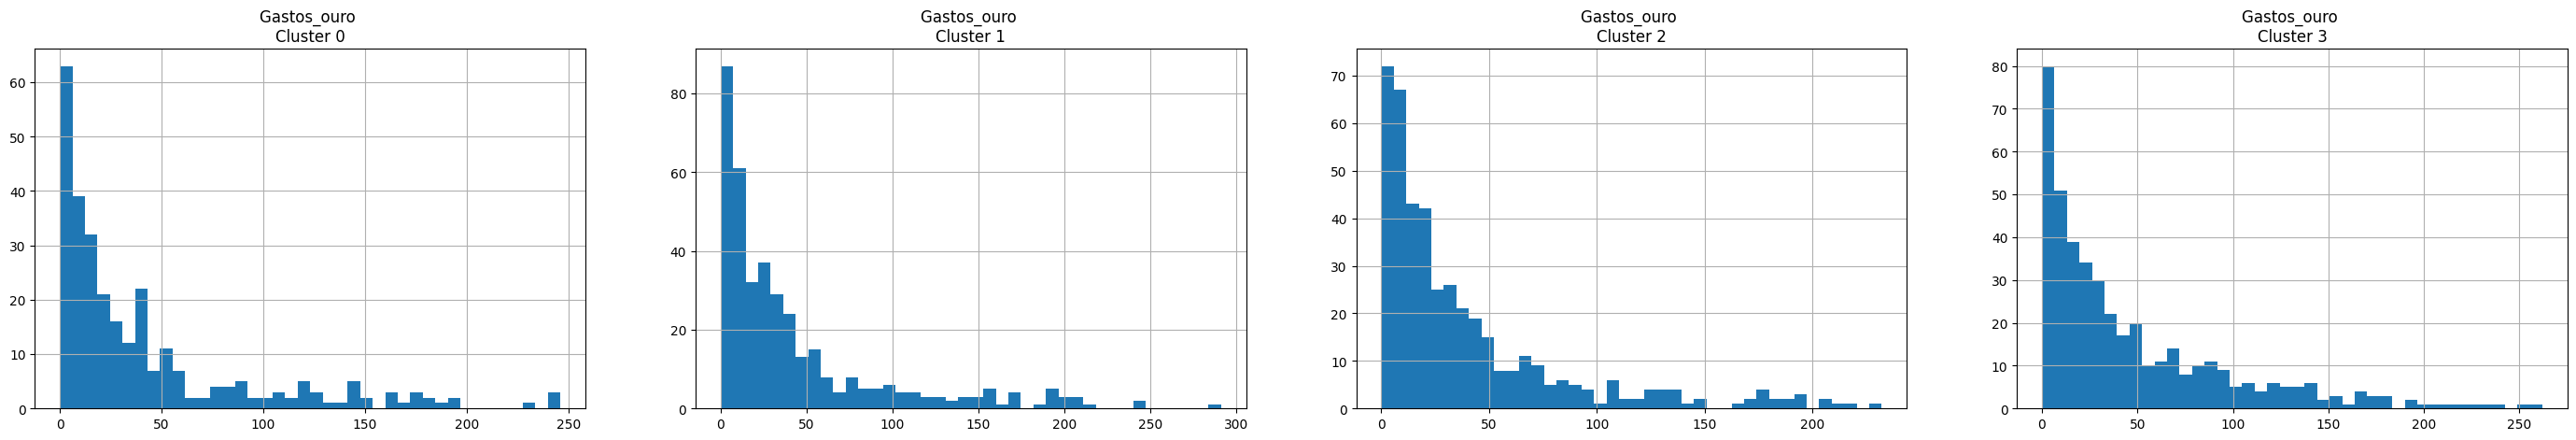

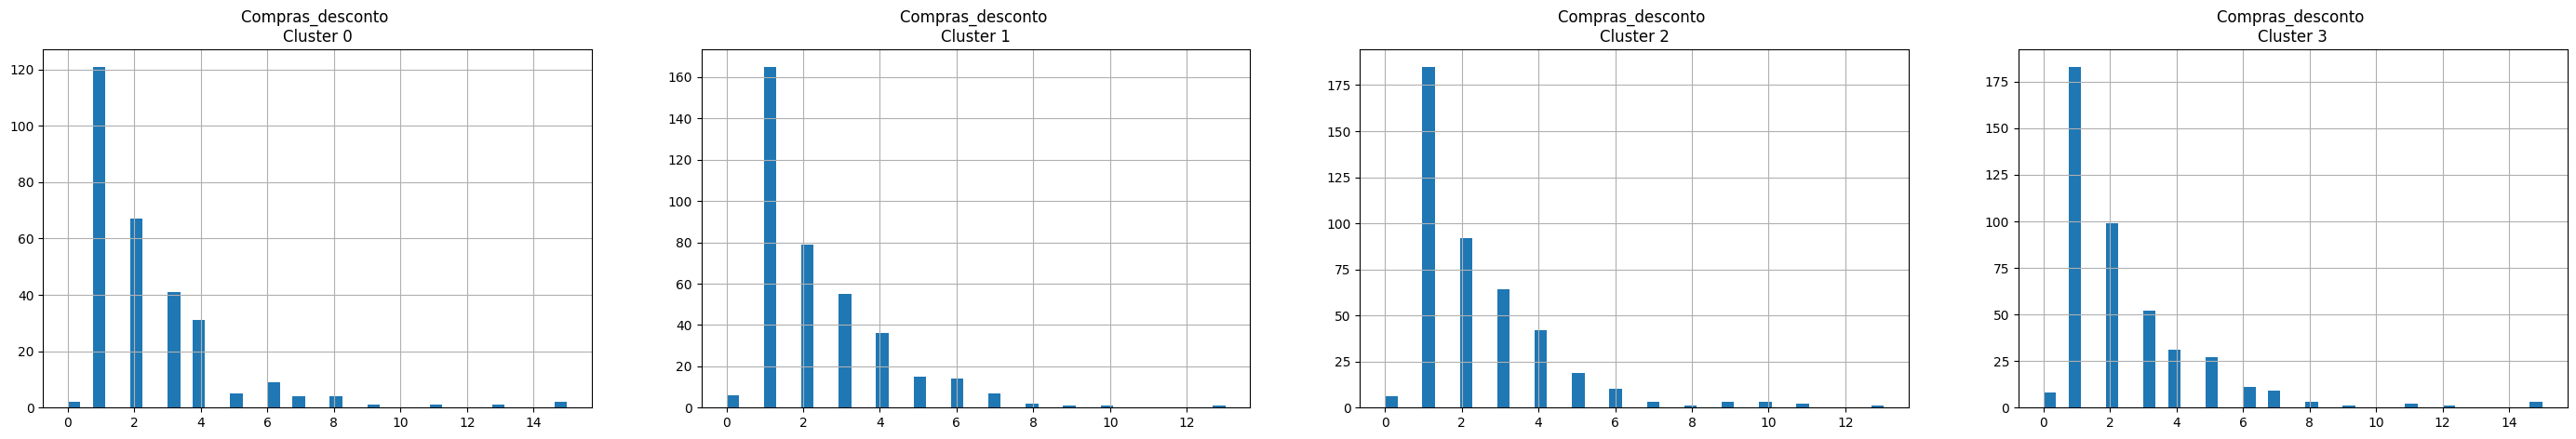

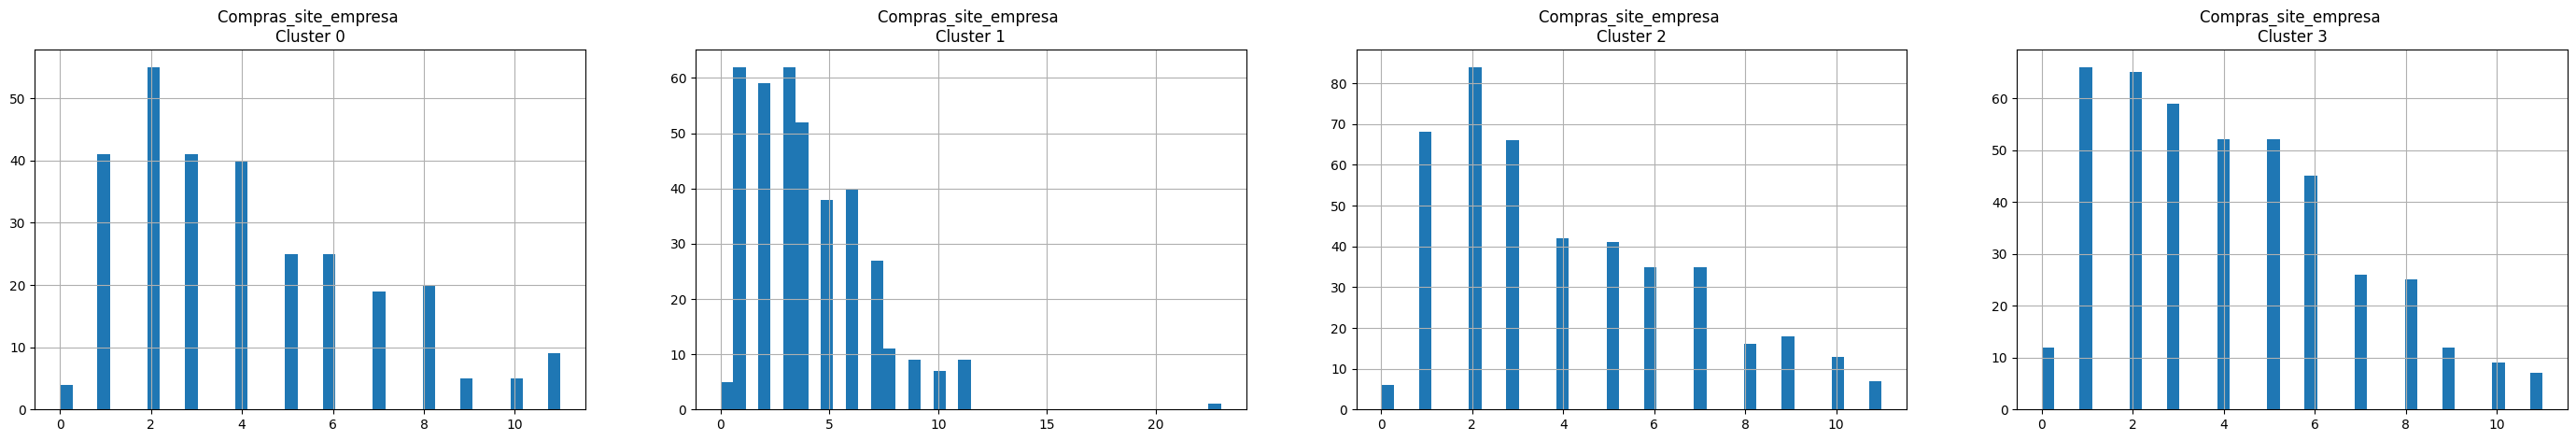

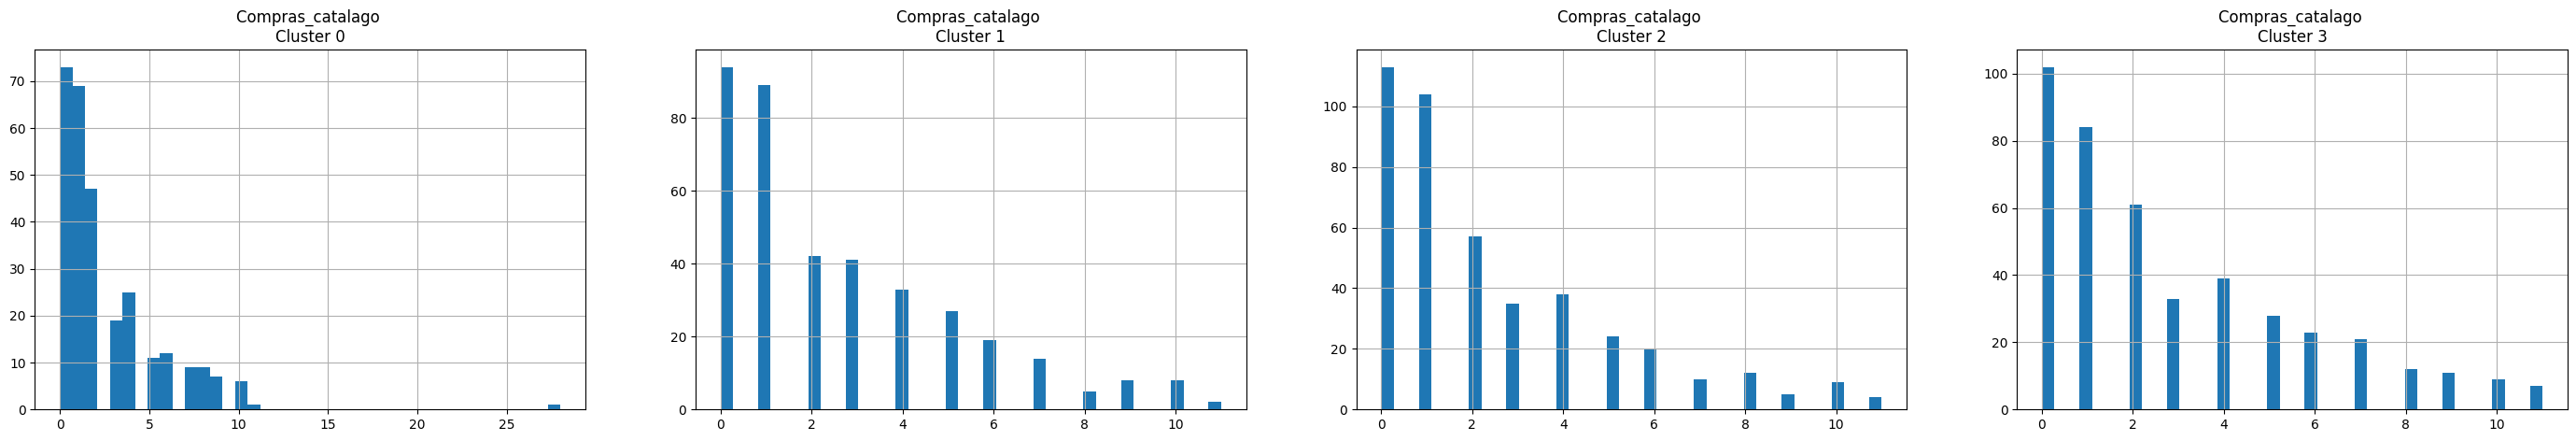

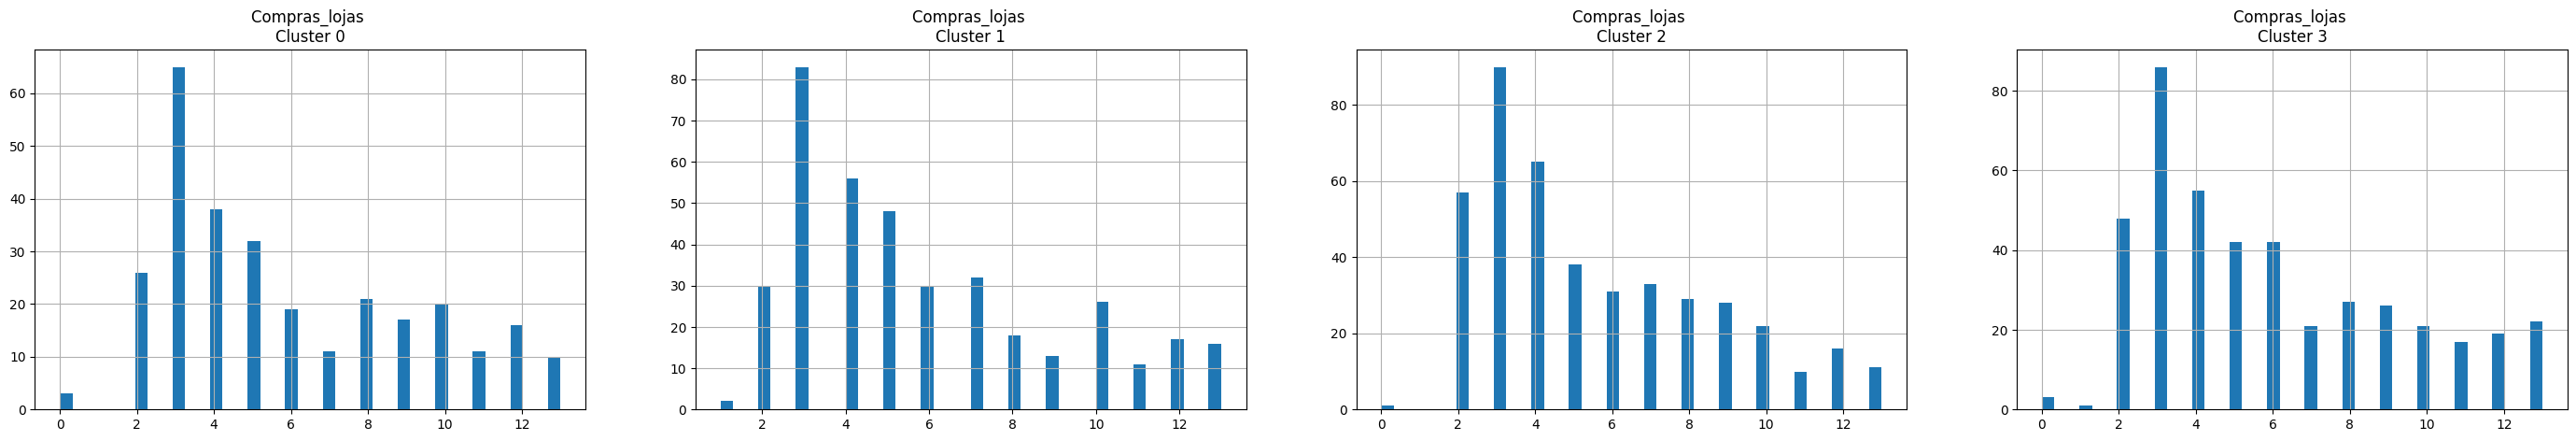

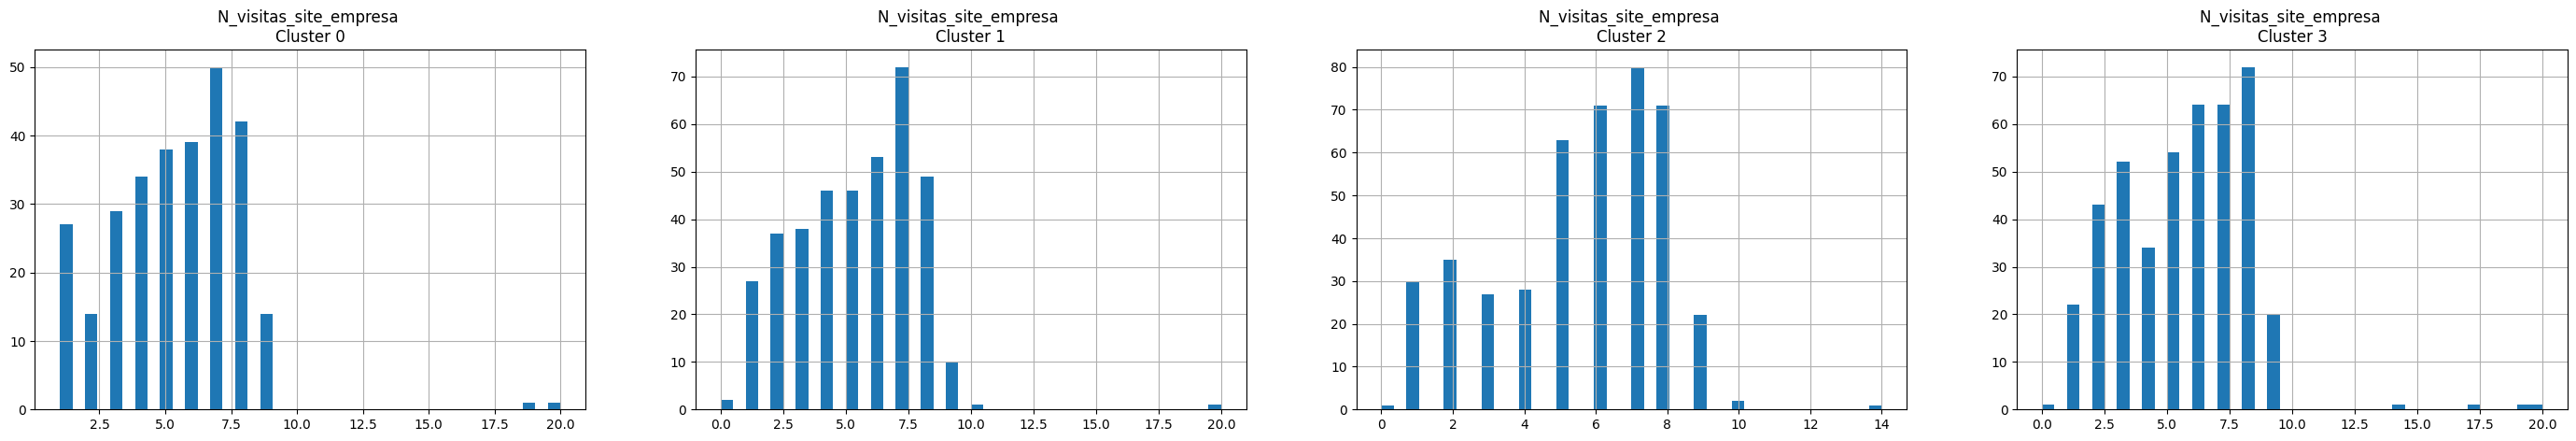

In [150]:
for i in if_renda.columns:
  plt.figure(figsize=(35,5))
  for j in range(4):
    plt.subplot(1, 4, j + 1)
    cluster =  ifood_df_cluster[ifood_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 40)
    plt.title('{} \nCluster {}'.format(i, j))

In [145]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(ifood_df_scaled)
labels = kmeans.labels_

In [146]:
labels, len(labels)

(array([1, 2, 3, ..., 3, 3, 2], dtype=int32), 1843)

In [147]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([302, 335, 807, 399]))

In [148]:
kmeans.cluster_centers_

array([[-0.03950668, -0.31402213, -0.28139641, -0.32364575, -0.30359562,
         0.39196672,  1.46740867,  0.85763065, -0.11029863,  0.16332553,
         0.71964828],
       [ 1.20299746,  1.43200445,  1.54470965,  1.47520392,  1.36732205,
         0.82404228, -0.52923001,  0.38747789,  1.29080964,  0.82690327,
        -1.04319788],
       [-0.84693379, -0.55239777, -0.65981362, -0.57302598, -0.54405354,
        -0.57628098, -0.2324828 , -0.76120275, -0.7609971 , -0.8162884 ,
         0.42780464],
       [ 0.73283819,  0.15262706,  0.25056033,  0.16536259,  0.18216591,
         0.17701913, -0.19611966,  0.56511547,  0.53888124,  0.83310234,
        -0.5340873 ]])

In [149]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [ifood_df.columns])
cluster_centers

ValueError: Shape of passed values is (4, 11), indices imply (4, 39)

In [ ]:
cluster_centers.shape

(4, 39)

In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [ifood_df.columns])
cluster_centers

,Renda_anual,N_criancas,N_adolescentes,Recency,N_dias_ultima_compra,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,...,casados juntos,viúva conjugal,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,56668.919831,0.223629,0.930380,47.772152,436.164557,20.331224,124.270042,26.327004,18.919831,59.704641,...,0.248945,0.050633,0.065401,-1.387779e-17,0.438819,0.202532,0.293249,626.012658,566.308017,0.253165
1,81509.694805,0.032468,0.162338,47.941558,875.318182,54.136364,479.428571,77.987013,63.857143,75.655844,...,0.227273,0.051948,0.084416,6.938894e-18,0.474026,0.194805,0.246753,1550.727273,1475.071429,2.025974
2,72685.002725,0.059946,0.275204,49.291553,514.626703,71.395095,420.204360,103.615804,74.136240,74.318801,...,0.242507,0.043597,0.087193,2.724796e-03,0.621253,0.122616,0.166213,1183.978202,1109.659401,0.160763
3,34548.225236,0.807783,0.445755,49.174528,42.099057,5.082547,24.158019,7.563679,5.329009,15.997642,...,0.246462,0.018868,0.108491,5.070755e-02,0.487028,0.160377,0.193396,84.232311,68.234670,0.084906


In [ ]:
cluster_centers.shape

(4, 39)

In [ ]:
labels_df = pd.DataFrame({'cluster': labels})

In [ ]:
labels_df

,cluster
0,2
1,3
2,2
3,3
4,0
...,...
1838,3
1839,2
1840,2
1841,0


In [ ]:
ifood_df_cluster = ifood_df.join(labels_df)
ifood_df_cluster.head()

,Renda_anual,N_criancas,N_adolescentes,Recency,N_dias_ultima_compra,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,...,viúva conjugal,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,cluster
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,2.0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,3.0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,2.0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,3.0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,0.0


In [ ]:
ifood_df_cluster.shape, ifood_df.shape

((1843, 40), (1843, 39))

/tmp/ipykernel_13647/3095481010.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(35,5))


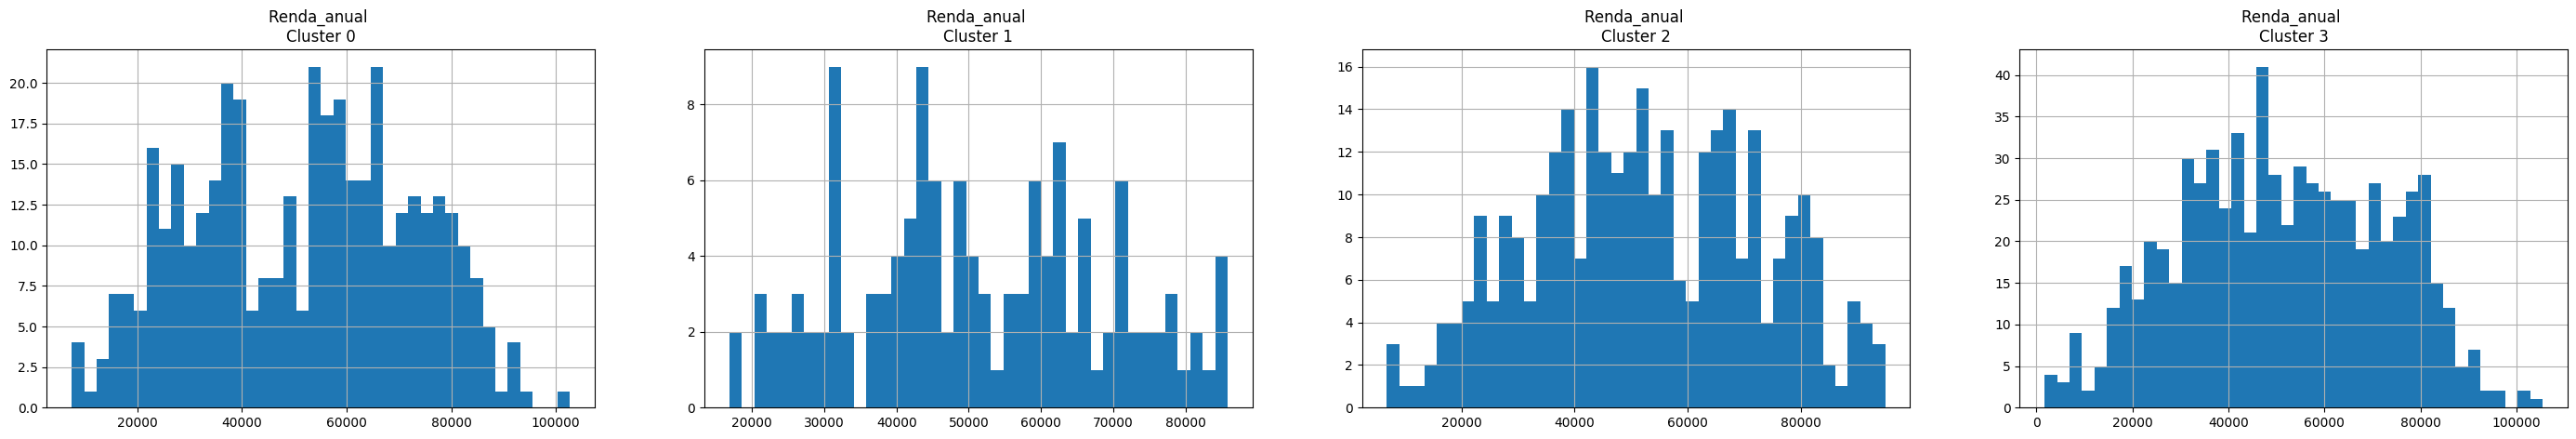

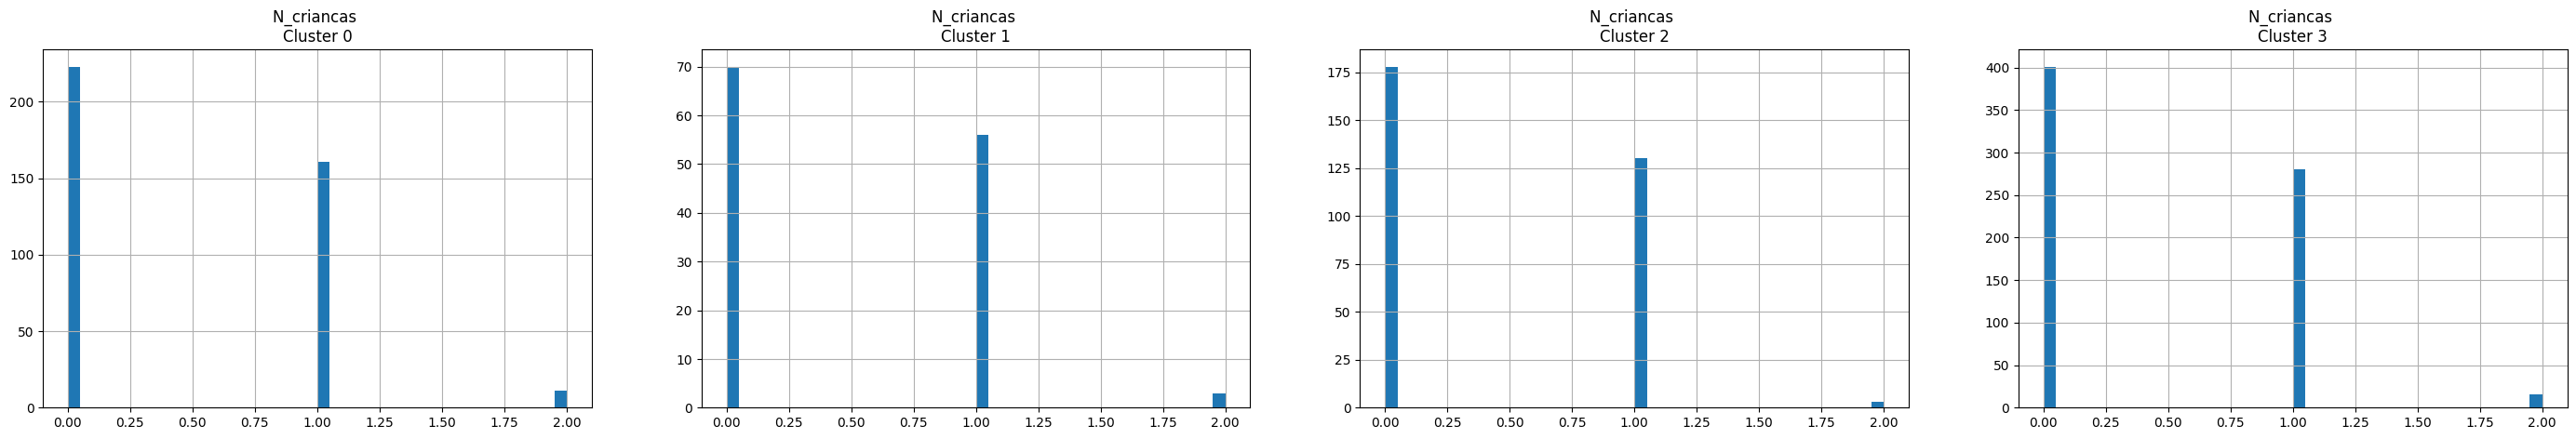

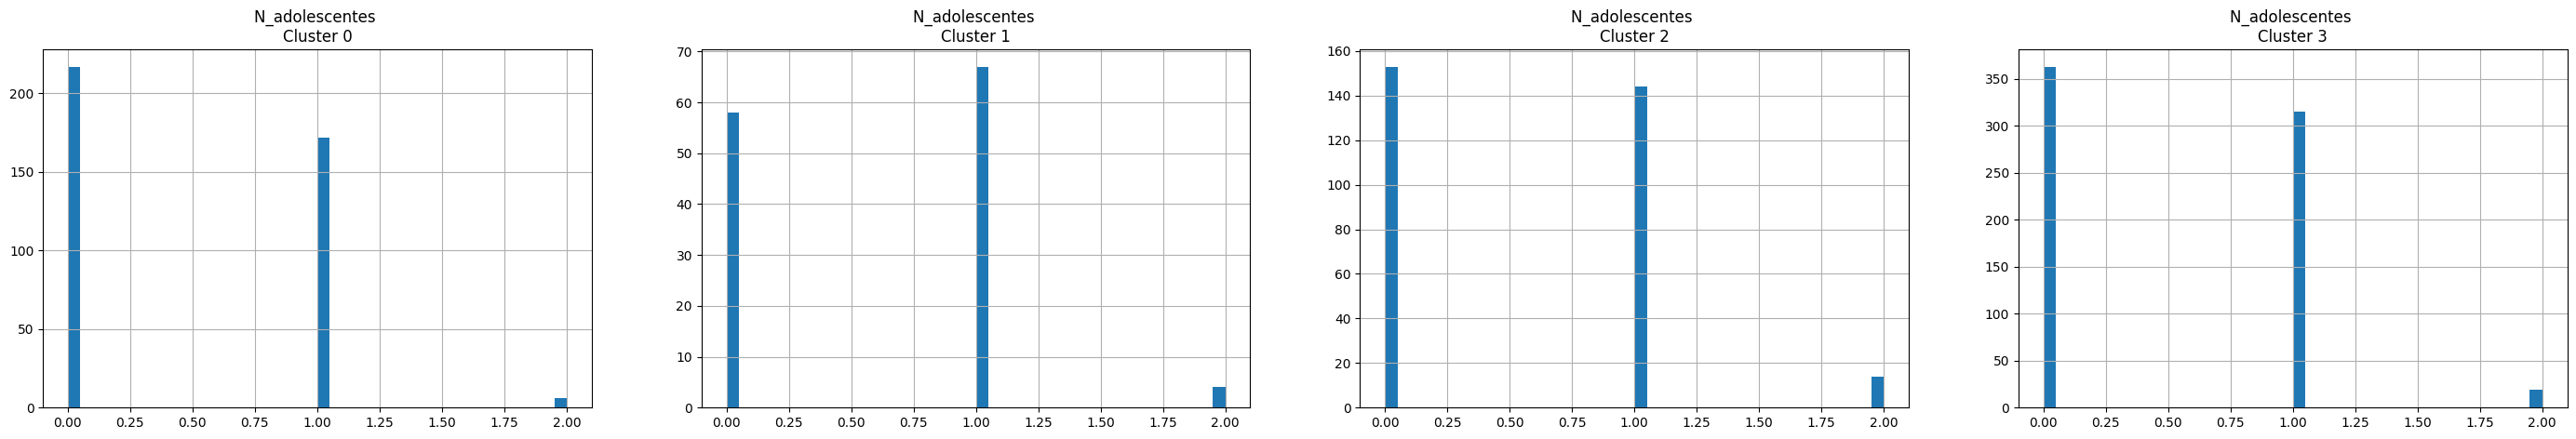

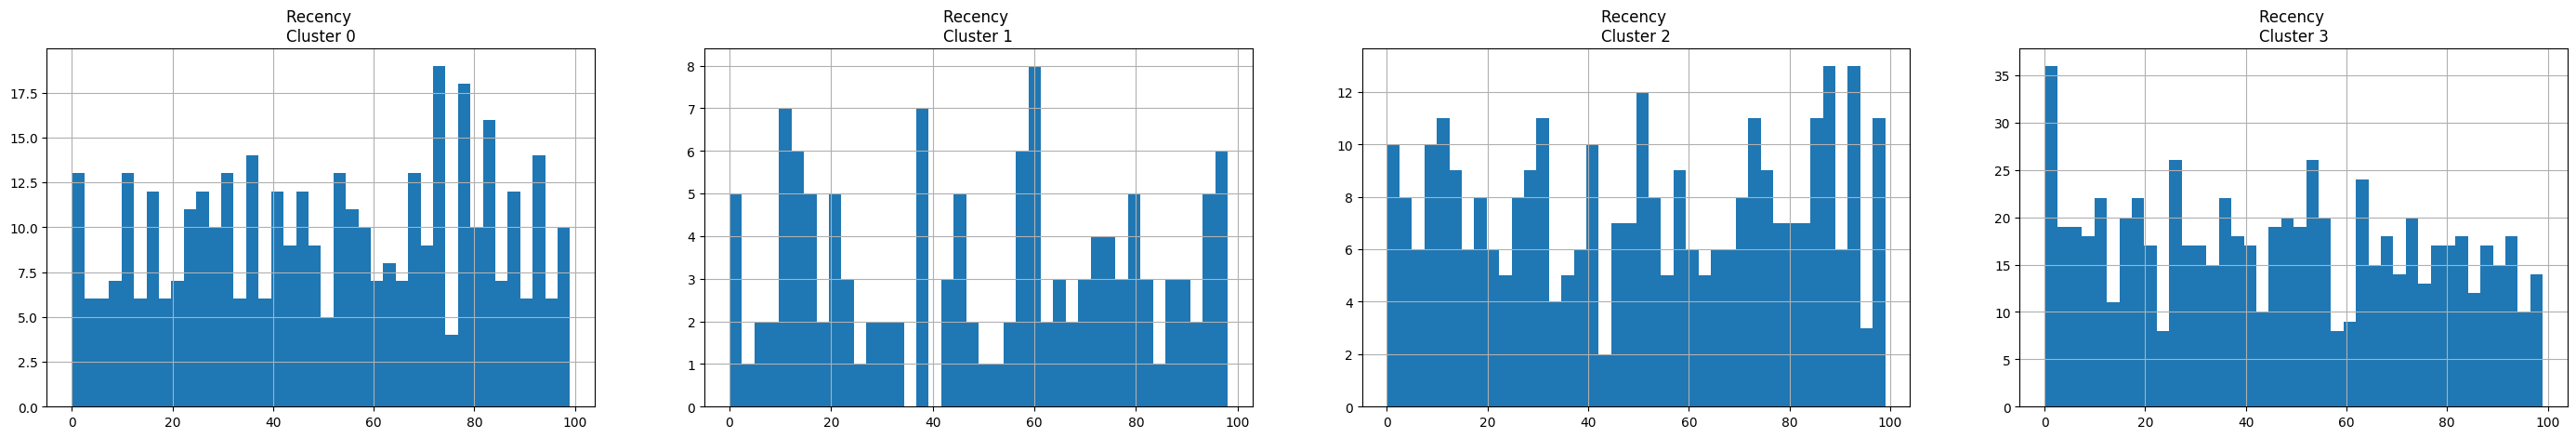

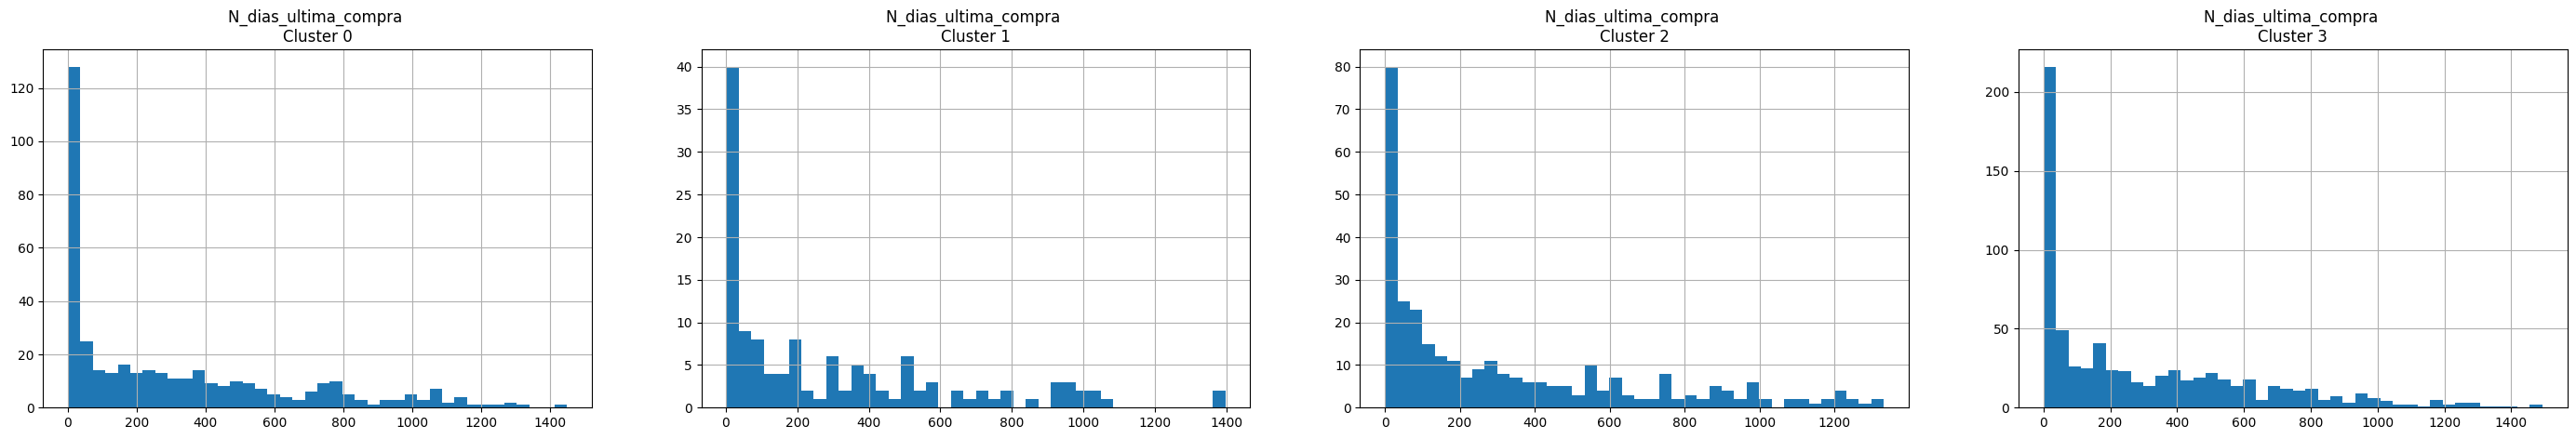

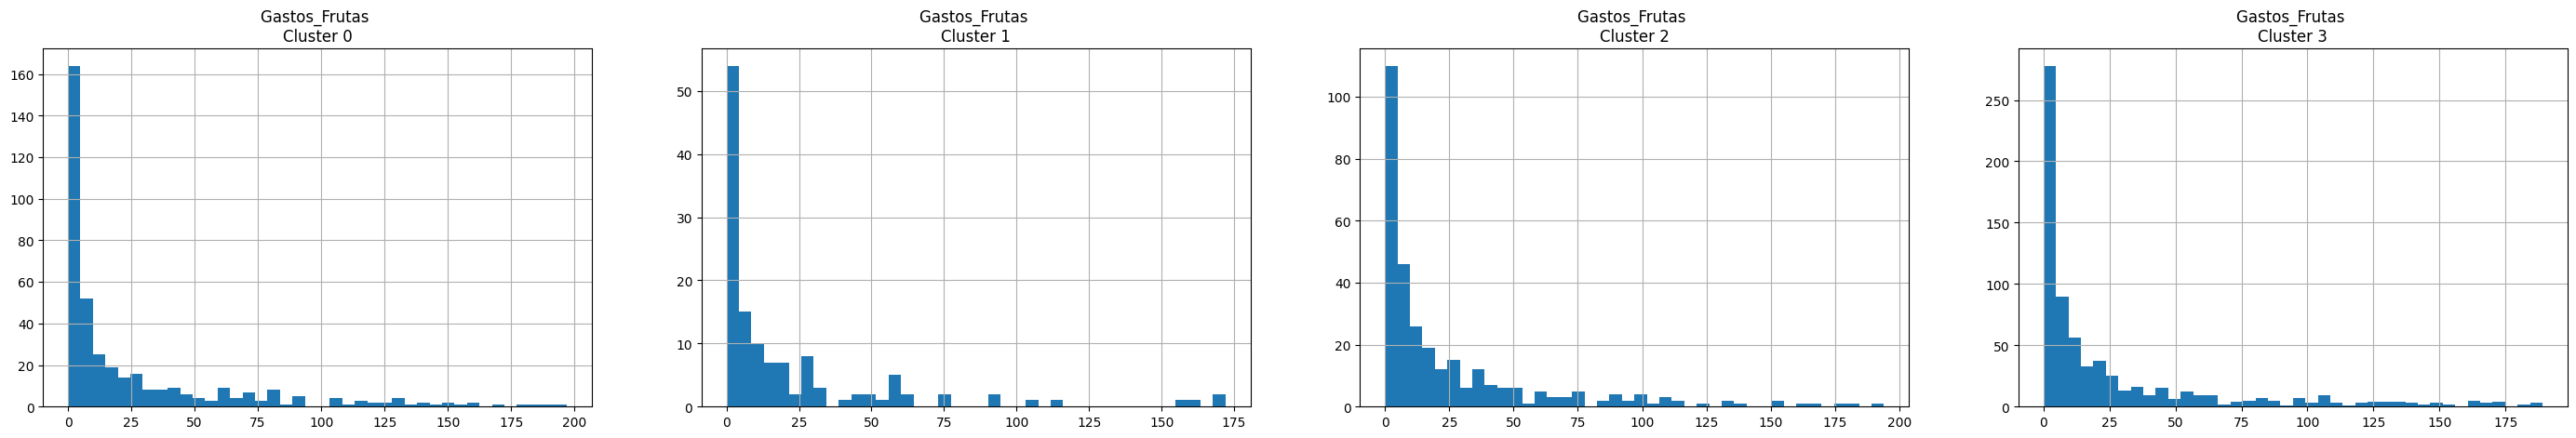

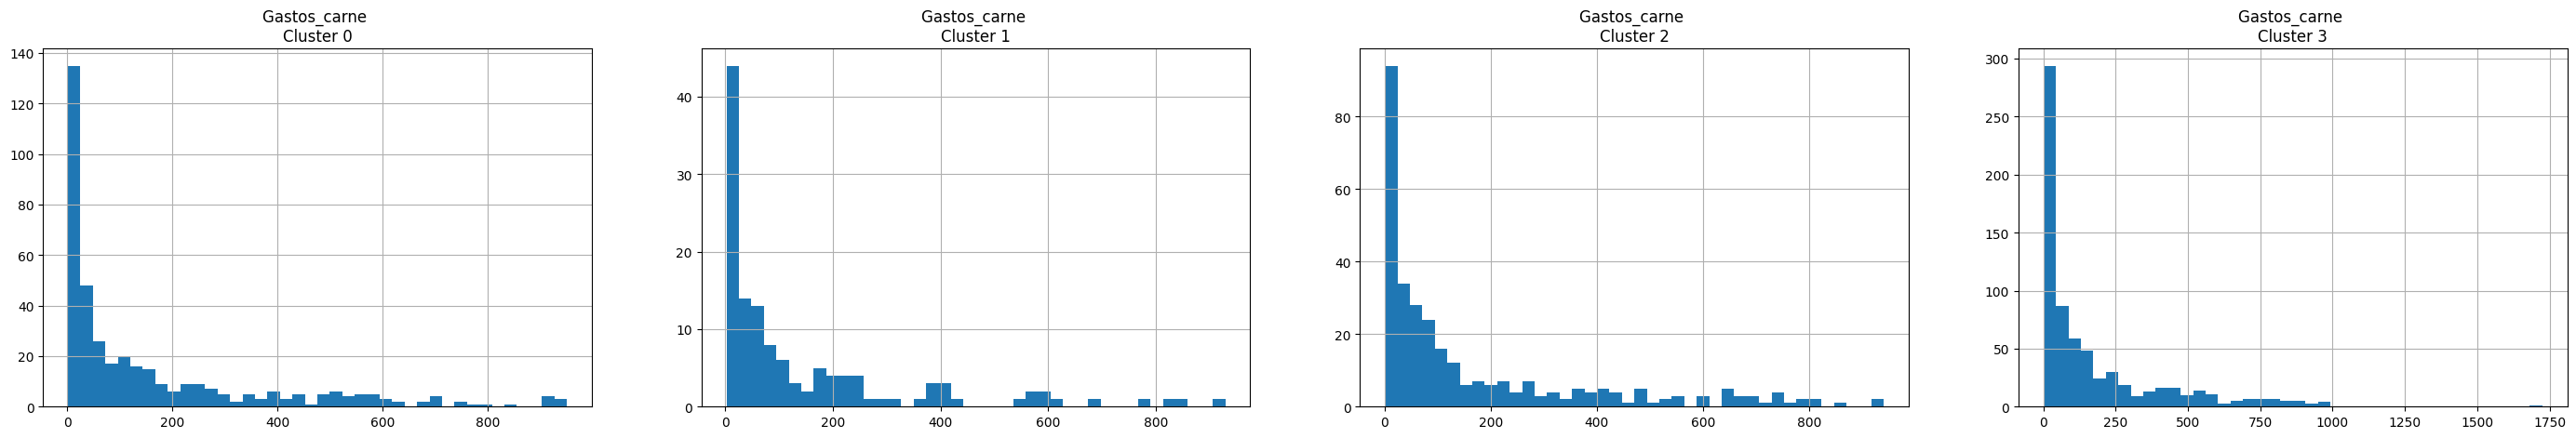

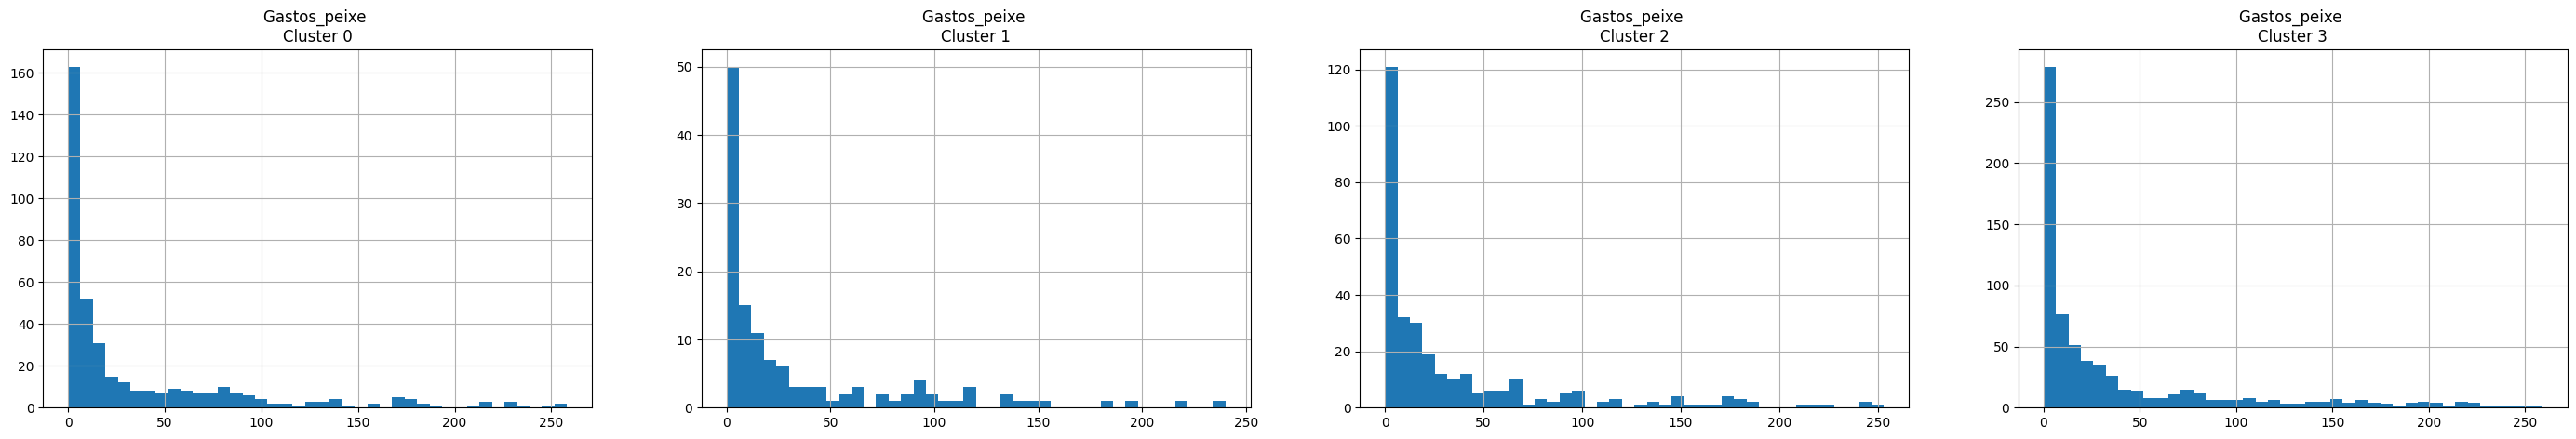

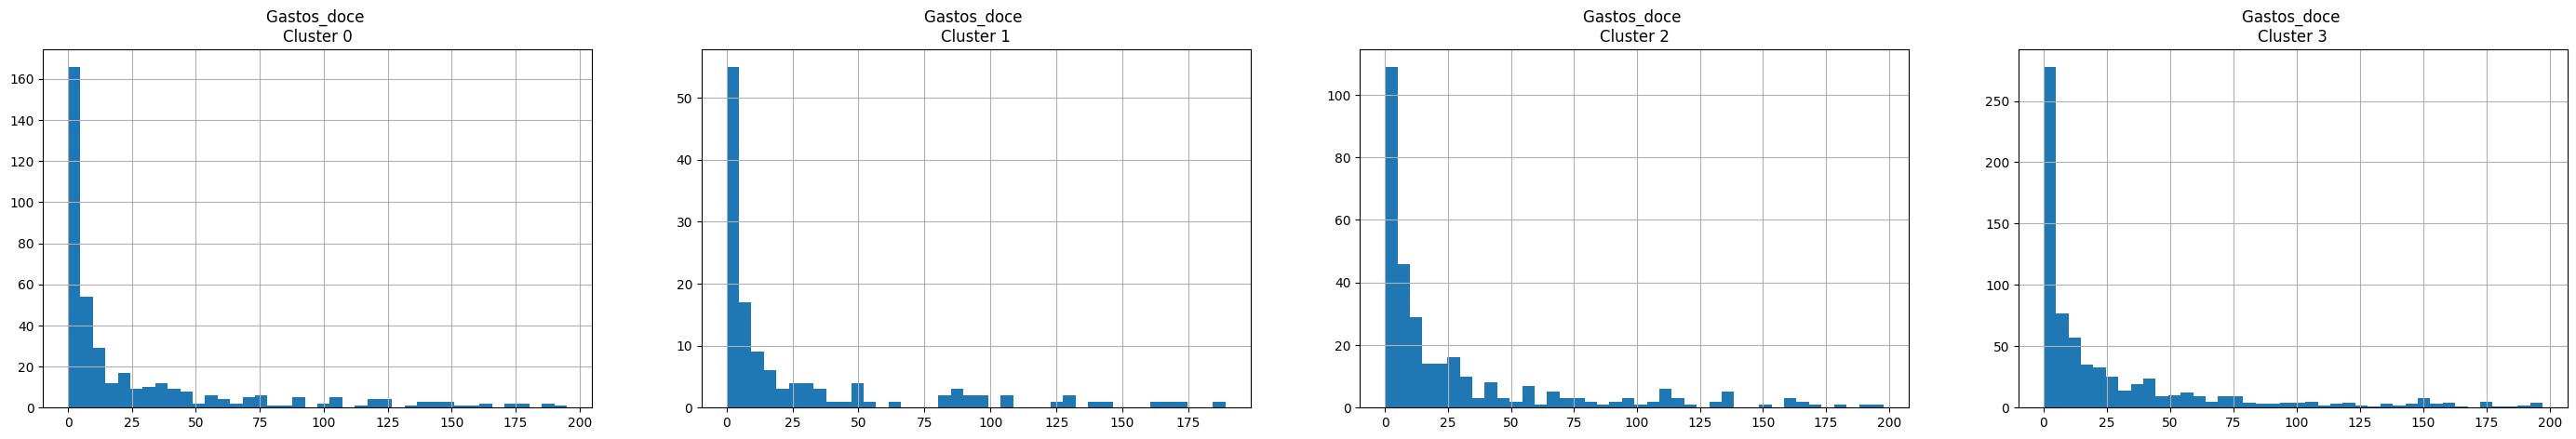

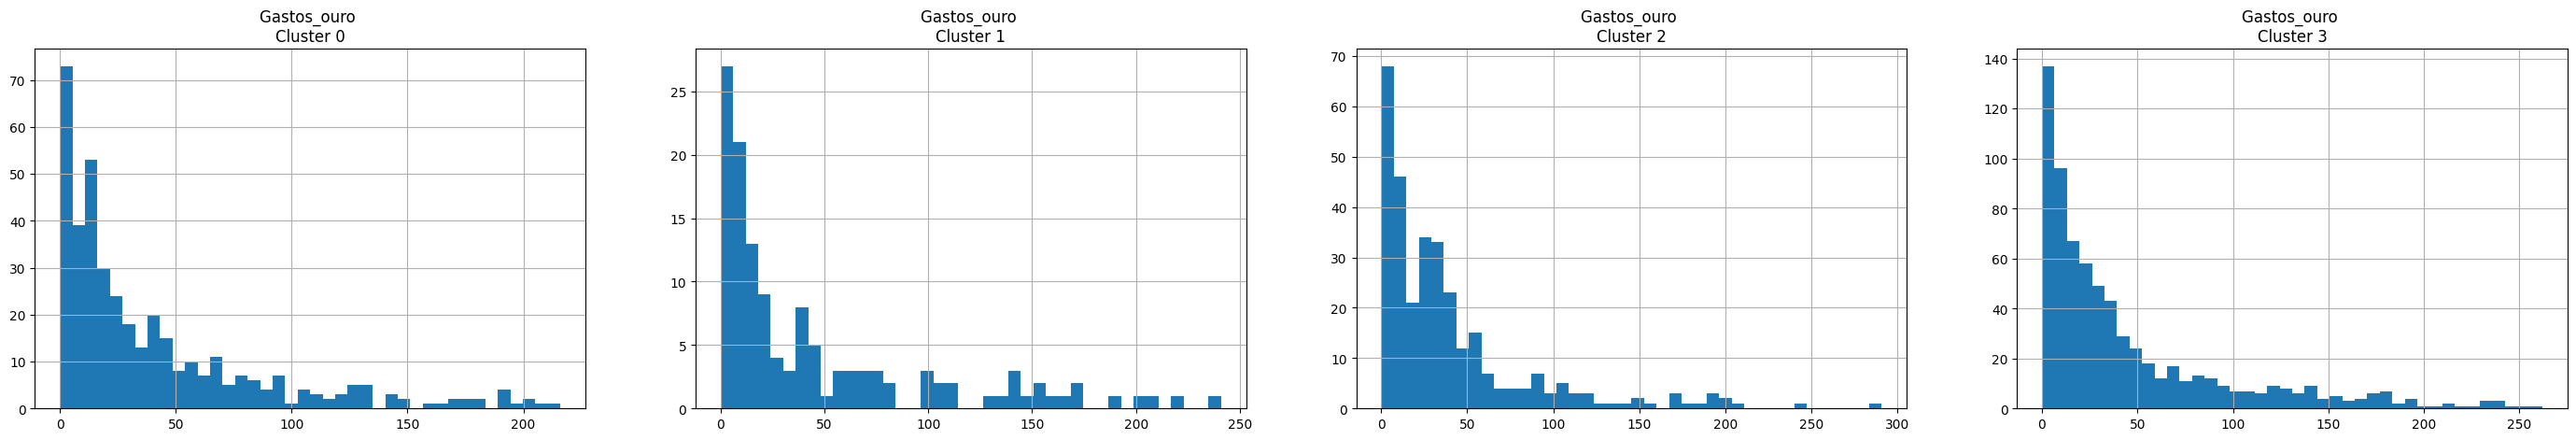

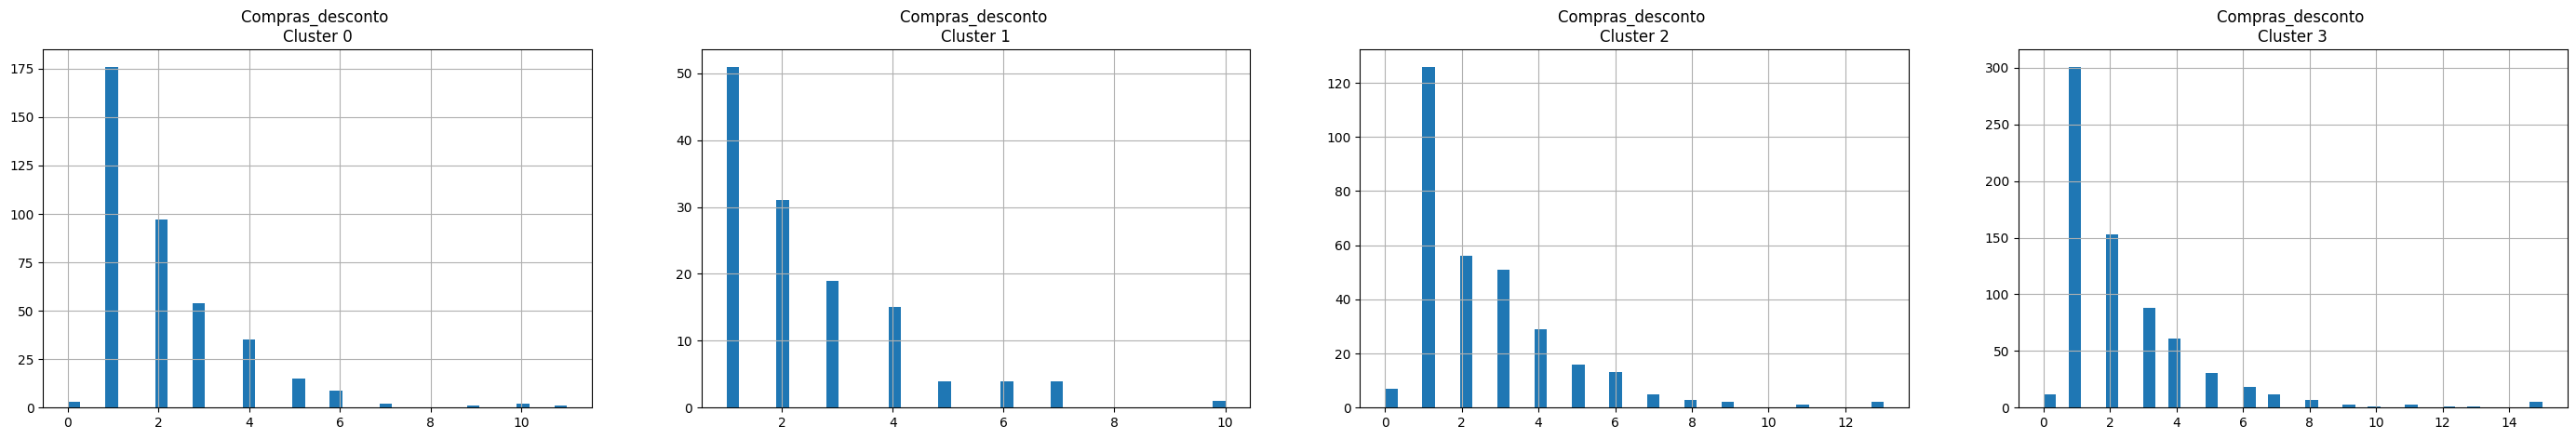

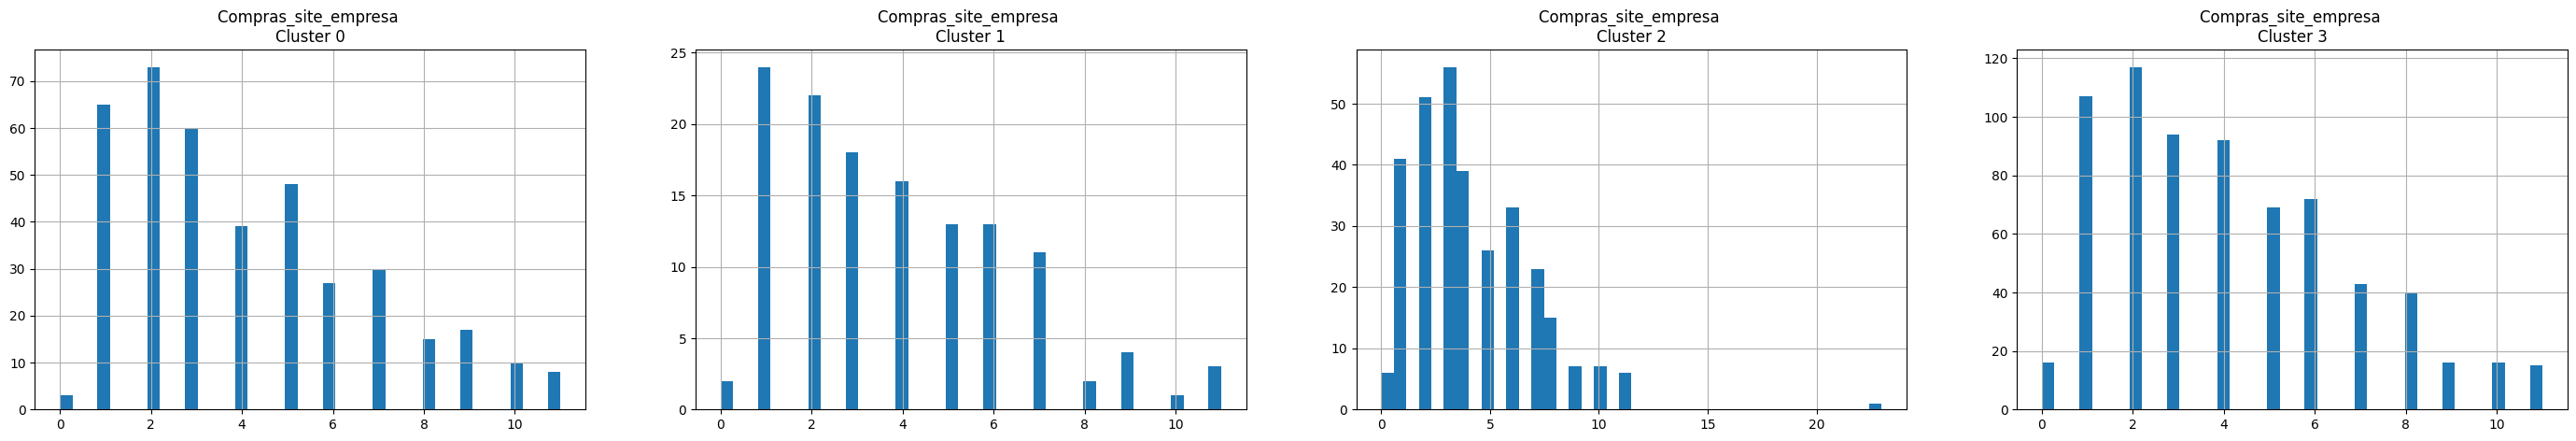

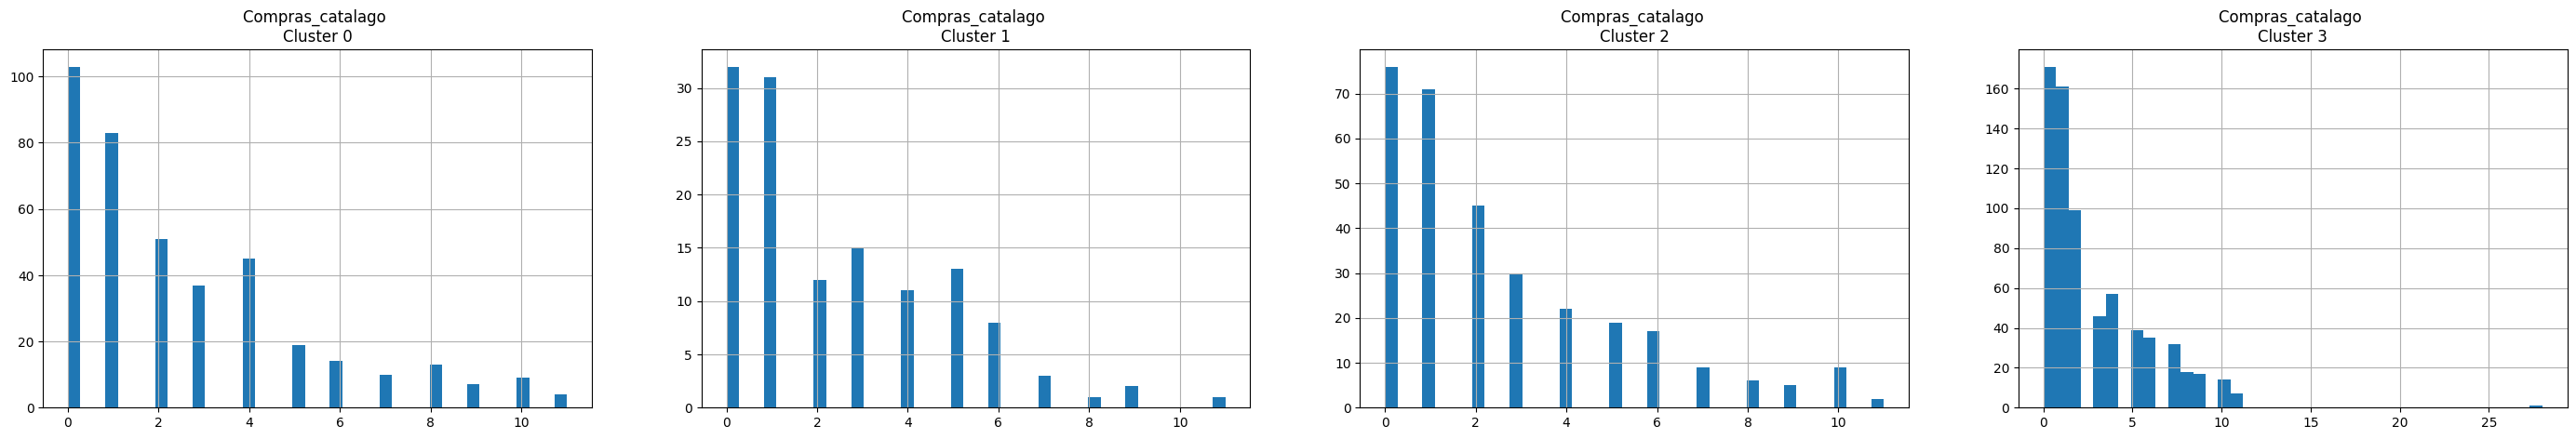

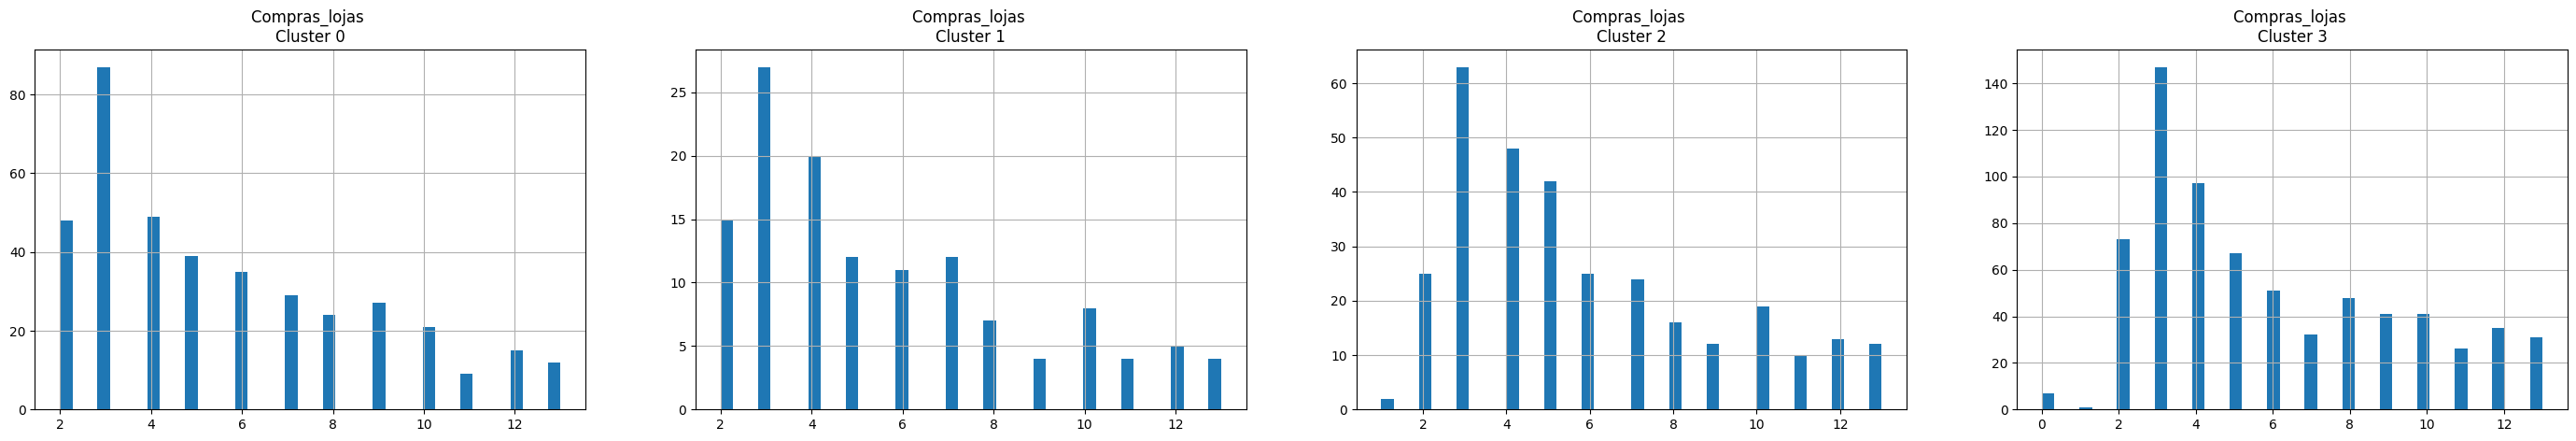

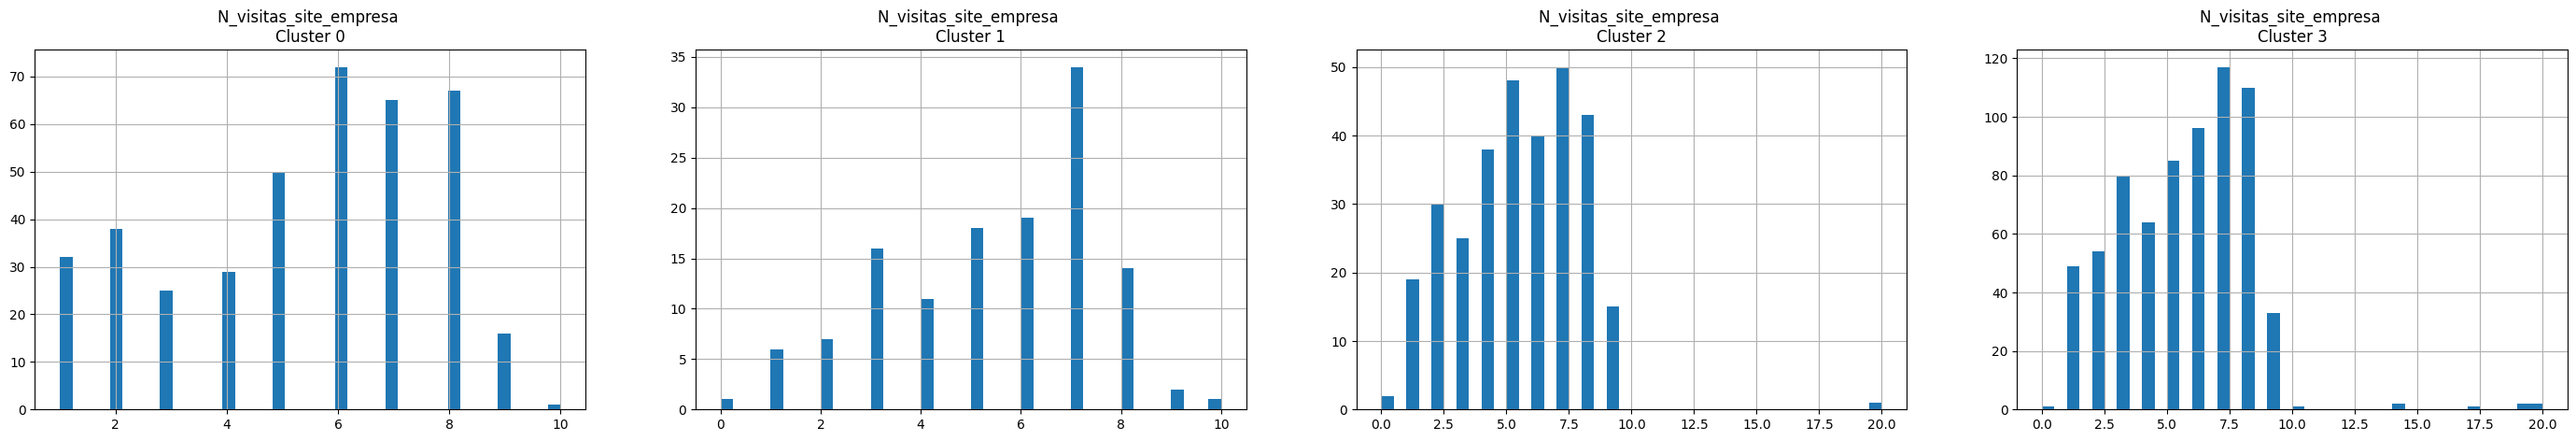

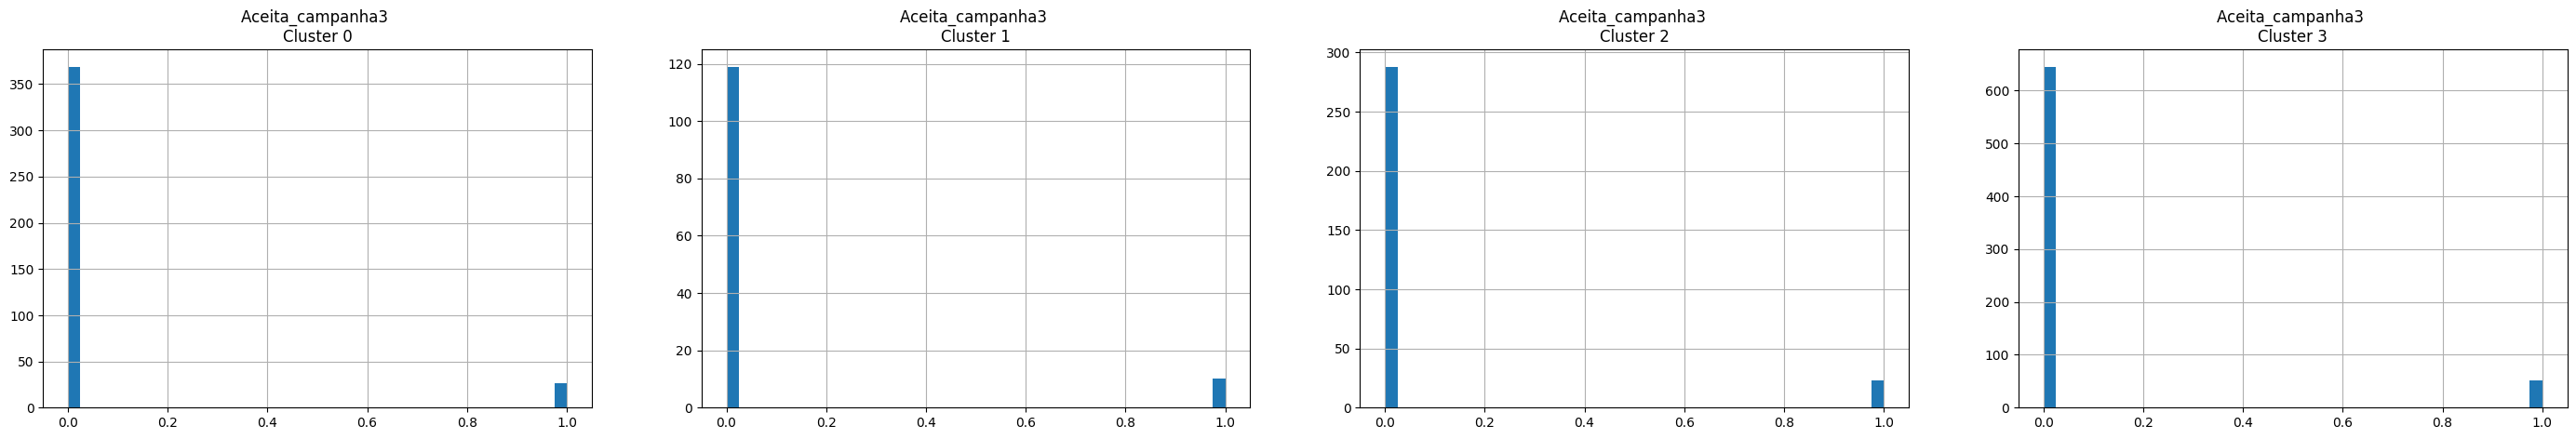

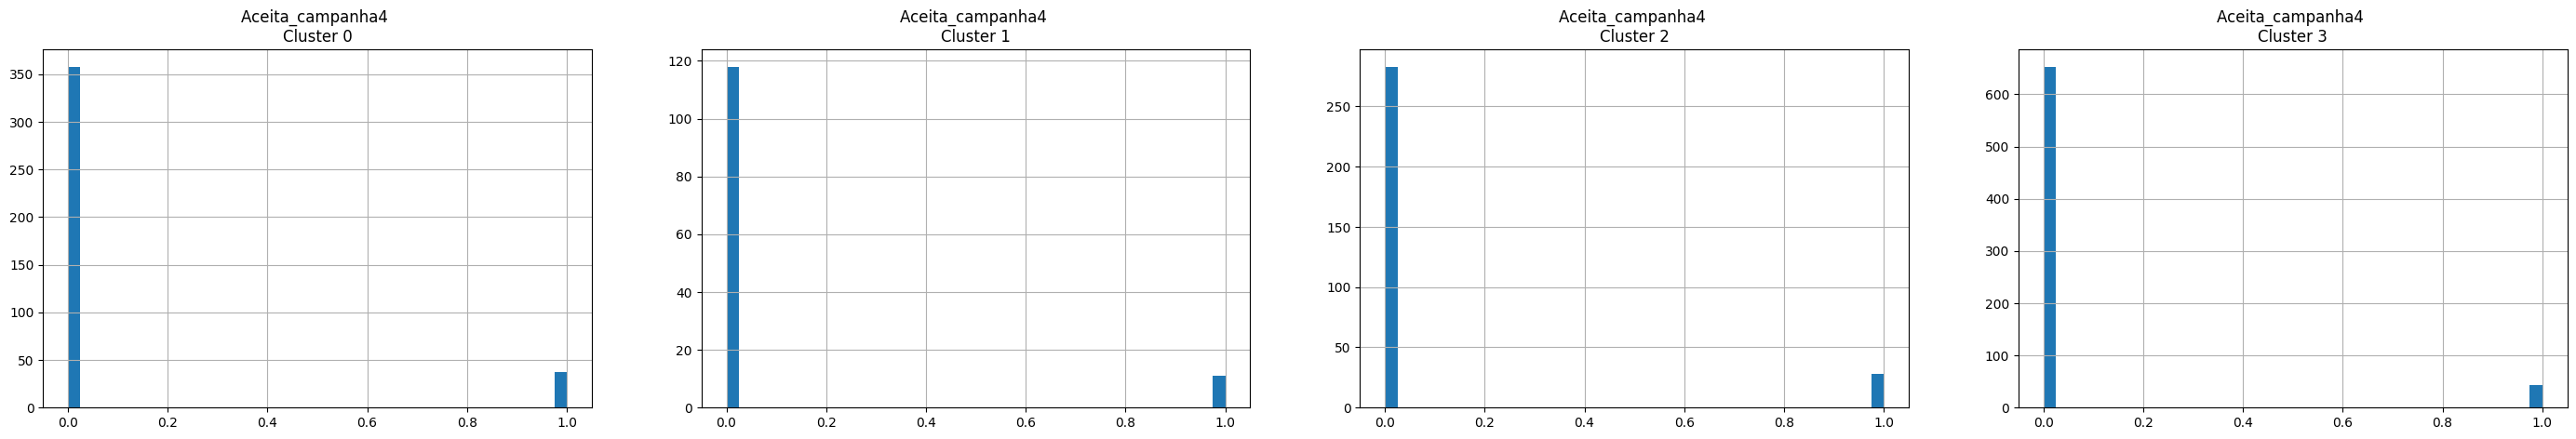

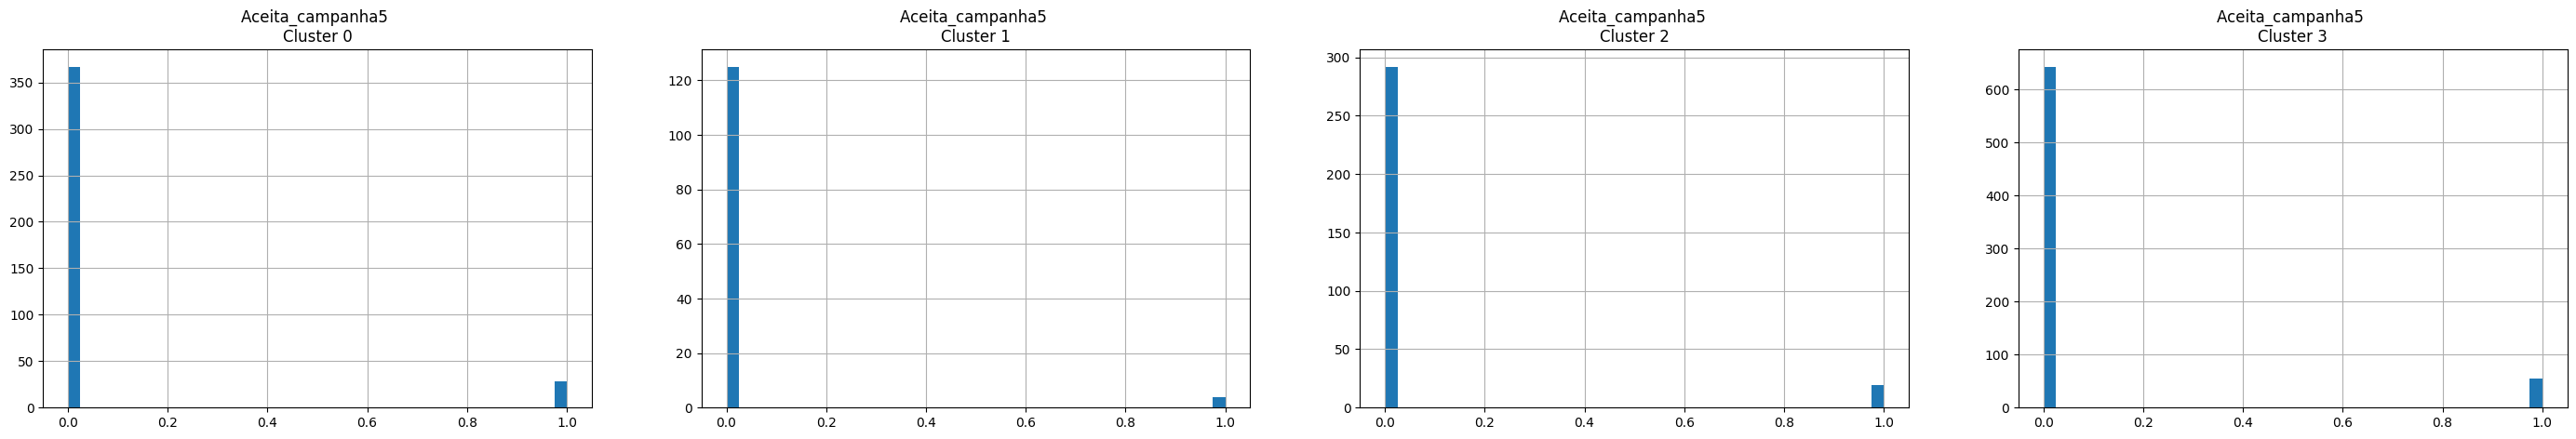

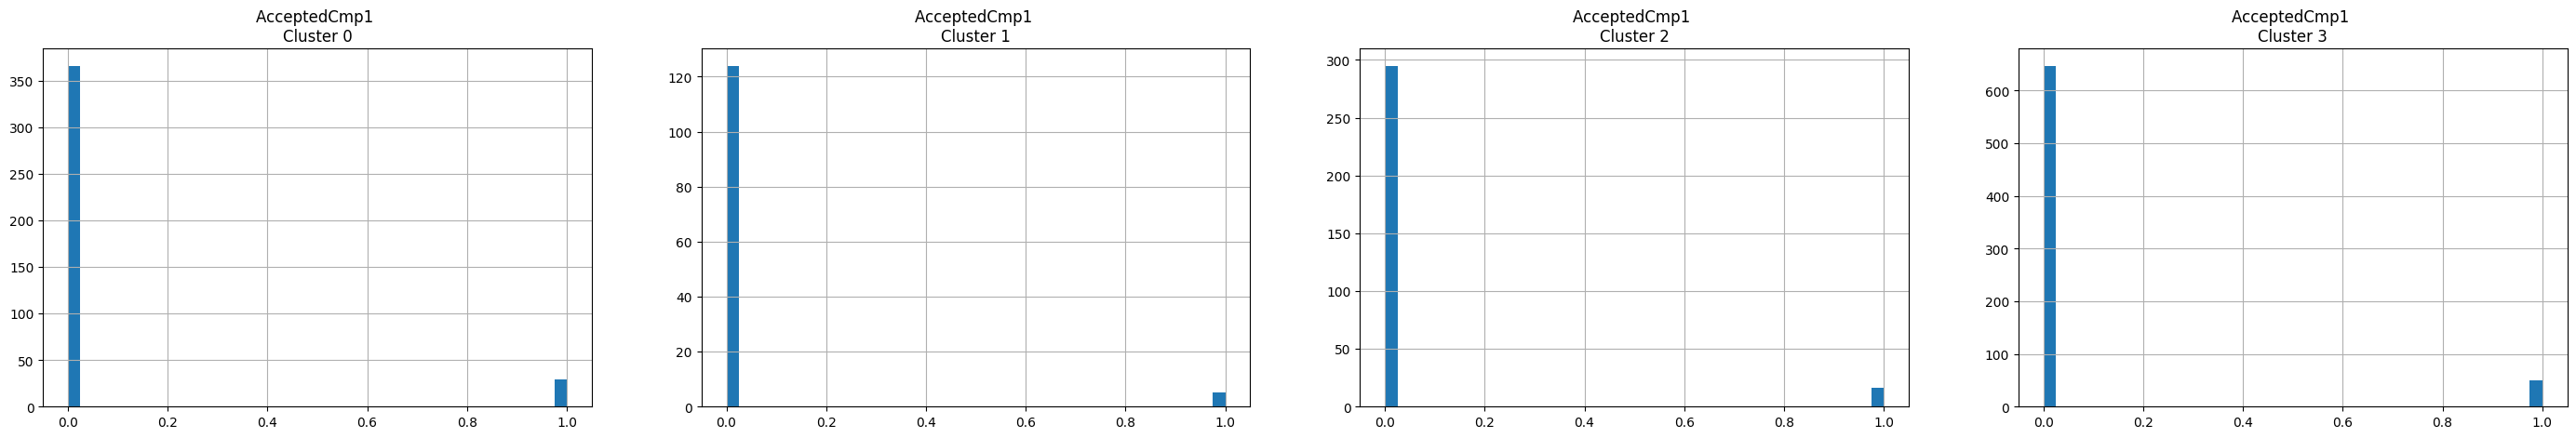

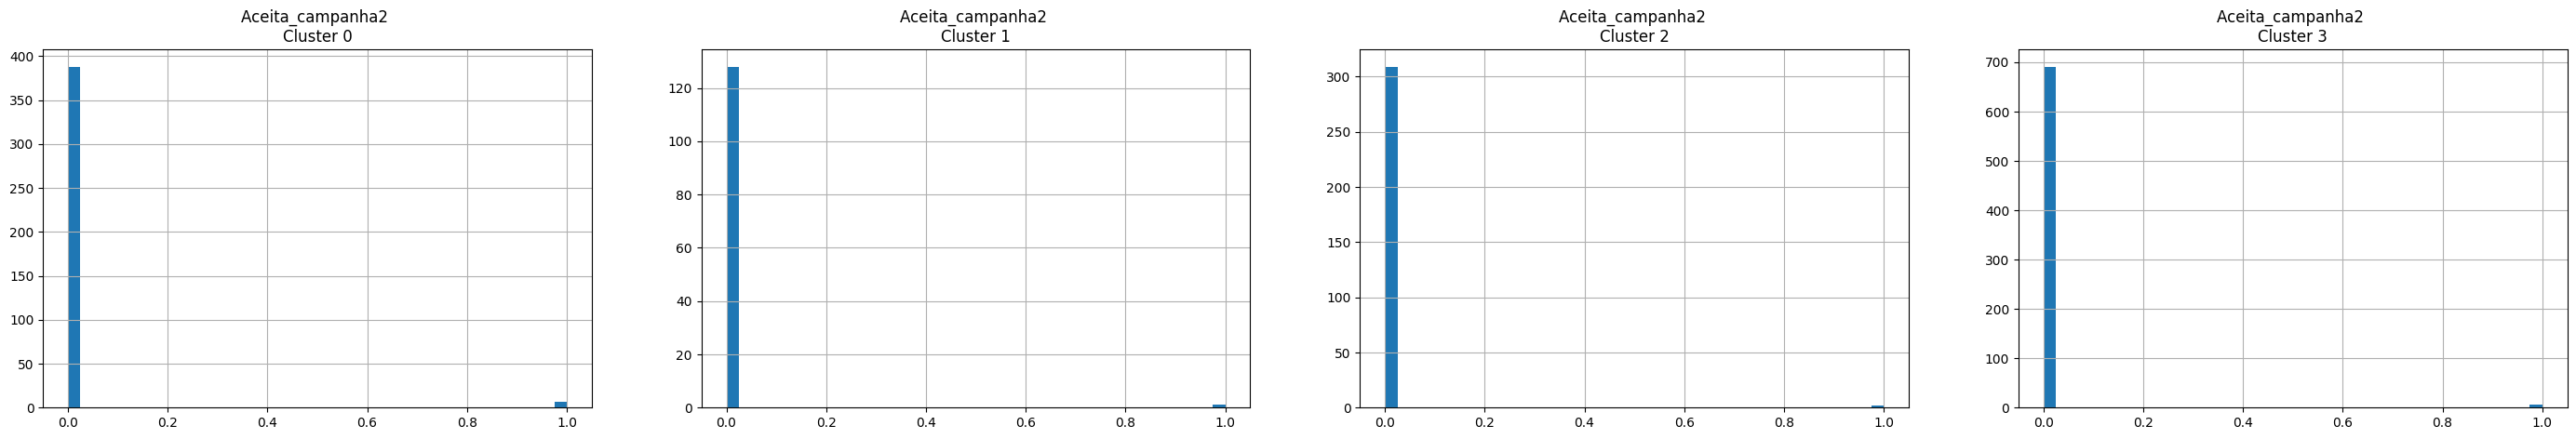

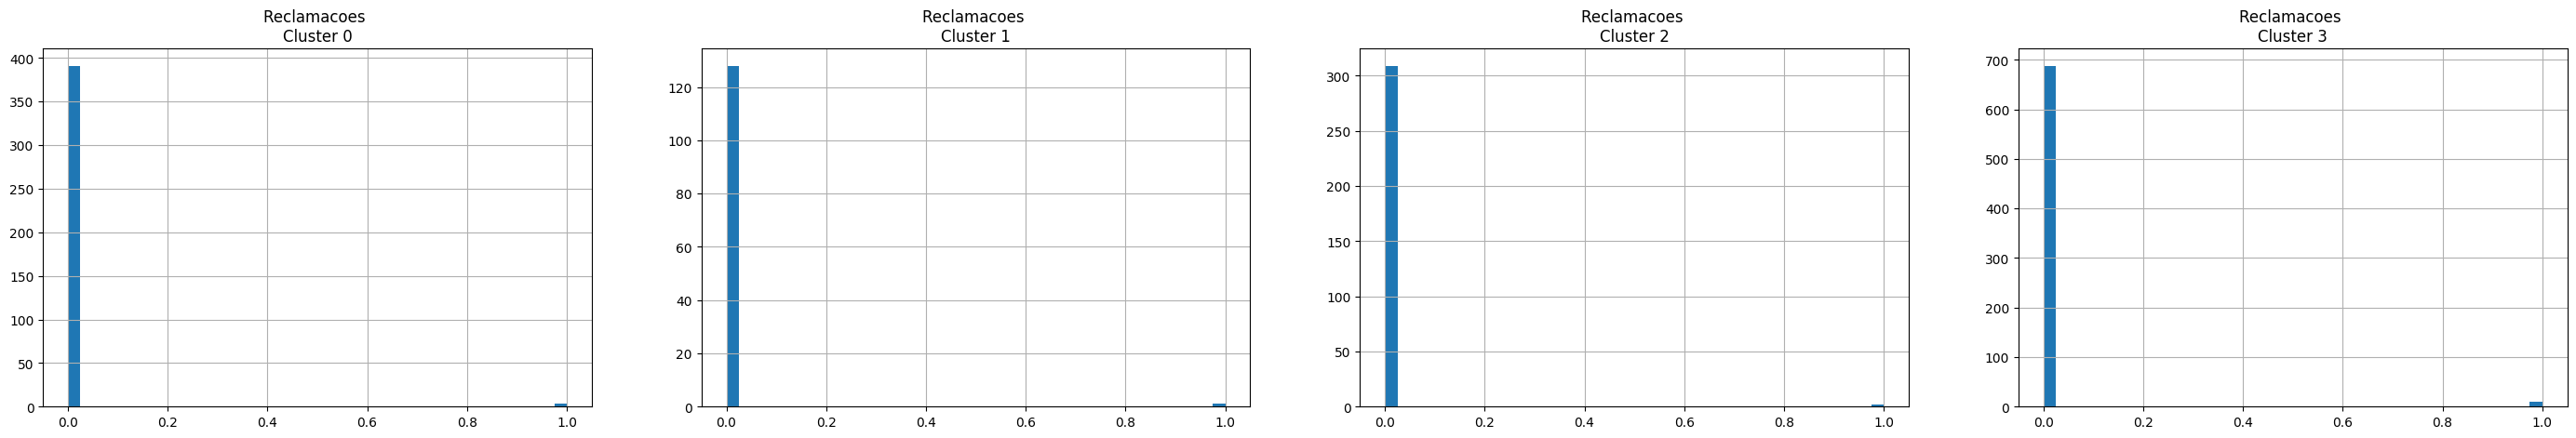

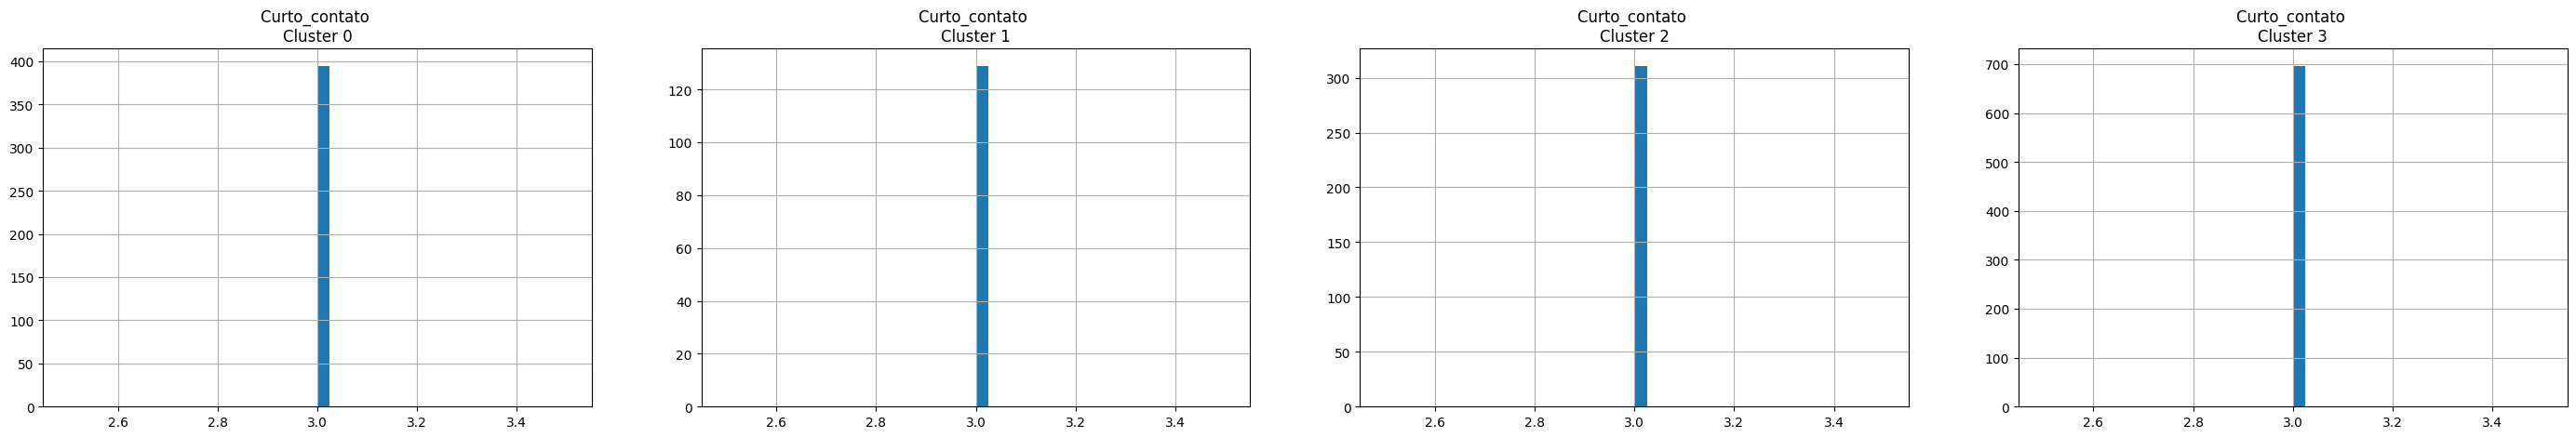

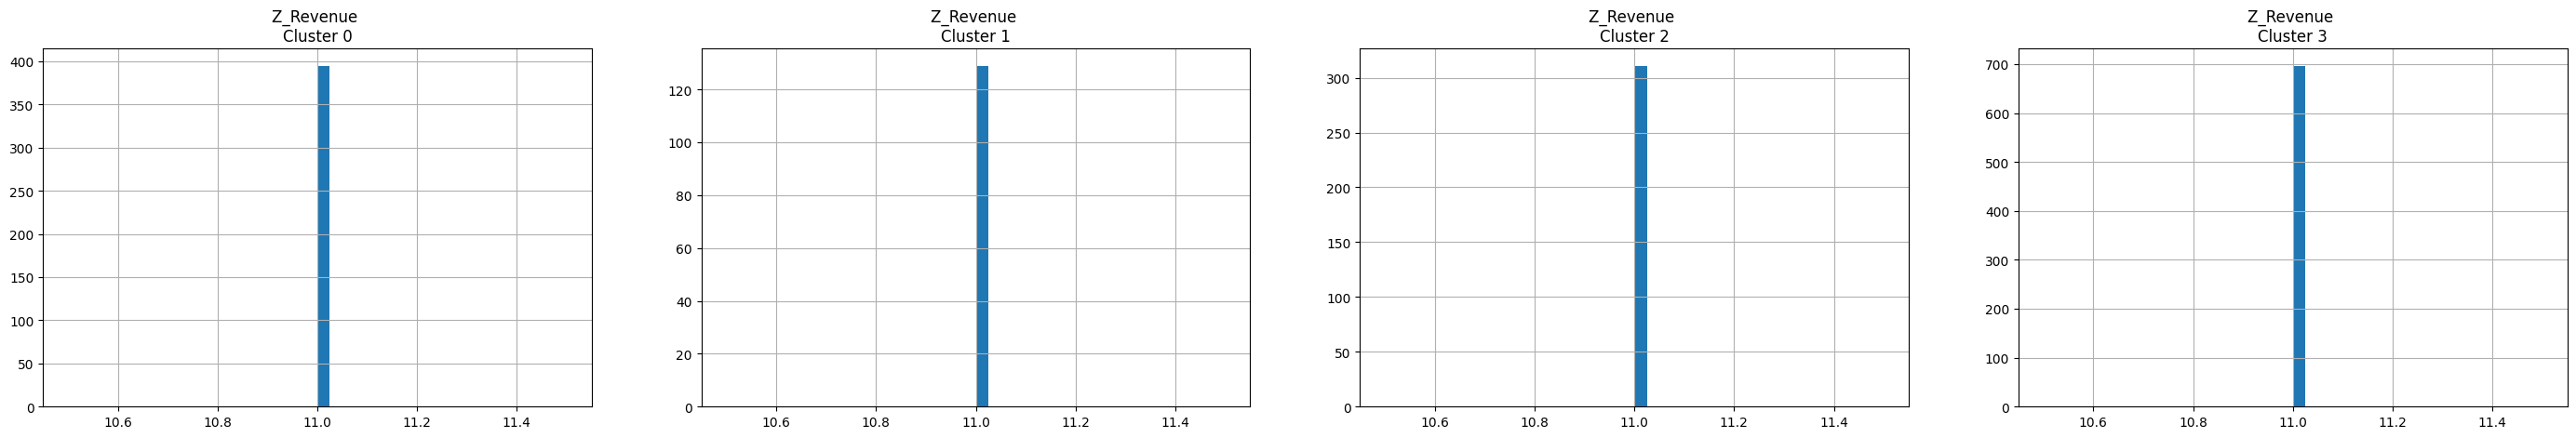

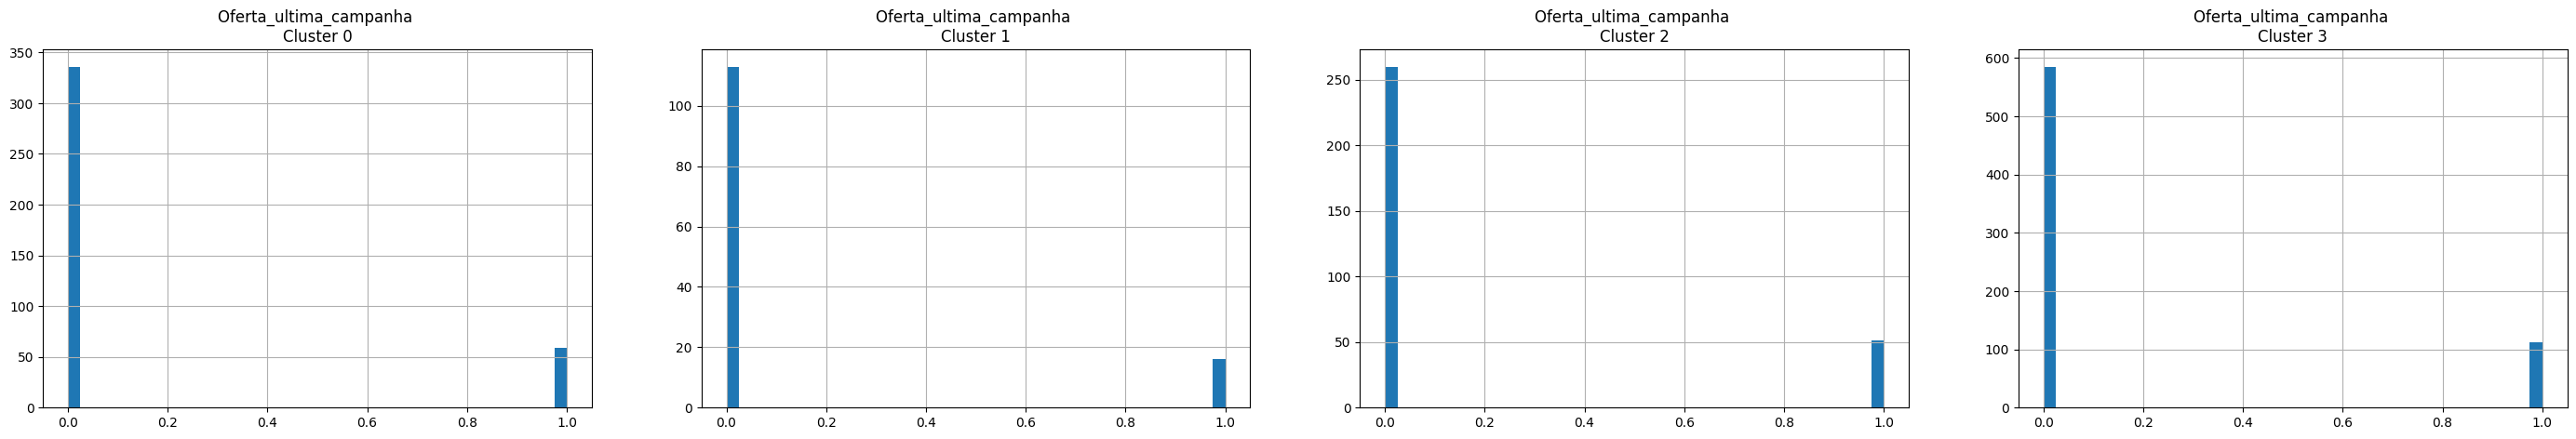

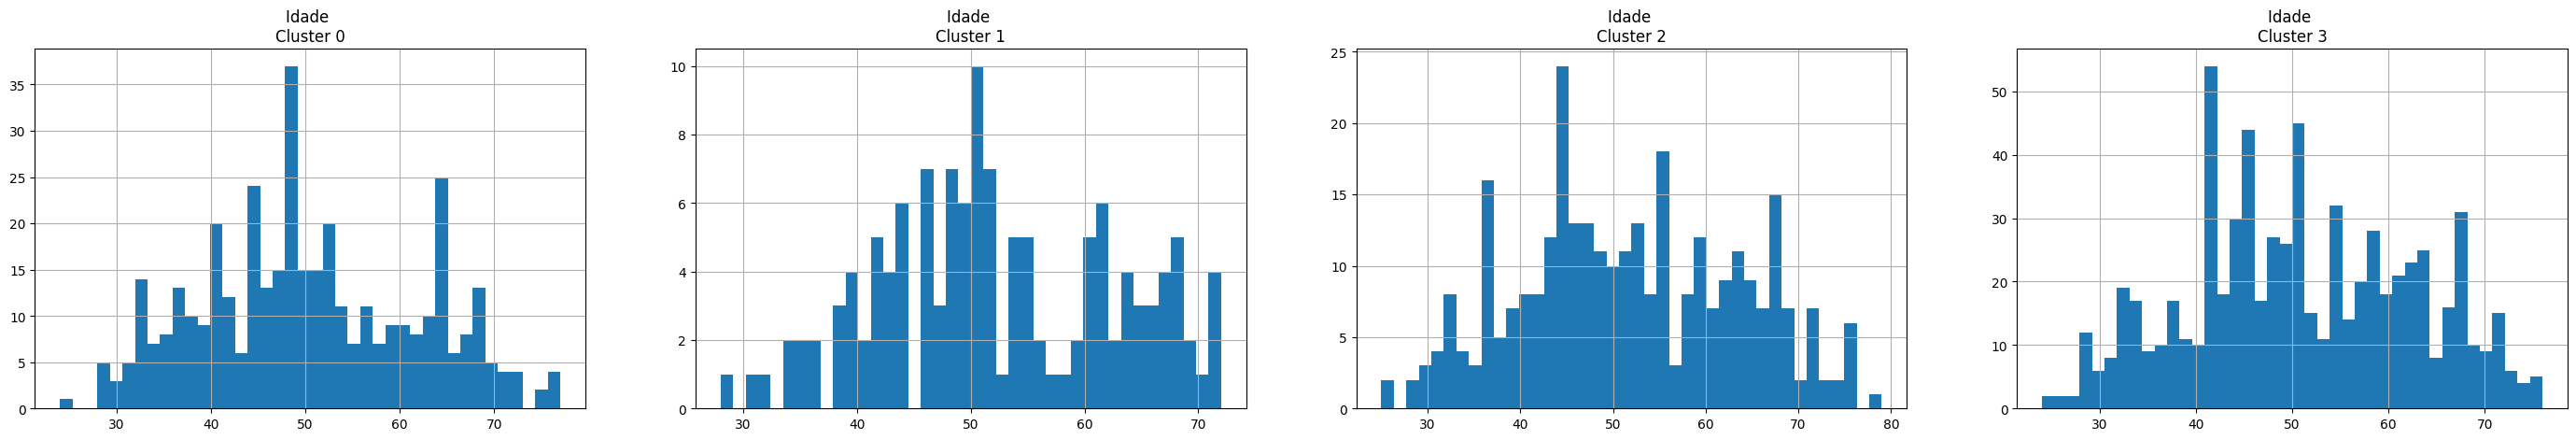

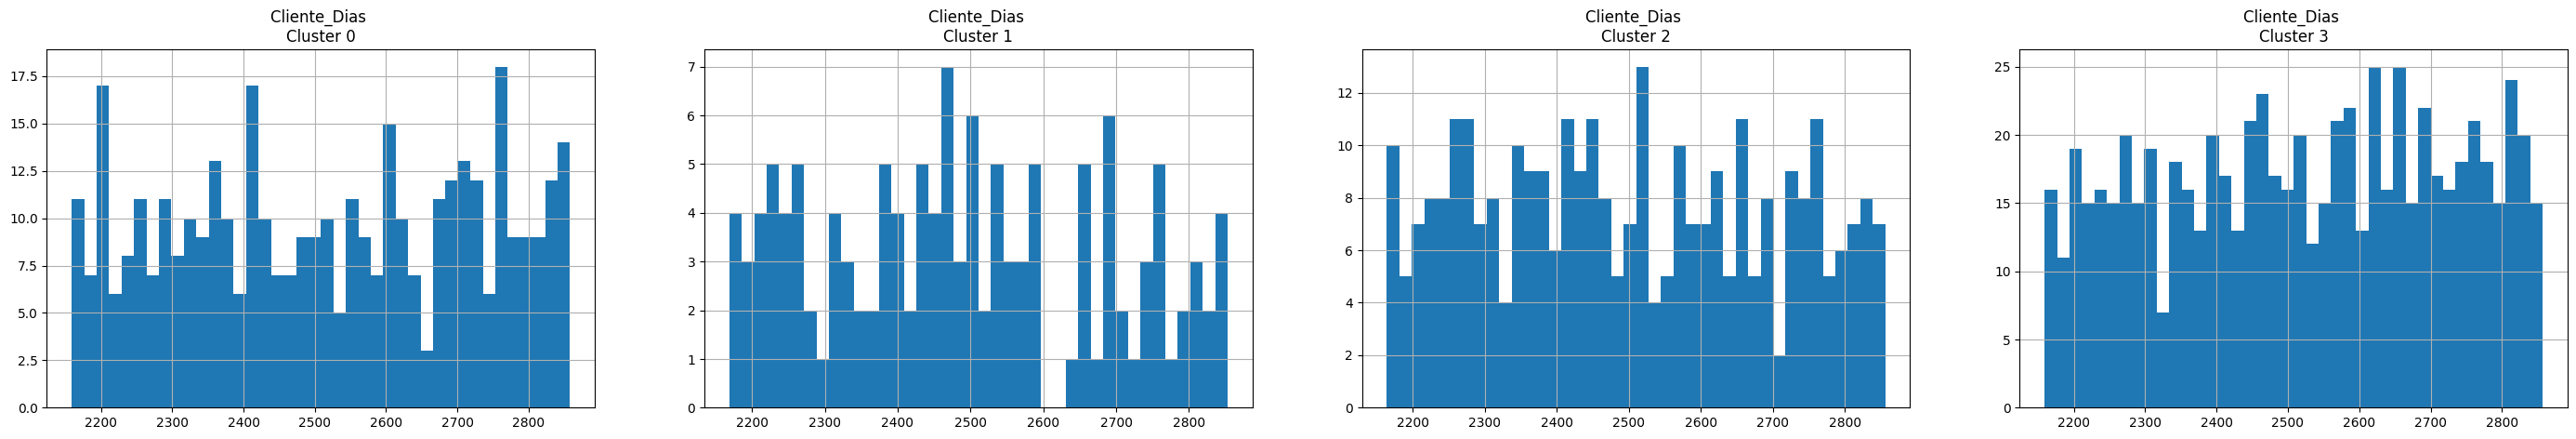

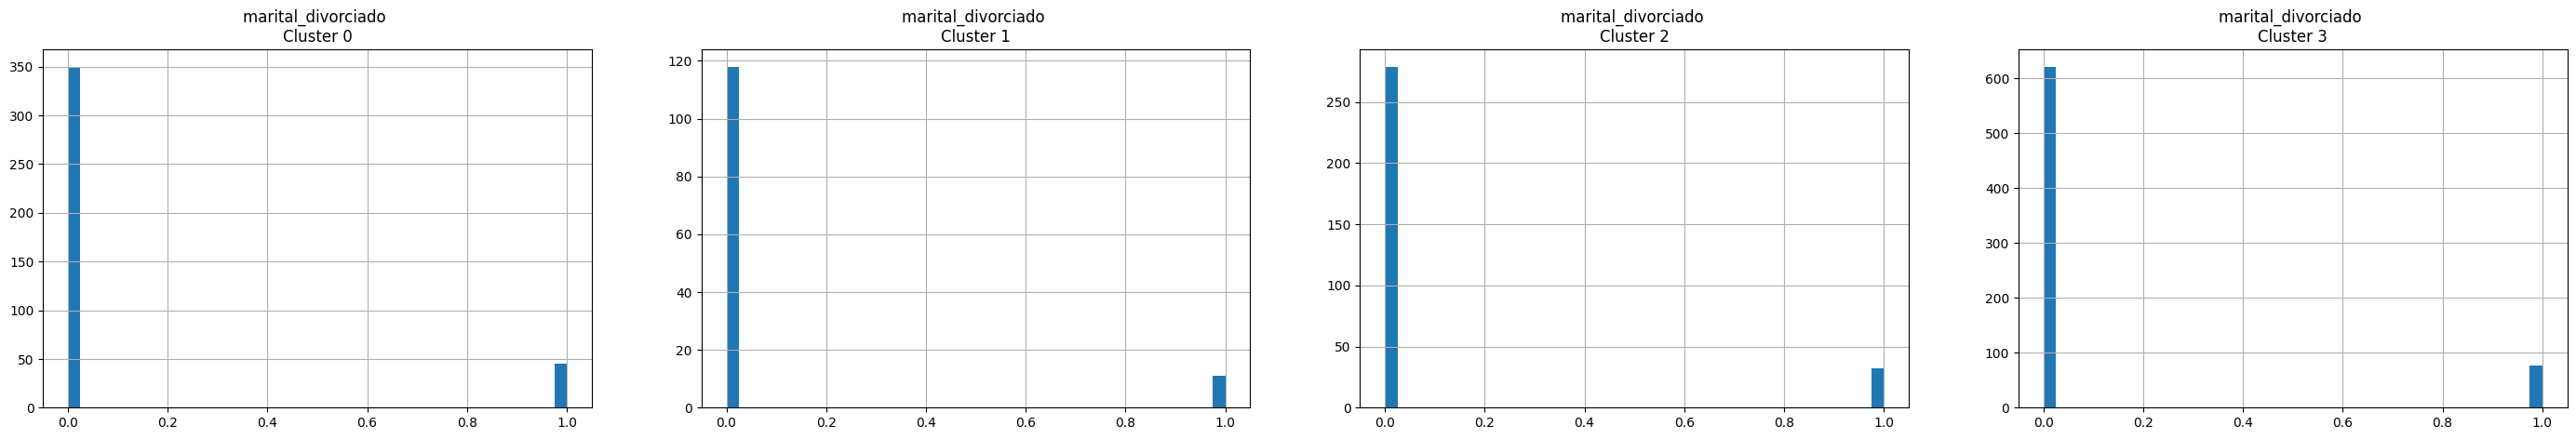

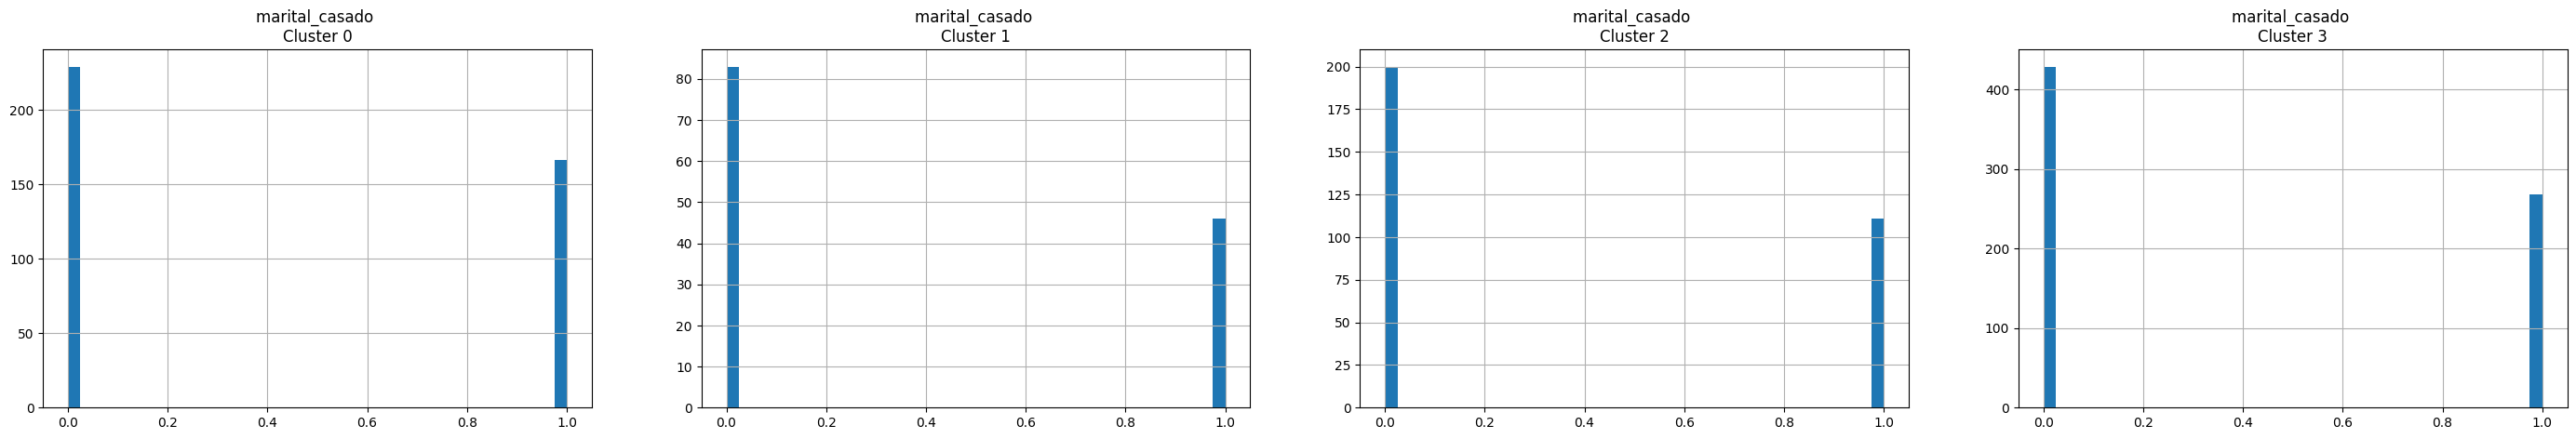

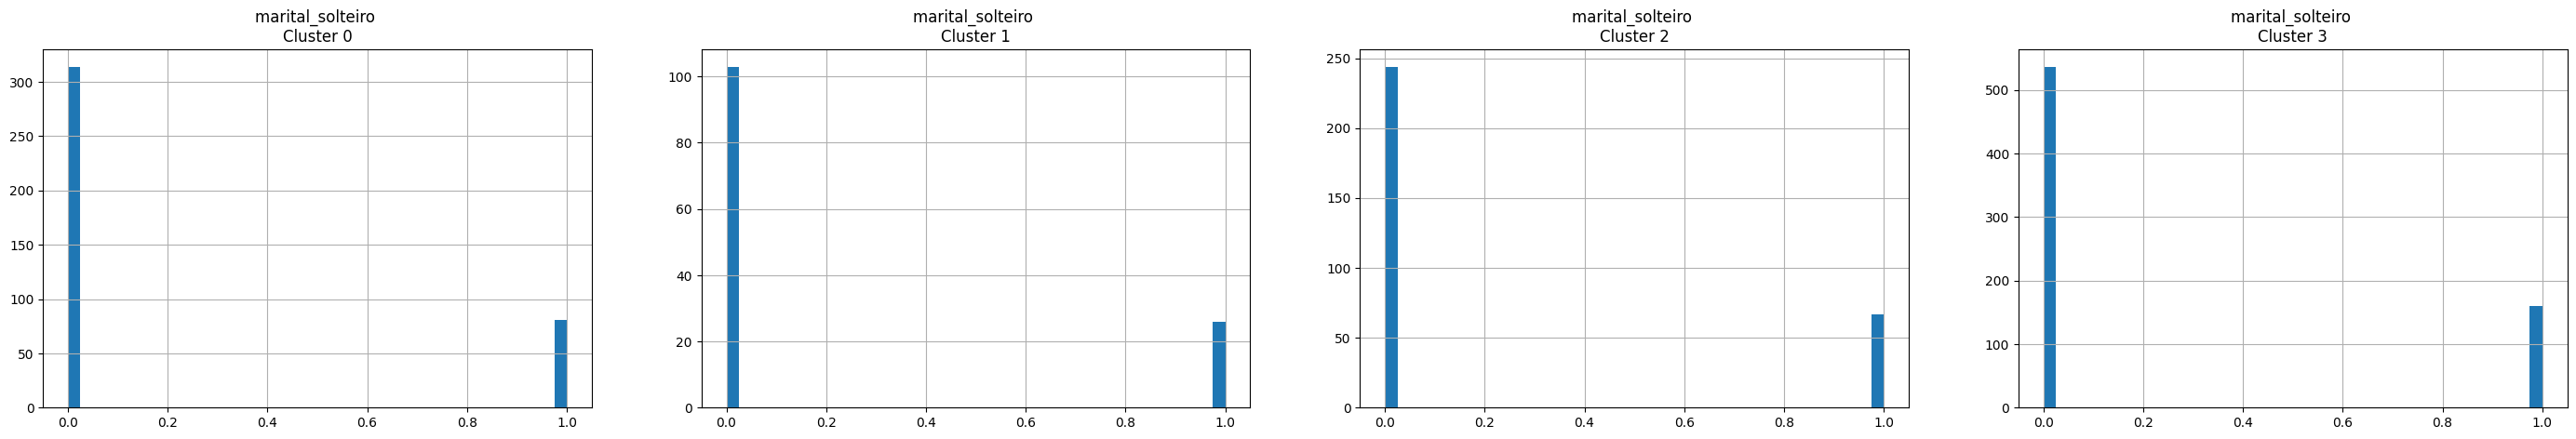

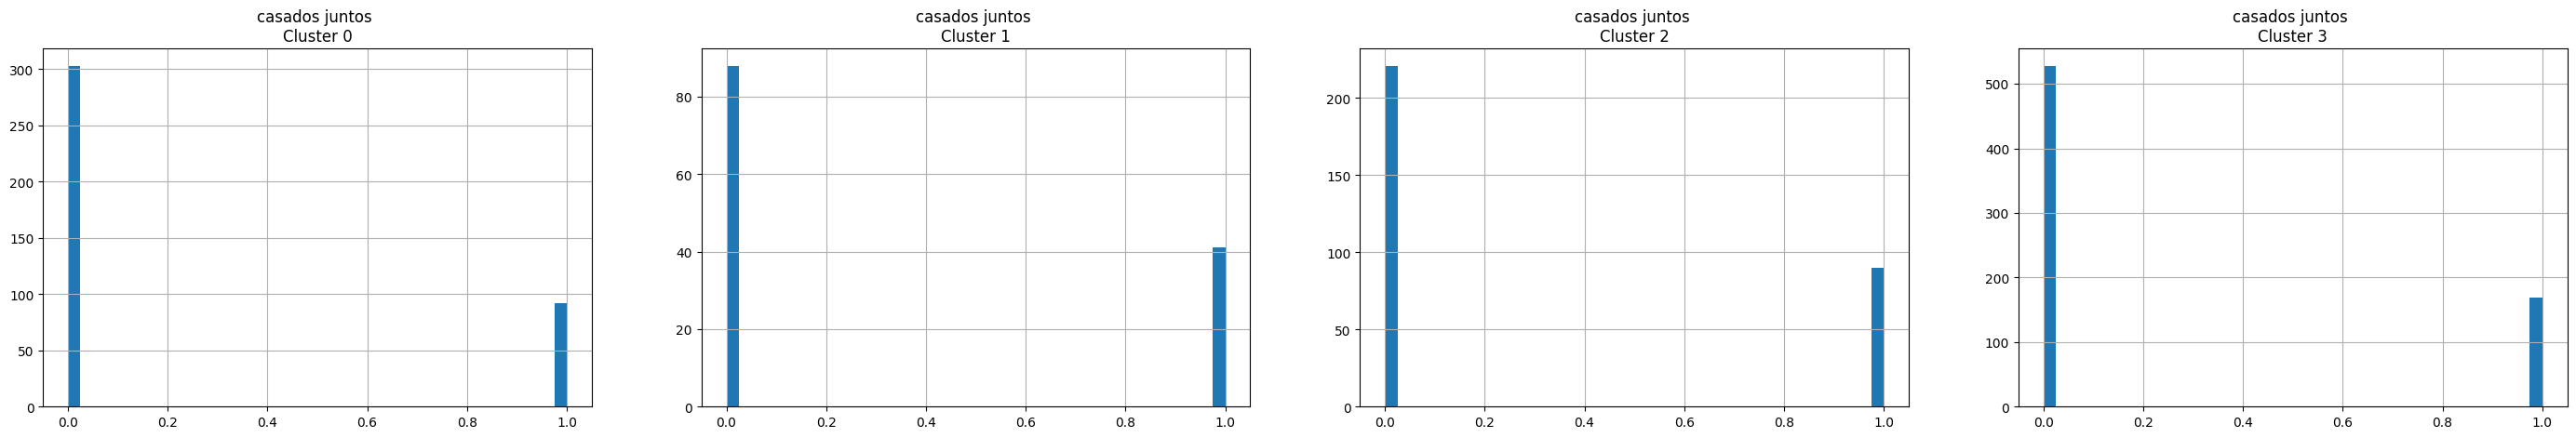

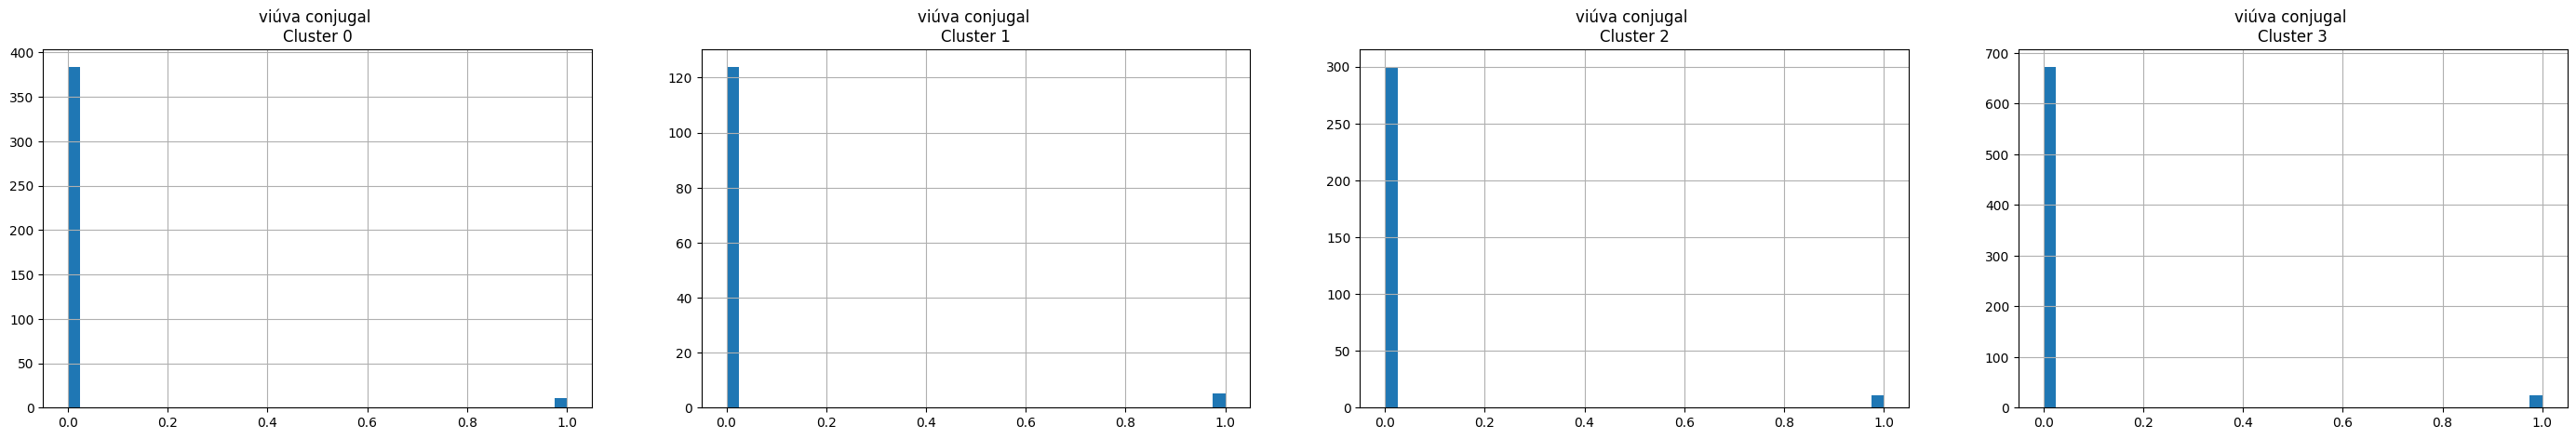

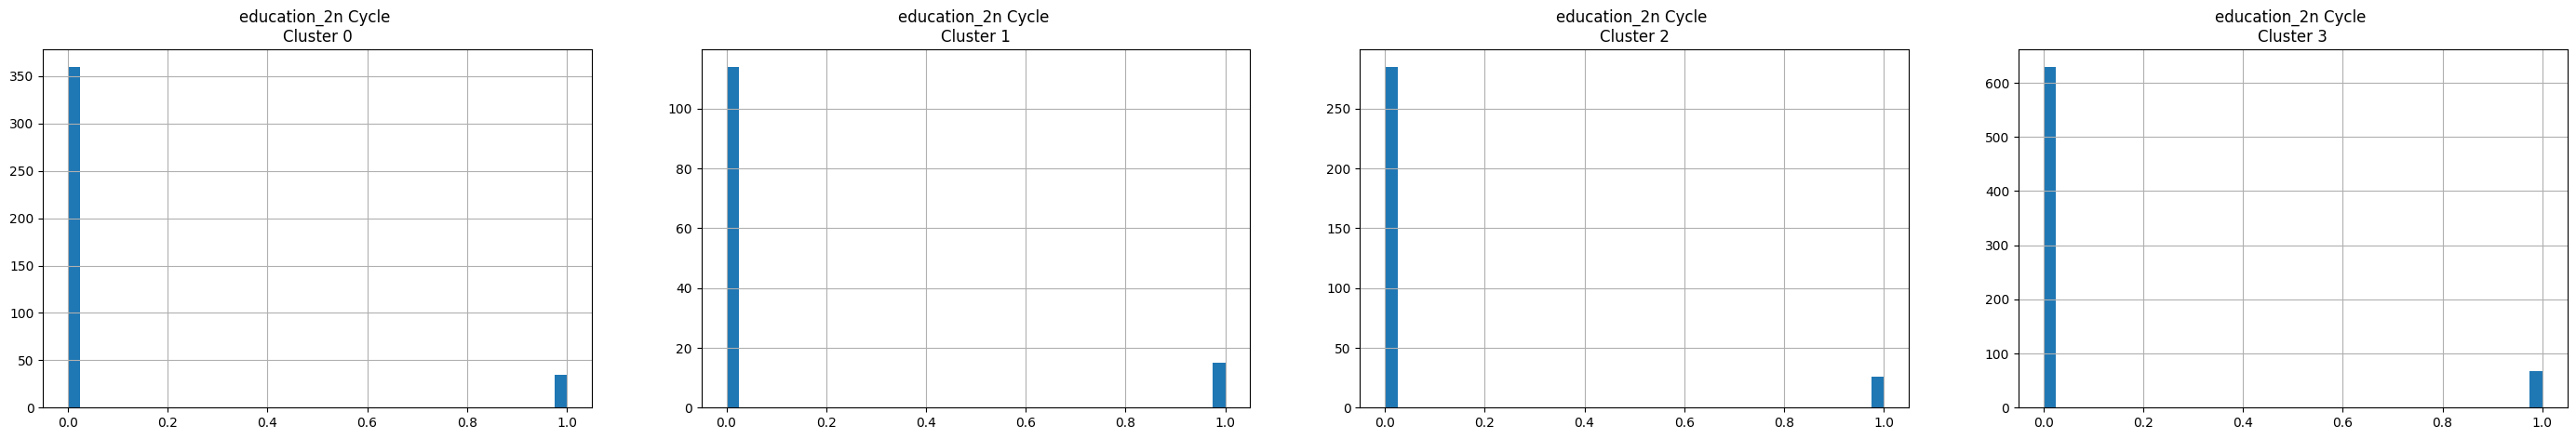

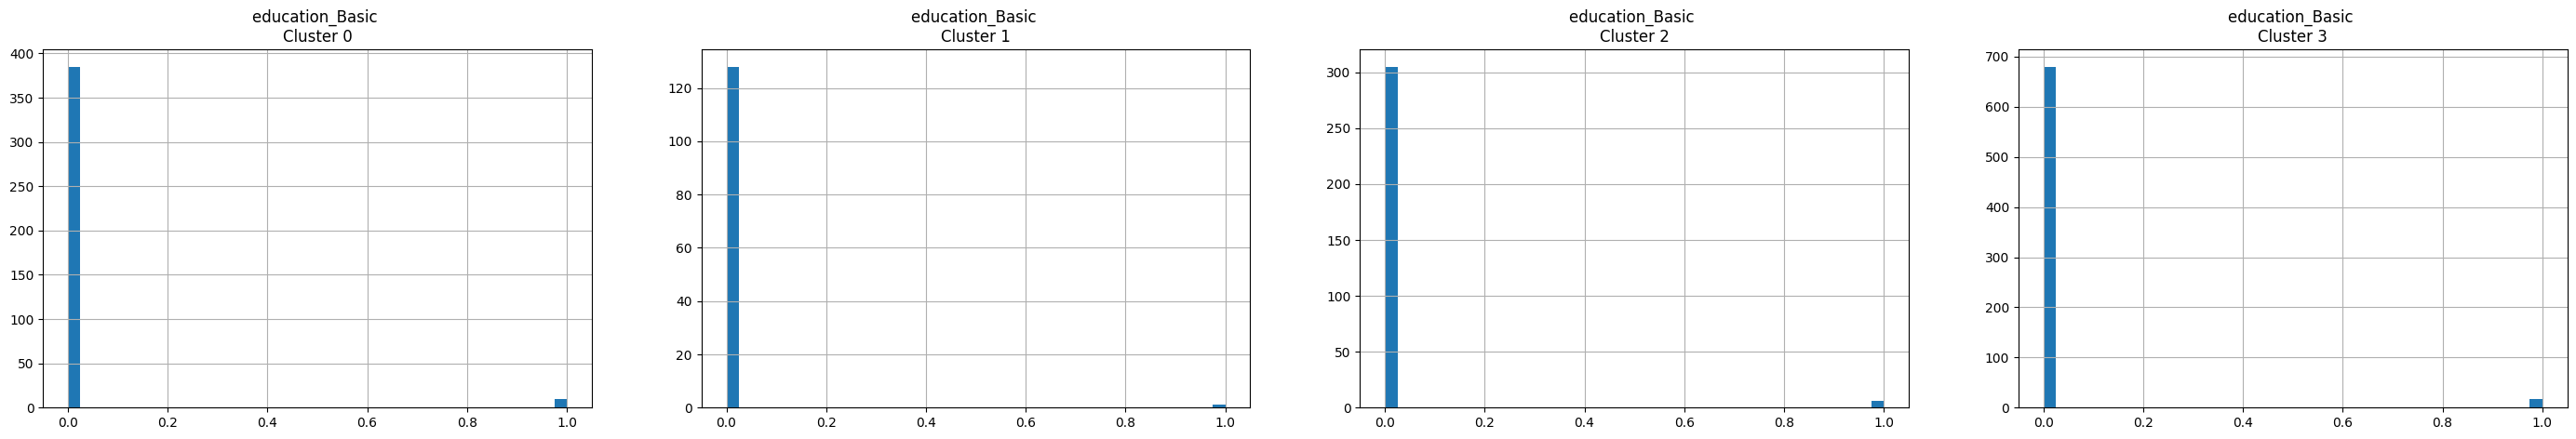

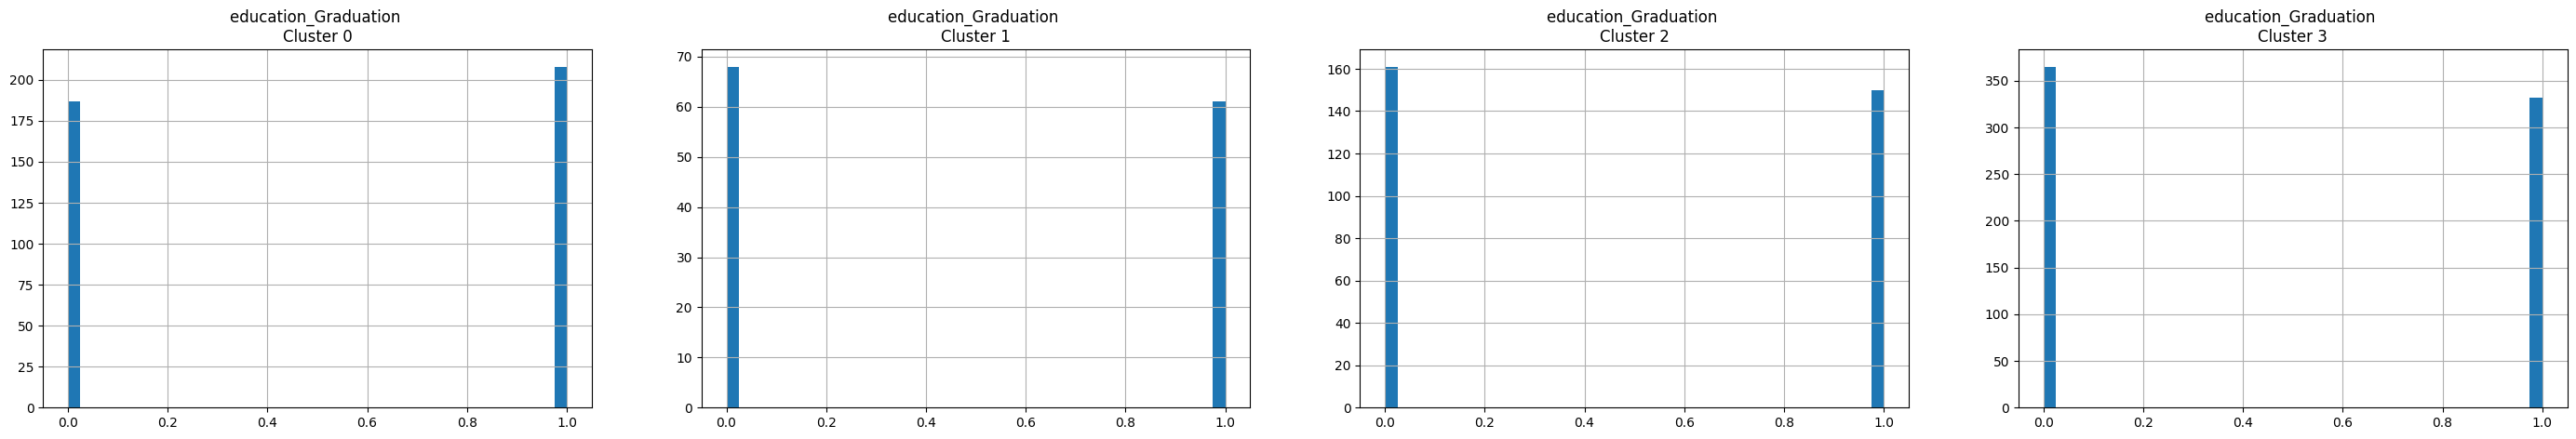

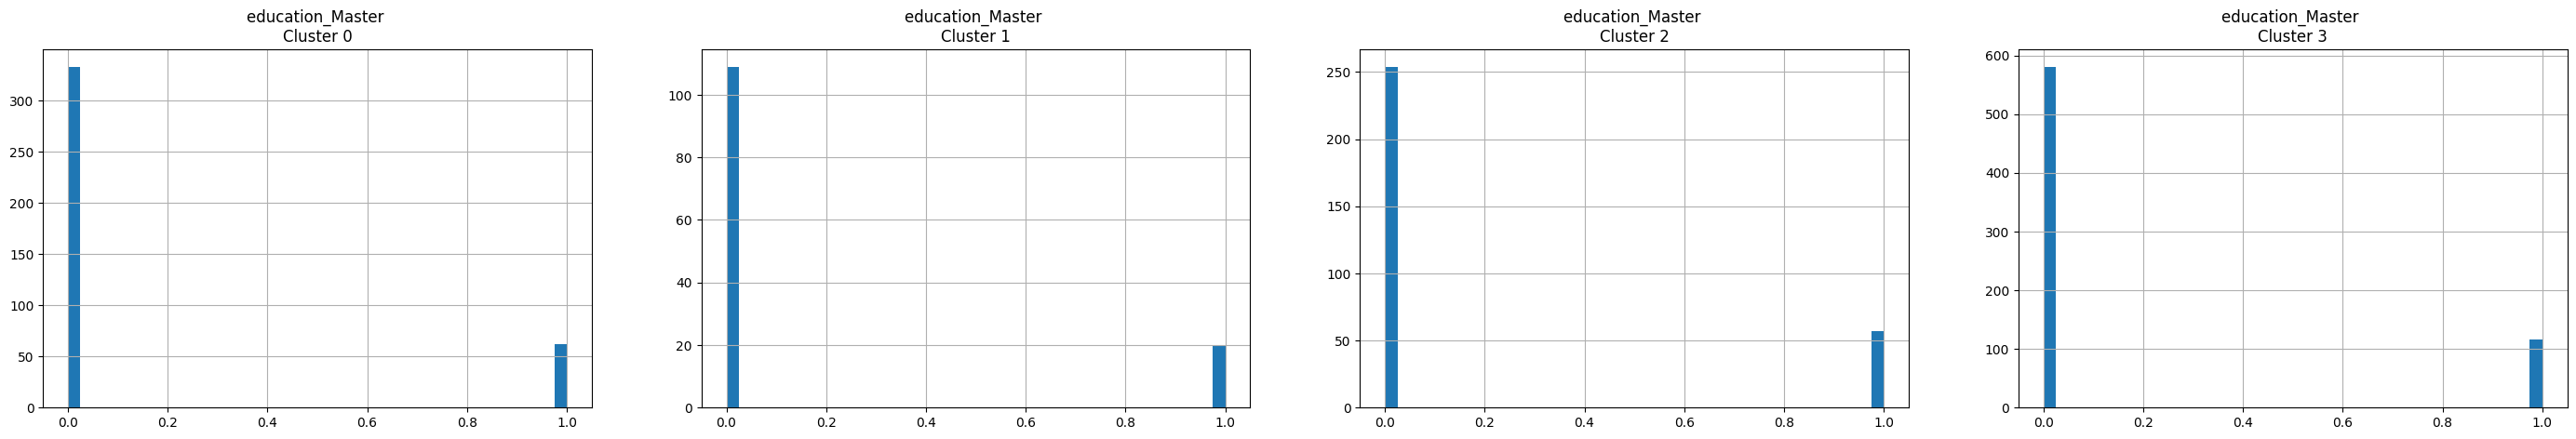

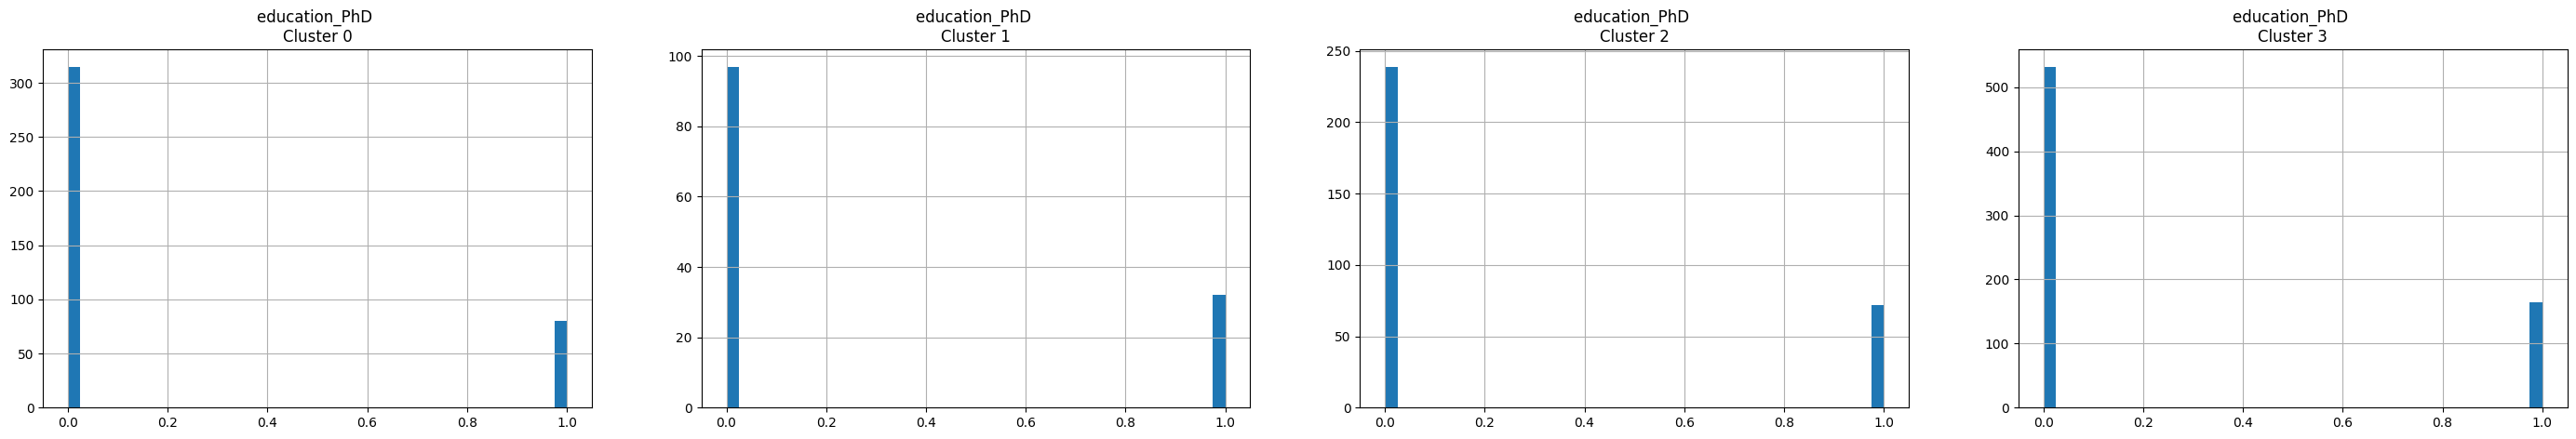

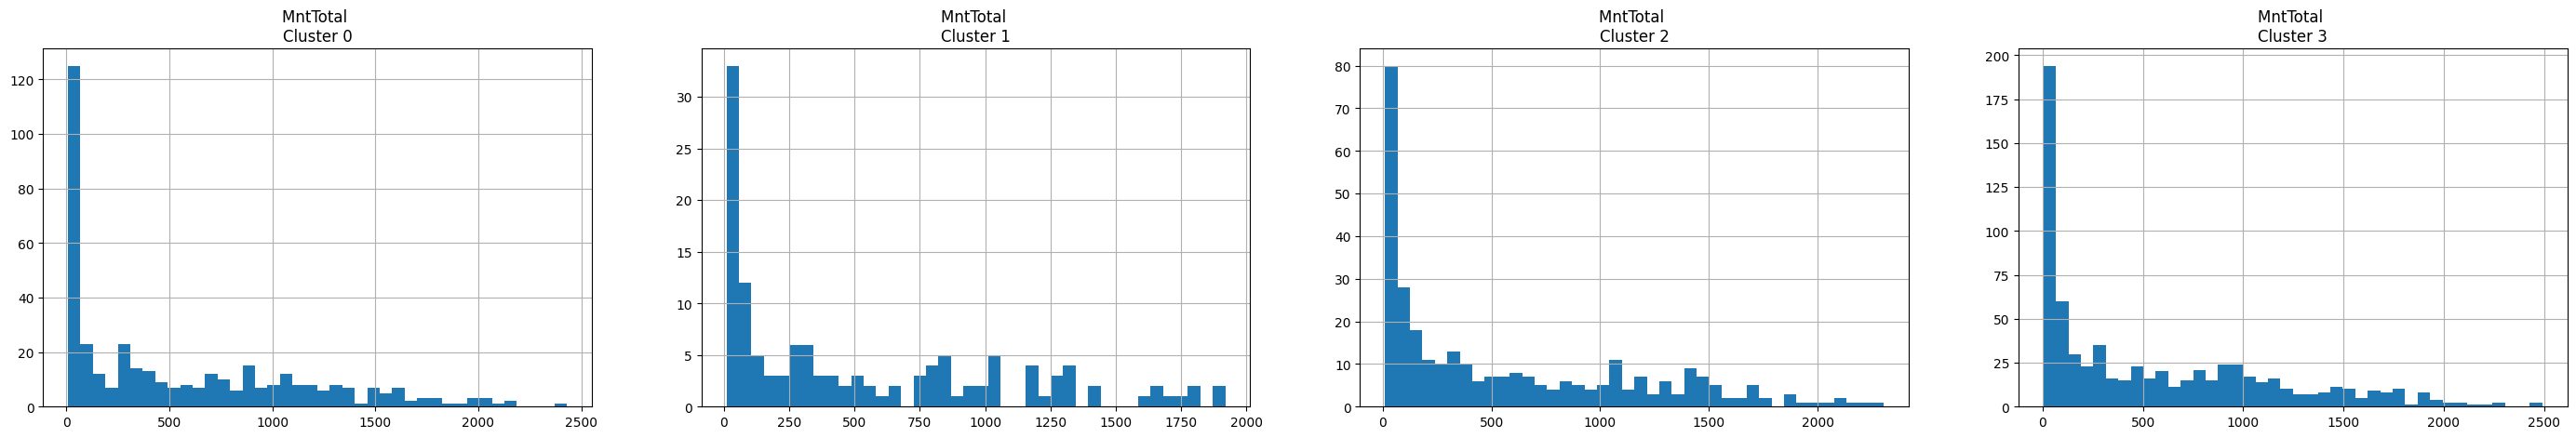

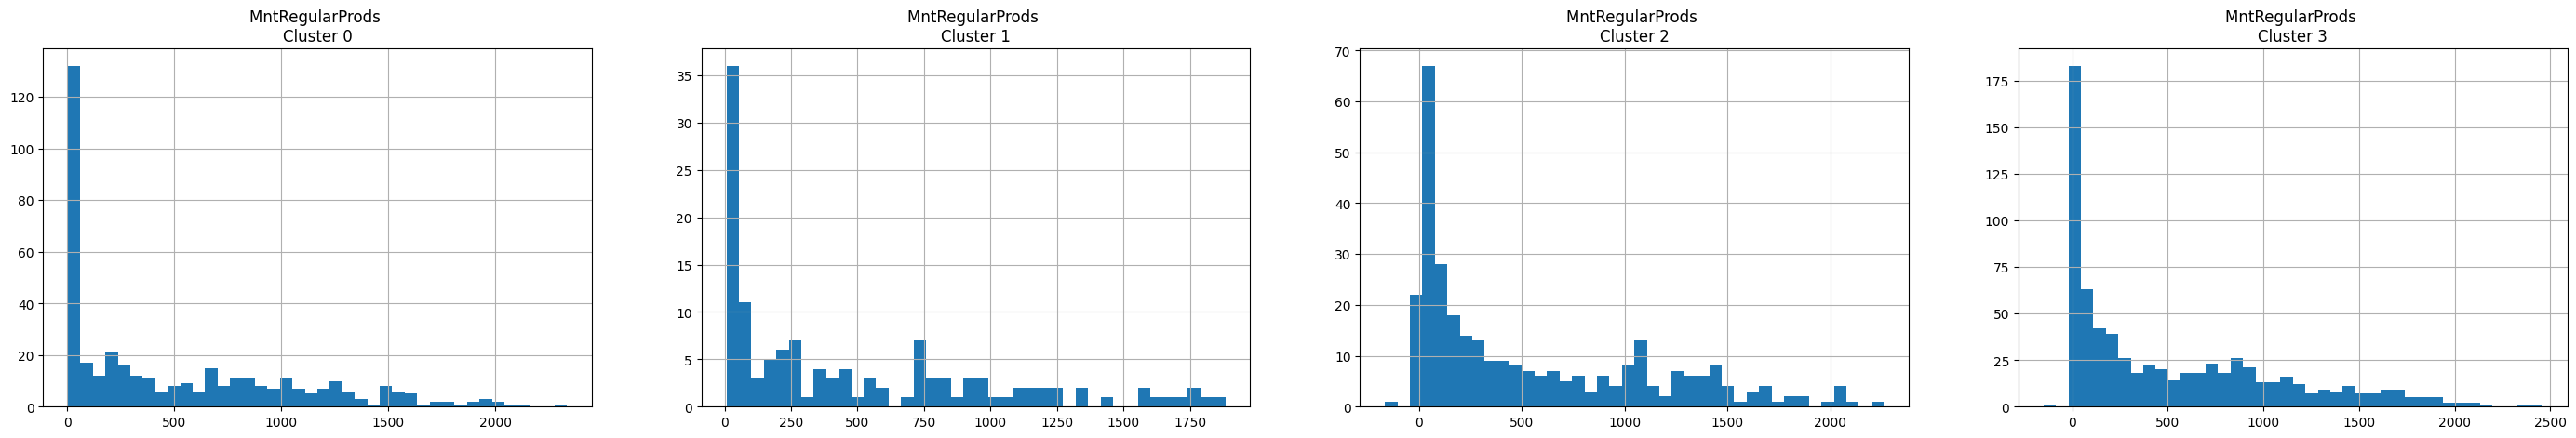

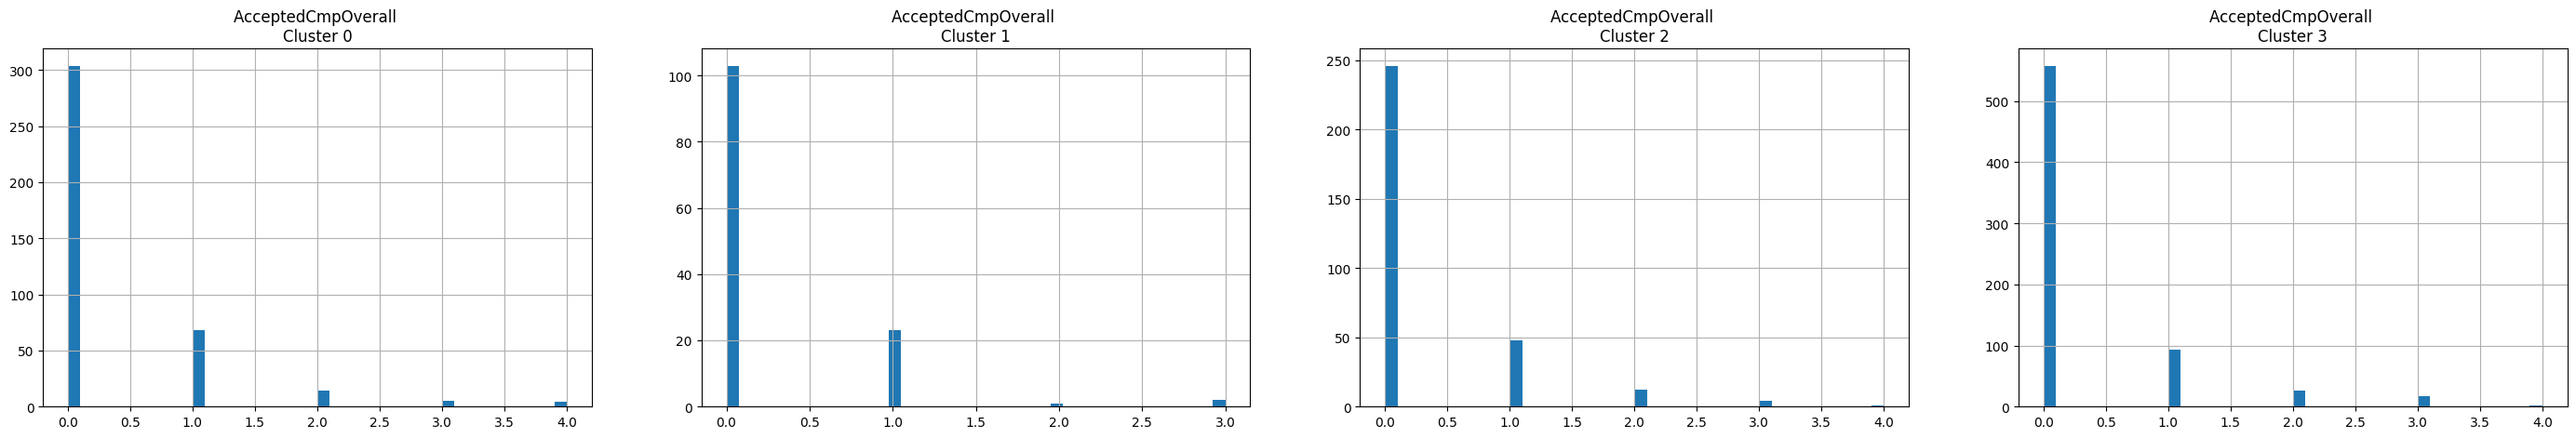

In [ ]:
for i in ifood_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(4):
    plt.subplot(1, 4, j + 1)
    cluster =  ifood_df_cluster[ifood_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 40)
    plt.title('{} \nCluster {}'.format(i, j))

In [ ]:
fcluster = ifood_df_cluster[ifood_df_cluster['cluster'] == 0]
fcluster.describe()

,Renda_anual,N_criancas,N_adolescentes,Recency,N_dias_ultima_compra,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,...,viúva conjugal,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,cluster
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.0
mean,51748.751899,0.463291,0.465823,51.065823,308.756962,26.192405,161.893671,36.093671,26.870886,40.589873,...,0.027848,0.088608,0.025316,0.526582,0.156962,0.202532,559.807595,519.217722,0.321519,0.0
std,20737.935802,0.552378,0.529075,28.242437,341.364375,39.771791,215.502468,54.489685,42.230345,46.381106,...,0.164746,0.284537,0.157284,0.499926,0.364226,0.402396,572.209453,550.511791,0.698379,0.0
min,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,0.000000,0.0
25%,35107.000000,0.000000,0.000000,27.500000,20.000000,1.000000,15.000000,2.000000,1.000000,9.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.500000,37.500000,0.000000,0.0
50%,54165.000000,0.000000,0.000000,52.000000,185.000000,7.000000,65.000000,10.000000,7.000000,22.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,348.000000,293.000000,0.000000,0.0
75%,67406.500000,1.000000,1.000000,76.500000,490.500000,33.000000,217.500000,51.500000,34.000000,54.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,961.500000,880.000000,0.000000,0.0
max,102692.000000,2.000000,2.000000,99.000000,1449.000000,197.000000,951.000000,258.000000,195.000000,216.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2429.000000,2333.000000,4.000000,0.0


In [ ]:
fcluster = ifood_df_cluster[ifood_df_cluster['cluster'] == 1]
fcluster.describe()

,Renda_anual,N_criancas,N_adolescentes,Recency,N_dias_ultima_compra,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,...,viúva conjugal,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,cluster
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,...,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.0
mean,51343.271318,0.480620,0.581395,49.860465,298.992248,21.527132,146.527132,34.193798,27.550388,46.767442,...,0.038760,0.116279,0.007752,0.472868,0.155039,0.248062,528.790698,482.023256,0.240310,1.0
std,17491.096725,0.546305,0.554776,29.753609,334.615066,35.079169,200.917858,49.959371,43.638064,56.144277,...,0.193774,0.321809,0.088045,0.501210,0.363353,0.433572,542.239910,518.531362,0.541629,0.0
min,16860.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,7.000000,0.000000,1.0
25%,38887.000000,0.000000,0.000000,21.000000,25.000000,1.000000,15.000000,2.000000,1.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,45.000000,0.000000,1.0
50%,49494.000000,0.000000,1.000000,54.000000,176.000000,7.000000,64.000000,11.000000,8.000000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,303.000000,259.000000,0.000000,1.0
75%,63998.000000,1.000000,1.000000,74.000000,494.000000,27.000000,194.000000,43.000000,33.000000,66.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,888.000000,774.000000,0.000000,1.0
max,85844.000000,2.000000,2.000000,98.000000,1396.000000,172.000000,929.000000,240.000000,189.000000,241.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1920.000000,1882.000000,3.000000,1.0


In [ ]:
fcluster = ifood_df_cluster[ifood_df_cluster['cluster'] == 2]
fcluster.describe()

,Renda_anual,N_criancas,N_adolescentes,Recency,N_dias_ultima_compra,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,...,viúva conjugal,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,cluster
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,...,311.00000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.0
mean,52383.327974,0.437299,0.553055,50.295820,315.279743,25.308682,169.347267,34.919614,28.440514,39.652733,...,0.03537,0.083601,0.019293,0.482315,0.183280,0.231511,573.295820,533.643087,0.282958,2.0
std,20049.505018,0.515962,0.581640,29.934379,349.021289,36.699317,217.589881,51.831457,42.068172,46.149843,...,0.18501,0.277235,0.137773,0.500492,0.387519,0.422478,586.984335,569.865585,0.630155,0.0
min,6835.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,-166.000000,0.000000,2.0
25%,37539.500000,0.000000,0.000000,23.500000,29.000000,2.000000,20.000000,3.000000,2.000000,9.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,63.500000,51.500000,0.000000,2.0
50%,51250.000000,0.000000,1.000000,51.000000,167.000000,9.000000,71.000000,13.000000,10.000000,26.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,337.000000,291.000000,0.000000,2.0
75%,67431.500000,1.000000,1.000000,76.500000,527.000000,32.500000,235.000000,42.500000,32.000000,48.000000,...,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1031.000000,986.000000,0.000000,2.0
max,94871.000000,2.000000,2.000000,99.000000,1332.000000,194.000000,940.000000,253.000000,198.000000,291.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000,2.0


In [ ]:
fcluster = ifood_df_cluster[ifood_df_cluster['cluster'] == 3]
fcluster.describe()

,Renda_anual,N_criancas,N_adolescentes,Recency,N_dias_ultima_compra,Gastos_Frutas,Gastos_carne,Gastos_peixe,Gastos_doce,Gastos_ouro,...,viúva conjugal,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,cluster
count,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.00000,697.000000,697.000000,...,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.0
mean,51259.969871,0.447633,0.506456,46.430416,300.969871,26.146341,171.017217,38.27977,27.365854,45.276901,...,0.034433,0.096126,0.024390,0.476327,0.166428,0.236729,563.779053,518.502152,0.295552,3.0
std,21181.012176,0.541839,0.552191,28.908667,325.829186,40.469392,231.248858,56.34258,41.813793,52.838177,...,0.182470,0.294976,0.154368,0.499798,0.372731,0.425380,575.169088,551.375115,0.683463,0.0
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-151.000000,0.000000,3.0
25%,35196.000000,0.000000,0.000000,20.000000,23.000000,1.000000,17.000000,3.00000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000,42.000000,0.000000,3.0
50%,50616.000000,0.000000,0.000000,47.000000,179.000000,8.000000,68.000000,12.00000,9.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,342.000000,298.000000,0.000000,3.0
75%,68397.000000,1.000000,1.000000,71.000000,507.000000,30.000000,230.000000,46.00000,35.000000,59.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,953.000000,869.000000,0.000000,3.0
max,105471.000000,2.000000,2.000000,99.000000,1493.000000,189.000000,1725.000000,259.00000,197.000000,262.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000,3.0


Conclusão:

- Grupo 0: 
- Grupo 1: Possuem o maior indece de gastos com Frutas
- Grupo 2: Possuem maior indece de filhos, faz mais compras quando se tem descoto
- Grupo 3: Possuem o indice de renda_anual comparado aos outros, assim como o maior indece de gastos com carne, peixe, doce


# 05 - Aplicação de PCA (principal component analysis) e visualização dos resultados

In [ ]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(ifood_df_scaled)
principal_comp

array([[ 4.35053582, -1.2621739 ],
       [-2.75164515, -0.09379983],
       [ 1.55137494, -1.54711762],
       ...,
       [ 2.24233586,  0.89138737],
       [ 1.66286877, -1.61667897],
       [-1.88525075,  0.66916308]])

In [ ]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,4.350536,-1.262174
1,-2.751645,-0.093800
2,1.551375,-1.547118
3,-2.943253,0.301612
4,-0.687095,-0.420560


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,4.350536,-1.262174,2
1,-2.751645,-0.093800,3
2,1.551375,-1.547118,2
3,-2.943253,0.301612,3
4,-0.687095,-0.420560,0


In [ ]:
pca_df.shape

(1843, 3)

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

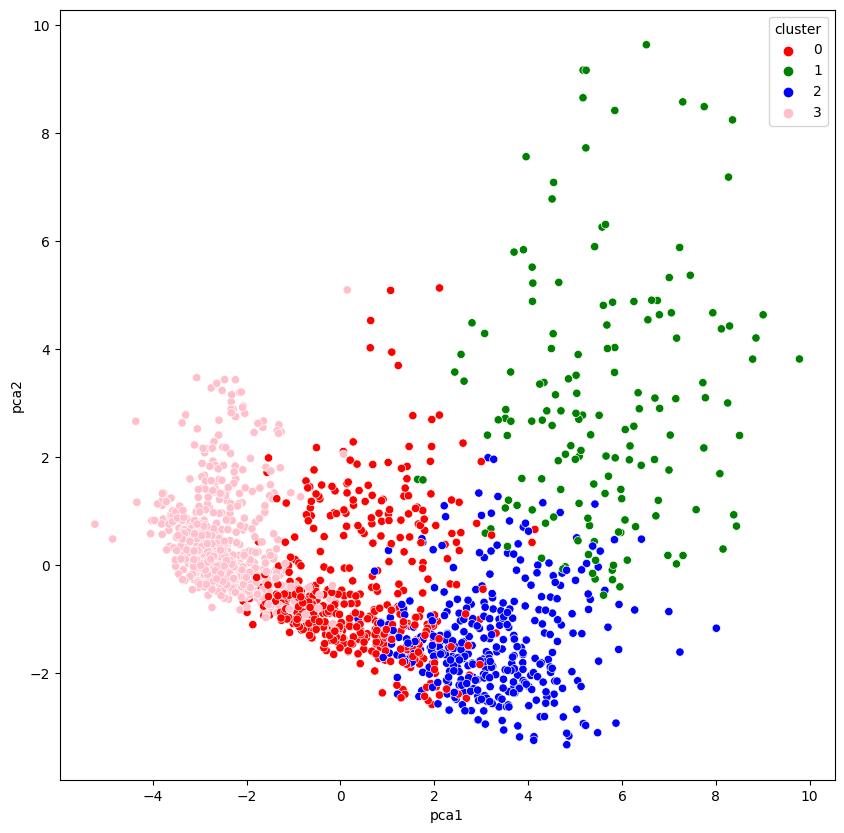

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [ ]:
ifood_df_cluster.to_csv('ifood_cluster.csv')